# Separate runs by HKLE due to size limits

# Positions rounded to 10,000

In [1]:
data="TCGA/focused.10000.T.csv.gz"

In [2]:
hkle='SVA_F'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [3]:
threshold=3   # 1

In [4]:
import numpy as np
np.__version__

'1.20.3'

In [5]:
import pandas as pd
pd.__version__

'1.2.4'

In [6]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import scipy
scipy.__version__

'1.6.3'

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
sns.__version__

'0.11.1'

In [12]:
from datetime import datetime

In [13]:
import sklearn
sklearn.__version__

'0.24.2'

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
default_max_columns=pd.get_option('display.max_columns')

In [16]:
default_max_rows=pd.get_option('display.max_rows')

In [17]:
default_precision=pd.get_option('display.precision')

In [18]:
pd.set_option('display.precision', 2)

In [19]:
#default_threshold=np.get_printoptions()['threshold']

In [20]:
#np.set_printoptions(threshold=10000000)

# Read Metadata 1

In [21]:
mt1=pd.read_csv("TCGA/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [22]:
mt1.shape

(127, 5)

In [23]:
mt1.rename(columns={"submitter": "subject"},inplace=True)
mt1.rename(columns={"gender": "gender1"},inplace=True)

In [24]:
mt1.head()

subject  days_to_death gender1             disease_type  \
0  02-2483            NaN    male  Glioblastoma Multiforme   
1  02-2485            NaN    male  Glioblastoma Multiforme   
2  06-0125         1448.0  female  Glioblastoma Multiforme   
3  06-0152          375.0    male  Glioblastoma Multiforme   
4  06-0157           97.0  female  Glioblastoma Multiforme   

                          center_name  
0  Broad Institute of MIT and Harvard  
1  Broad Institute of MIT and Harvard  
2  Broad Institute of MIT and Harvard  
3  Broad Institute of MIT and Harvard  
4  Broad Institute of MIT and Harvard

In [25]:
list(mt1)

['subject', 'days_to_death', 'gender1', 'disease_type', 'center_name']

# Read Metadata 2

In [26]:
mt2=pd.read_csv("TCGA/TCGA.Glioma.metadata.tsv",sep="\t")

In [27]:
mt2.shape

(1114, 18)

In [28]:
mt2.head()

case_submitter_id project_id primary_diagnosis   race  \
0      TCGA-02-0001   TCGA-GBM      Glioblastoma  white   
1      TCGA-02-0003   TCGA-GBM      Glioblastoma  white   
2      TCGA-02-0004   TCGA-GBM      Glioblastoma  white   
3      TCGA-02-0006   TCGA-GBM      Glioblastoma  white   
4      TCGA-02-0007   TCGA-GBM      Glioblastoma  white   

                ethnicity  gender RE_names IDH     x1p19q TERT  \
0  not hispanic or latino  female      NaN  WT  non-codel  NaN   
1  not hispanic or latino    male      NaN  WT  non-codel  NaN   
2  not hispanic or latino    male      NaN  WT        NaN  NaN   
3  not hispanic or latino  female      NaN  WT  non-codel  NaN   
4  not hispanic or latino  female      NaN  WT  non-codel  NaN   

         IDH_1p19q_status                           WHO_groups  \
0  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
1  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
2         IDH-WT:1p19q-NA                                  NaN   
3  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
4  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   

                     Triple_group     Tissue_sample_location          MGMT  \
0  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
1  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
2         IDH-WT:1p19q-NA:TERT-NA  MD Anderson Cancer Center           NaN   
3  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
4  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   

    Age  Survival_months  Vital_status  
0  44.0            11.76           1.0  
1  50.0             4.73           1.0  
2  59.0            11.33           1.0  
3  56.0            18.33           1.0  
4  40.0            23.16           1.0

In [29]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [30]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [31]:
mt2[['subject','case_submitter_id']].head()

subject case_submitter_id
0  02-0001      TCGA-02-0001
1  02-0003      TCGA-02-0003
2  02-0004      TCGA-02-0004
3  02-0006      TCGA-02-0006
4  02-0007      TCGA-02-0007

In [32]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [33]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

# Merge Metadata

In [34]:
#meta=mt2.merge(mt1,left_on='subject2',right_on='subject1',suffixes=["_mt2","_mt1"],how='inner')
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')

In [35]:
del mt1
del mt2

In [36]:
meta.head()

project_id primary_diagnosis                       race  \
0   TCGA-GBM      Glioblastoma                      asian   
1   TCGA-GBM      Glioblastoma  black or african american   
2   TCGA-GBM      Glioblastoma                      white   
3   TCGA-GBM      Glioblastoma                      white   
4   TCGA-GBM      Glioblastoma                      white   

                ethnicity gender2                   RE_names     IDH  \
0  not hispanic or latino    male  02-2483-01A-01R-1849-01+1  Mutant   
1  not hispanic or latino    male  02-2485-01A-01R-1849-01+1      WT   
2  not hispanic or latino  female  06-0125-01A-01R-1849-01+1      WT   
3  not hispanic or latino    male                        NaN      WT   
4  not hispanic or latino  female  06-0157-01A-01R-1849-01+1      WT   

      x1p19q    TERT            IDH_1p19q_status  ...  \
0  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...   
1  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   
2  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   
3  non-codel     NaN      IDH-WT:1p19q-non-codel  ...   
4  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   

      Tissue_sample_location          MGMT   Age Survival_months  \
0  MD Anderson Cancer Center    Methylated  43.0           15.31   
1  MD Anderson Cancer Center  Unmethylated  53.0           15.44   
2        Henry Ford Hospital    Methylated  63.0           47.57   
3        Henry Ford Hospital           NaN  68.0           12.32   
4        Henry Ford Hospital           NaN  63.0            3.19   

   Vital_status  subject  days_to_death gender1             disease_type  \
0           0.0  02-2483            NaN    male  Glioblastoma Multiforme   
1           0.0  02-2485            NaN    male  Glioblastoma Multiforme   
2           1.0  06-0125         1448.0  female  Glioblastoma Multiforme   
3           1.0  06-0152          375.0    male  Glioblastoma Multiforme   
4           1.0  06-0157           97.0  female  Glioblastoma Multiforme   

                          center_name  
0  Broad Institute of MIT and Harvard  
1  Broad Institute of MIT and Harvard  
2  Broad Institute of MIT and Harvard  
3  Broad Institute of MIT and Harvard  
4  Broad Institute of MIT and Harvard  

[5 rows x 22 columns]

In [37]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [38]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [39]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],
      dtype='object')

In [40]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     35
Oligodendroglioma, NOS           33
Astrocytoma, anaplastic          24
Mixed glioma                     16
Astrocytoma, NOS                  9
Oligodendroglioma, anaplastic     8
Name: primary_diagnosis, dtype: int64

In [41]:
meta['TERT'].value_counts()

Mutant    68
WT        54
Name: TERT, dtype: int64

In [42]:
meta['IDH'].value_counts()

Mutant    74
WT        50
Name: IDH, dtype: int64

In [43]:
meta['x1p19q'].value_counts()

non-codel    102
codel         23
Name: x1p19q, dtype: int64

In [44]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    90
Glioblastoma Multiforme     35
Name: disease_type, dtype: int64

In [45]:
meta['gender1'].value_counts()

male      72
female    53
Name: gender1, dtype: int64

In [46]:
meta['race'].value_counts()

white                        114
black or african american      7
not reported                   3
asian                          1
Name: race, dtype: int64

In [47]:
meta['ethnicity'].value_counts()

not hispanic or latino    108
not reported               11
hispanic or latino          6
Name: ethnicity, dtype: int64

In [48]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    51
IDH-WT:1p19q-non-codel        50
IDH-Mutant:1p19q-codel        23
IDH-NA:1p19q-non-codel         1
Name: IDH_1p19q_status, dtype: int64

In [49]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             29
oligodendroglioma:IDH-Mutant:1p19q-codel        23
astrocytoma:IDH-Mutant:1p19q-non-codel          18
astrocytoma:IDH-WT:1p19q-non-codel              13
oligodendroglioma:IDH-Mutant:1p19q-non-codel    13
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     11
glioblastoma:IDH-Mutant:1p19q-non-codel          5
oligoastrocytoma:IDH-WT:1p19q-non-codel          4
oligodendroglioma:IDH-WT:1p19q-non-codel         4
Name: WHO_groups, dtype: int64

In [50]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        49
IDH-WT:1p19q-non-codel:TERT-Mutant        44
IDH-Mutant:1p19q-codel:TERT-Mutant        22
IDH-WT:1p19q-non-codel:TERT-WT             4
IDH-WT:1p19q-non-codel:TERT-NA             2
IDH-NA:1p19q-non-codel:TERT-Mutant         1
IDH-Mutant:1p19q-non-codel:TERT-Mutant     1
IDH-Mutant:1p19q-codel:TERT-WT             1
IDH-Mutant:1p19q-non-codel:TERT-NA         1
Name: Triple_group, dtype: int64

In [51]:
meta['MGMT'].value_counts()

Methylated      87
Unmethylated    27
Name: MGMT, dtype: int64

In [52]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    75
Harvard Medical School                50
Name: center_name, dtype: int64

## We need a multi-level index to merge with df later so adding an empty index level

In [53]:
meta.columns=[meta.columns,[''] * len(meta.columns)]

In [54]:
#meta.columns.names=['chromosome','position']

In [55]:
meta.columns

MultiIndex([(            'project_id', ''),
            (     'primary_diagnosis', ''),
            (                  'race', ''),
            (             'ethnicity', ''),
            (               'gender2', ''),
            (              'RE_names', ''),
            (                   'IDH', ''),
            (                'x1p19q', ''),
            (                  'TERT', ''),
            (      'IDH_1p19q_status', ''),
            (            'WHO_groups', ''),
            (          'Triple_group', ''),
            ('Tissue_sample_location', ''),
            (                  'MGMT', ''),
            (                   'Age', ''),
            (       'Survival_months', ''),
            (          'Vital_status', ''),
            (               'subject', ''),
            (         'days_to_death', ''),
            (               'gender1', ''),
            (          'disease_type', ''),
            (           'center_name', '')],
           )

# Read raw data and cleanup

In [56]:
#df=pd.read_csv("focused.csv.gz",header=[0,1,2,3],index_col=[0,1])
#df.columns.names=['sample','pup','hkle','q']
#df=df.T
df=pd.read_csv(data,header=[0,1],index_col=[0,1,2,3])

df.reset_index(inplace=True)
df.head()


chromosome       sample     pup      hkle mapq    chr1                  \
position                                       1040000 1190000 1300000   
0           02-2483-01A  paired  HERVK113  Q20       0       0       0   
1           02-2483-01A  paired     SVA_A  Q20       0       0       0   
2           02-2483-01A  paired     SVA_B  Q20       0       0       0   
3           02-2483-01A  paired     SVA_C  Q20       0       0       0   
4           02-2483-01A  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1400000 1410000 1580000  ... 17180000 18940000 19530000 19690000   
0                4       1       4  ...        0        0        0        2   
1                0       0       0  ...        0        0        0        0   
2                0       0       0  ...        0        0        0        0   
3                0       0       0  ...        0        0        0        0   
4                0       0       0  ...        0        0        0        0   

chromosome                                                        
position   19700000 20550000 20970000 21040000 21210000 21630000  
0                 0        0        0        0        0        0  
1                 0        0        0        0        0        0  
2                 0        0        0        0        0        0  
3                 0        0        0        0        0        0  
4                 0        0        0        0        0        0  

[5 rows x 14541 columns]

In [57]:
df['subject']=df['sample'].str[0:7]
df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1913    TQ-A8XE
1914    TQ-A8XE
1915    TQ-A8XE
1916    TQ-A8XE
1917    TQ-A8XE
Name: subject, Length: 1918, dtype: object

In [58]:
df.columns

MultiIndex([( 'sample',         ''),
            (    'pup',         ''),
            (   'hkle',         ''),
            (   'mapq',         ''),
            (   'chr1',  '1040000'),
            (   'chr1',  '1190000'),
            (   'chr1',  '1300000'),
            (   'chr1',  '1400000'),
            (   'chr1',  '1410000'),
            (   'chr1',  '1580000'),
            ...
            (   'chrY', '18940000'),
            (   'chrY', '19530000'),
            (   'chrY', '19690000'),
            (   'chrY', '19700000'),
            (   'chrY', '20550000'),
            (   'chrY', '20970000'),
            (   'chrY', '21040000'),
            (   'chrY', '21210000'),
            (   'chrY', '21630000'),
            ('subject',         '')],
           names=['chromosome', 'position'], length=14542)

In [59]:
df.head()

chromosome       sample     pup      hkle mapq    chr1                  \
position                                       1040000 1190000 1300000   
0           02-2483-01A  paired  HERVK113  Q20       0       0       0   
1           02-2483-01A  paired     SVA_A  Q20       0       0       0   
2           02-2483-01A  paired     SVA_B  Q20       0       0       0   
3           02-2483-01A  paired     SVA_C  Q20       0       0       0   
4           02-2483-01A  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1400000 1410000 1580000  ... 18940000 19530000 19690000 19700000   
0                4       1       4  ...        0        0        2        0   
1                0       0       0  ...        0        0        0        0   
2                0       0       0  ...        0        0        0        0   
3                0       0       0  ...        0        0        0        0   
4                0       0       0  ...        0        0        0        0   

chromosome                                               subject  
position   20550000 20970000 21040000 21210000 21630000           
0                 0        0        0        0        0  02-2483  
1                 0        0        0        0        0  02-2483  
2                 0        0        0        0        0  02-2483  
3                 0        0        0        0        0  02-2483  
4                 0        0        0        0        0  02-2483  

[5 rows x 14542 columns]

In [60]:
df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)

In [61]:
df.head()

chromosome                                  chr1                          \
position                                 1040000 1190000 1300000 1400000   
subject sample      pup    hkle     mapq                                   
02-2483 02-2483-01A paired HERVK113 Q20        0       0       0       4   
                           SVA_A    Q20        0       0       0       0   
                           SVA_B    Q20        0       0       0       0   
                           SVA_C    Q20        0       0       0       0   
                           SVA_D    Q20        0       0       0       0   

chromosome                                                                \
position                                 1410000 1580000 2210000 2510000   
subject sample      pup    hkle     mapq                                   
02-2483 02-2483-01A paired HERVK113 Q20        1       4       0       0   
                           SVA_A    Q20        0       0       0       0   
                           SVA_B    Q20        0       0       0       0   
                           SVA_C    Q20        0       0       0       0   
                           SVA_D    Q20        0       0       0       0   

chromosome                                                ...     chrY  \
position                                 2580000 3120000  ... 17180000   
subject sample      pup    hkle     mapq                  ...            
02-2483 02-2483-01A paired HERVK113 Q20        0       0  ...        0   
                           SVA_A    Q20        0       0  ...        0   
                           SVA_B    Q20        0       0  ...        0   
                           SVA_C    Q20        0       0  ...        0   
                           SVA_D    Q20        0       0  ...        0   

chromosome                                                                    \
position                                 18940000 19530000 19690000 19700000   
subject sample      pup    hkle     mapq                                       
02-2483 02-2483-01A paired HERVK113 Q20         0        0        2        0   
                           SVA_A    Q20         0        0        0        0   
                           SVA_B    Q20         0        0        0        0   
                           SVA_C    Q20         0        0        0        0   
                           SVA_D    Q20         0        0        0        0   

chromosome                                                                    \
position                                 20550000 20970000 21040000 21210000   
subject sample      pup    hkle     mapq                                       
02-2483 02-2483-01A paired HERVK113 Q20         0        0        0        0   
                           SVA_A    Q20         0        0        0        0   
                           SVA_B    Q20         0        0        0        0   
                           SVA_C    Q20         0        0        0        0   
                           SVA_D    Q20         0        0        0        0   

chromosome                                         
position                                 21630000  
subject sample      pup    hkle     mapq           
02-2483 02-2483-01A paired HERVK113 Q20         0  
                           SVA_A    Q20         0  
                           SVA_B    Q20         0  
                           SVA_C    Q20         0  
                           SVA_D    Q20         0  

[5 rows x 14537 columns]

In [62]:
df.shape

(1918, 14537)

## Remove "pup" and "q" as they are useless in this dataset.

In [63]:
df=df.droplevel('pup',axis='index').droplevel('mapq',axis='index')

In [64]:
df.head()

chromosome                      chr1                                          \
position                     1040000 1190000 1300000 1400000 1410000 1580000   
subject sample      hkle                                                       
02-2483 02-2483-01A HERVK113       0       0       0       4       1       4   
                    SVA_A          0       0       0       0       0       0   
                    SVA_B          0       0       0       0       0       0   
                    SVA_C          0       0       0       0       0       0   
                    SVA_D          0       0       0       0       0       0   

chromosome                                                    ...     chrY  \
position                     2210000 2510000 2580000 3120000  ... 17180000   
subject sample      hkle                                      ...            
02-2483 02-2483-01A HERVK113       0       0       0       0  ...        0   
                    SVA_A          0       0       0       0  ...        0   
                    SVA_B          0       0       0       0  ...        0   
                    SVA_C          0       0       0       0  ...        0   
                    SVA_D          0       0       0       0  ...        0   

chromosome                                                                 \
position                     18940000 19530000 19690000 19700000 20550000   
subject sample      hkle                                                    
02-2483 02-2483-01A HERVK113        0        0        2        0        0   
                    SVA_A           0        0        0        0        0   
                    SVA_B           0        0        0        0        0   
                    SVA_C           0        0        0        0        0   
                    SVA_D           0        0        0        0        0   

chromosome                                                        
position                     20970000 21040000 21210000 21630000  
subject sample      hkle                                          
02-2483 02-2483-01A HERVK113        0        0        0        0  
                    SVA_A           0        0        0        0  
                    SVA_B           0        0        0        0  
                    SVA_C           0        0        0        0  
                    SVA_D           0        0        0        0  

[5 rows x 14537 columns]

In [65]:
df.shape

(1918, 14537)

## Drop recurrent tumor (-02?)

In [66]:
df.loc[df.index.get_level_values('sample').str.contains("-02.$")].index

MultiIndex([('06-0125', '06-0125-02A', 'HERVK113'),
            ('06-0125', '06-0125-02A',    'SVA_A'),
            ('06-0125', '06-0125-02A',    'SVA_B'),
            ('06-0125', '06-0125-02A',    'SVA_C'),
            ('06-0125', '06-0125-02A',    'SVA_D'),
            ('06-0125', '06-0125-02A',    'SVA_E'),
            ('06-0125', '06-0125-02A',    'SVA_F'),
            ('06-0152', '06-0152-02A', 'HERVK113'),
            ('06-0152', '06-0152-02A',    'SVA_A'),
            ('06-0152', '06-0152-02A',    'SVA_B'),
            ...
            ('TQ-A7RV', 'TQ-A7RV-02A',    'SVA_D'),
            ('TQ-A7RV', 'TQ-A7RV-02A',    'SVA_E'),
            ('TQ-A7RV', 'TQ-A7RV-02A',    'SVA_F'),
            ('TQ-A8XE', 'TQ-A8XE-02A', 'HERVK113'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_A'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_B'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_C'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_D'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_E

In [67]:
df.drop(df.loc[df.index.get_level_values('sample').str.contains("-02.$")].index,axis='index',inplace=True)

In [68]:
df.loc[df.index.get_level_values('sample').str.contains("-02.$")].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

## Drop solid normal (-11?) (I've seen a couple)

In [69]:
df.loc[df.index.get_level_values('sample').str.contains("-11.$")].index

MultiIndex([('FG-5963', 'FG-5963-11A', 'HERVK113'),
            ('FG-5963', 'FG-5963-11A',    'SVA_A'),
            ('FG-5963', 'FG-5963-11A',    'SVA_B'),
            ('FG-5963', 'FG-5963-11A',    'SVA_C'),
            ('FG-5963', 'FG-5963-11A',    'SVA_D'),
            ('FG-5963', 'FG-5963-11A',    'SVA_E'),
            ('FG-5963', 'FG-5963-11A',    'SVA_F')],
           names=['subject', 'sample', 'hkle'])

In [70]:
df.drop(df.loc[df.index.get_level_values('sample').str.contains("-11.$")].index,axis='index',inplace=True)

In [71]:
df.loc[df.index.get_level_values('sample').str.contains("-11.$")].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [72]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([('FG-5963', 'FG-5963-01A', 'HERVK113'),
            ('FG-5963', 'FG-5963-01A',    'SVA_A'),
            ('FG-5963', 'FG-5963-01A',    'SVA_B'),
            ('FG-5963', 'FG-5963-01A',    'SVA_C'),
            ('FG-5963', 'FG-5963-01A',    'SVA_D'),
            ('FG-5963', 'FG-5963-01A',    'SVA_E'),
            ('FG-5963', 'FG-5963-01A',    'SVA_F')],
           names=['subject', 'sample', 'hkle'])

In [73]:
df.drop(df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [74]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

In [75]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A', 'HERVK113'),
            ('CS-5390', 'CS-5390-10A',    'SVA_A'),
            ('CS-5390', 'CS-5390-10A',    'SVA_B'),
            ('CS-5390', 'CS-5390-10A',    'SVA_C'),
            ('CS-5390', 'CS-5390-10A',    'SVA_D'),
            ('CS-5390', 'CS-5390-10A',    'SVA_E'),
            ('CS-5390', 'CS-5390-10A',    'SVA_F')],
           names=['subject', 'sample', 'hkle'])

In [76]:
df.drop(df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [77]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

In [78]:
df[df[df.columns]>0].count(axis='columns')['CS-6186','CS-6186-01A']

hkle
HERVK113     895
SVA_A       1836
SVA_B       1835
SVA_C       1850
SVA_D       1871
SVA_E       1851
SVA_F       1548
dtype: int64

In [79]:
df[df[df.columns]>0].count(axis='columns')['CS-6186','CS-6186-10A']

hkle
HERVK113     786
SVA_A       1663
SVA_B       1621
SVA_C       1604
SVA_D       1615
SVA_E       1585
SVA_F       1340
dtype: int64

In [80]:
df[df[df.columns]>0].count(axis='columns')['DU-5872','DU-5872-01A']

hkle
HERVK113     892
SVA_A       2168
SVA_B       2174
SVA_C       2140
SVA_D       2150
SVA_E       2139
SVA_F       1883
dtype: int64

In [81]:
df[df[df.columns]>0].count(axis='columns')['DU-5872','DU-5872-10A']

hkle
HERVK113     639
SVA_A       1669
SVA_B       1672
SVA_C       1641
SVA_D       1649
SVA_E       1628
SVA_F       1360
dtype: int64

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

In [82]:
meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique()


array(['02-2483', '02-2485', '06-0125', '06-0152', '06-0157', '06-0171',
       '06-0190', '06-0210', '06-0211', '06-0214', '06-0221', '06-0686',
       '06-0744', '06-0745', '06-2557', '06-2570', '06-5411', '06-5415',
       '14-1034', '14-1402', '14-1823', '14-2554', '15-1444', '19-1389',
       '19-2620', '19-2624', '19-2629', '19-5960', '26-5132', '26-5135',
       '27-1831', '27-2523', '27-2528', '32-1970', '41-5651', 'CS-5390',
       'CS-5395', 'CS-6186', 'CS-6665', 'CS-6668', 'CS-6669', 'DB-5278',
       'DH-A669', 'DU-5870', 'DU-5872', 'DU-5874', 'DU-6397', 'DU-6401',
       'DU-6404', 'DU-6407', 'DU-7009', 'DU-7013', 'DU-7301', 'DU-7304',
       'E1-5318', 'E1-5319', 'EZ-7264', 'FG-5964', 'FG-5965', 'FG-7643',
       'FG-8182', 'FG-A4MT', 'HT-7602', 'HT-7689', 'HT-7695', 'HT-8104',
       'HT-A5R7', 'HT-A61B', 'HW-7486', 'HW-7487', 'IK-7675', 'TM-A7CF',
       'TQ-A7RK', 'TQ-A7RV', 'TQ-A8XE'], dtype=object)

In [83]:
df.index.get_level_values('subject')


Index(['02-2483', '02-2483', '02-2483', '02-2483', '02-2483', '02-2483',
       '02-2483', '02-2483', '02-2483', '02-2483',
       ...
       'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE',
       'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE'],
      dtype='object', name='subject', length=1708)

In [84]:
df.index.get_level_values('subject').isin(
    meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())


array([ True,  True,  True, ...,  True,  True,  True])

In [85]:
df=df[df.index.get_level_values('subject').isin(
    meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())]
df.head()


chromosome                      chr1                                          \
position                     1040000 1190000 1300000 1400000 1410000 1580000   
subject sample      hkle                                                       
02-2483 02-2483-01A HERVK113       0       0       0       4       1       4   
                    SVA_A          0       0       0       0       0       0   
                    SVA_B          0       0       0       0       0       0   
                    SVA_C          0       0       0       0       0       0   
                    SVA_D          0       0       0       0       0       0   

chromosome                                                    ...     chrY  \
position                     2210000 2510000 2580000 3120000  ... 17180000   
subject sample      hkle                                      ...            
02-2483 02-2483-01A HERVK113       0       0       0       0  ...        0   
                    SVA_A          0       0       0       0  ...        0   
                    SVA_B          0       0       0       0  ...        0   
                    SVA_C          0       0       0       0  ...        0   
                    SVA_D          0       0       0       0  ...        0   

chromosome                                                                 \
position                     18940000 19530000 19690000 19700000 20550000   
subject sample      hkle                                                    
02-2483 02-2483-01A HERVK113        0        0        2        0        0   
                    SVA_A           0        0        0        0        0   
                    SVA_B           0        0        0        0        0   
                    SVA_C           0        0        0        0        0   
                    SVA_D           0        0        0        0        0   

chromosome                                                        
position                     20970000 21040000 21210000 21630000  
subject sample      hkle                                          
02-2483 02-2483-01A HERVK113        0        0        0        0  
                    SVA_A           0        0        0        0  
                    SVA_B           0        0        0        0  
                    SVA_C           0        0        0        0  
                    SVA_D           0        0        0        0  

[5 rows x 14537 columns]

In [86]:
df.shape

(1022, 14537)

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [87]:
n=df.copy()    # NORMAL
t=df.copy()    # TUMOR

In [88]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [89]:
n=n.droplevel('sample',axis='index')
t=t.droplevel('sample',axis='index')

In [90]:
n.head()

chromosome          chr1                                                  \
position         1040000 1190000 1300000 1400000 1410000 1580000 2210000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       2       3       3       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2510000 2580000 3120000  ... 17180000 18940000 19530000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        0   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19690000 19700000 20550000 20970000 21040000 21210000   
subject hkle                                                             
02-2483 HERVK113        1        1        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   

chromosome                 
position         21630000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  

[5 rows x 14537 columns]

In [91]:
t.head()

chromosome          chr1                                                  \
position         1040000 1190000 1300000 1400000 1410000 1580000 2210000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       4       1       4       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2510000 2580000 3120000  ... 17180000 18940000 19530000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        0   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19690000 19700000 20550000 20970000 21040000 21210000   
subject hkle                                                             
02-2483 HERVK113        2        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   

chromosome                 
position         21630000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  

[5 rows x 14537 columns]

In [92]:
n_index=n.index
t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [93]:
n_index[n_index != t_index]

MultiIndex([], names=['subject', 'hkle'])

In [94]:
#ngtet=(n>=threshold)
#tgtet=(t>=threshold)
#
#compdf=((((ngtet)^(tgtet))&(tgtet)).replace([False,True],[0,1]) - 
#        (((ngtet)^(tgtet))&(ngtet)).replace([False,True],[0,1]))

# Tumor only. Could have filtered earlier but here is good too.

In [95]:
#compdf=(t>=threshold).replace([False,True],[0,1])

# Normal only. Could have filtered earlier but here is good too.

In [96]:
compdf=(n>=threshold).replace([False,True],[0,1])

In [97]:
compdf

chromosome          chr1                                                  \
position         1040000 1190000 1300000 1400000 1410000 1580000 2210000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       0       1       1       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   
...                  ...     ...     ...     ...     ...     ...     ...   
TQ-A8XE SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   
        SVA_E          0       0       0       0       0       0       0   
        SVA_F          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2510000 2580000 3120000  ... 17180000 18940000 19530000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        0   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   
...                  ...     ...     ...  ...      ...      ...      ...   
TQ-A8XE SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   
        SVA_E          0       0       0  ...        0        0        0   
        SVA_F          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19690000 19700000 20550000 20970000 21040000 21210000   
subject hkle                                                             
02-2483 HERVK113        0        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
TQ-A8XE SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
        SVA_E           0        0        0        0        0        0   
        SVA_F           0        0        0        0        0        0   

chromosome                 
position         21630000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  
...                   ...  
TQ-A8XE SVA_B           0  
        SVA_C           0  
        SVA_D           0  
        SVA_E           0  
        SVA_F           0  

[511 rows x 14537 columns]

In [98]:
compdf.head()

chromosome          chr1                                                  \
position         1040000 1190000 1300000 1400000 1410000 1580000 2210000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       0       1       1       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2510000 2580000 3120000  ... 17180000 18940000 19530000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        0   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19690000 19700000 20550000 20970000 21040000 21210000   
subject hkle                                                             
02-2483 HERVK113        0        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   

chromosome                 
position         21630000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  

[5 rows x 14537 columns]

In [99]:
compdf.shape

(511, 14537)

### Keep only positions with any sample with something other than 0

In [100]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [101]:
compdf.shape

(511, 3287)

In [102]:
compdf

chromosome          chr1                                                  \
position         1400000 1410000 1580000 6300000 6710000 7600000 7950000   
subject hkle                                                               
02-2483 HERVK113       0       1       1       0       0       0       0   
        SVA_A          0       0       0       0       1       1       0   
        SVA_B          0       0       0       0       1       0       0   
        SVA_C          0       0       0       0       1       0       0   
        SVA_D          0       0       0       0       1       0       0   
...                  ...     ...     ...     ...     ...     ...     ...   
TQ-A8XE SVA_B          0       0       0       1       1       0       0   
        SVA_C          0       0       0       1       1       0       0   
        SVA_D          0       0       0       1       1       0       0   
        SVA_E          0       0       0       1       1       0       0   
        SVA_F          0       0       0       0       0       0       0   

chromosome                                ...    chrY                  \
position         8500000 8910000 9000000  ... 7170000 7180000 8910000   
subject hkle                              ...                           
02-2483 HERVK113       0       0       0  ...       1       0       0   
        SVA_A          0       0       0  ...       0       1       0   
        SVA_B          0       0       0  ...       0       1       0   
        SVA_C          0       0       0  ...       0       0       0   
        SVA_D          0       0       0  ...       0       0       0   
...                  ...     ...     ...  ...     ...     ...     ...   
TQ-A8XE SVA_B          0       0       0  ...       0       0       0   
        SVA_C          0       0       0  ...       0       0       0   
        SVA_D          0       0       0  ...       0       0       0   
        SVA_E          0       0       0  ...       0       0       0   
        SVA_F          0       0       0  ...       0       0       0   

chromosome                                                              \
position         12350000 12450000 12460000 12870000 13100000 19690000   
subject hkle                                                             
02-2483 HERVK113        0        0        0        0        0        0   
        SVA_A           0        0        0        1        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
TQ-A8XE SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
        SVA_E           0        0        0        0        0        0   
        SVA_F           0        0        0        0        0        0   

chromosome                 
position         19700000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  
...                   ...  
TQ-A8XE SVA_B           0  
        SVA_C           0  
        SVA_D           0  
        SVA_E           0  
        SVA_F           0  

[511 rows x 3287 columns]

### Get the chromosome columns for analysis after merging with the metadata

In [103]:
chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
chromosome_columns

MultiIndex([('chr1',  '1400000'),
            ('chr1',  '1410000'),
            ('chr1',  '1580000'),
            ('chr1',  '6300000'),
            ('chr1',  '6710000'),
            ('chr1',  '7600000'),
            ('chr1',  '7950000'),
            ('chr1',  '8500000'),
            ('chr1',  '8910000'),
            ('chr1',  '9000000'),
            ...
            ('chrY',  '7170000'),
            ('chrY',  '7180000'),
            ('chrY',  '8910000'),
            ('chrY', '12350000'),
            ('chrY', '12450000'),
            ('chrY', '12460000'),
            ('chrY', '12870000'),
            ('chrY', '13100000'),
            ('chrY', '19690000'),
            ('chrY', '19700000')],
           names=['chromosome', 'position'], length=3287)

### Merge with the metadata for later grouping

In [104]:
compdf.reset_index(inplace=True)
compdf=compdf.merge(meta,on='subject')
compdf.set_index(['subject','hkle'],inplace=True)
compdf.head()

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


chromosome          chr1                                                  \
position         1400000 1410000 1580000 6300000 6710000 7600000 7950000   
subject hkle                                                               
02-2483 HERVK113       0       1       1       0       0       0       0   
        SVA_A          0       0       0       0       1       1       0   
        SVA_B          0       0       0       0       1       0       0   
        SVA_C          0       0       0       0       1       0       0   
        SVA_D          0       0       0       0       1       0       0   

chromosome                                ...  \
position         8500000 8910000 9000000  ...   
subject hkle                              ...   
02-2483 HERVK113       0       0       0  ...   
        SVA_A          0       0       0  ...   
        SVA_B          0       0       0  ...   
        SVA_C          0       0       0  ...   
        SVA_D          0       0       0  ...   

chromosome                              Triple_group  \
position                                               
subject hkle                                           
02-2483 HERVK113  IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_A     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_B     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_C     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_D     IDH-Mutant:1p19q-non-codel:TERT-WT   

chromosome           Tissue_sample_location        MGMT   Age Survival_months  \
position                                                                        
subject hkle                                                                    
02-2483 HERVK113  MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_A     MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_B     MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_C     MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_D     MD Anderson Cancer Center  Methylated  43.0           15.31   

chromosome       Vital_status days_to_death gender1             disease_type  \
position                                                                       
subject hkle                                                                   
02-2483 HERVK113          0.0           NaN    male  Glioblastoma Multiforme   
        SVA_A             0.0           NaN    male  Glioblastoma Multiforme   
        SVA_B             0.0           NaN    male  Glioblastoma Multiforme   
        SVA_C             0.0           NaN    male  Glioblastoma Multiforme   
        SVA_D             0.0           NaN    male  Glioblastoma Multiforme   

chromosome                               center_name  
position                                              
subject hkle                                          
02-2483 HERVK113  Broad Institute of MIT and Harvard  
        SVA_A     Broad Institute of MIT and Harvard  
        SVA_B     Broad Institute of MIT and Harvard  
        SVA_C     Broad Institute of MIT and Harvard  
        SVA_D     Broad Institute of MIT and Harvard  

[5 rows x 3308 columns]

In [105]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column, fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [106]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210601 17:24:41'

### Flatten the multi-level column names

In [107]:
compdf.columns= [' '.join(col).strip() for col in compdf.columns.values]
compdf.head()

chr1 1400000  chr1 1410000  chr1 1580000  chr1 6300000  \
subject hkle                                                               
02-2483 HERVK113             0             1             1             0   
        SVA_A                0             0             0             0   
        SVA_B                0             0             0             0   
        SVA_C                0             0             0             0   
        SVA_D                0             0             0             0   

                  chr1 6710000  chr1 7600000  chr1 7950000  chr1 8500000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             0   
        SVA_A                1             1             0             0   
        SVA_B                1             0             0             0   
        SVA_C                1             0             0             0   
        SVA_D                1             0             0             0   

                  chr1 8910000  chr1 9000000  ...  \
subject hkle                                  ...   
02-2483 HERVK113             0             0  ...   
        SVA_A                0             0  ...   
        SVA_B                0             0  ...   
        SVA_C                0             0  ...   
        SVA_D                0             0  ...   

                                        Triple_group  \
subject hkle                                           
02-2483 HERVK113  IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_A     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_B     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_C     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_D     IDH-Mutant:1p19q-non-codel:TERT-WT   

                     Tissue_sample_location        MGMT   Age  \
subject hkle                                                    
02-2483 HERVK113  MD Anderson Cancer Center  Methylated  43.0   
        SVA_A     MD Anderson Cancer Center  Methylated  43.0   
        SVA_B     MD Anderson Cancer Center  Methylated  43.0   
        SVA_C     MD Anderson Cancer Center  Methylated  43.0   
        SVA_D     MD Anderson Cancer Center  Methylated  43.0   

                  Survival_months  Vital_status  days_to_death  gender1  \
subject hkle                                                              
02-2483 HERVK113            15.31           0.0            NaN     male   
        SVA_A               15.31           0.0            NaN     male   
        SVA_B               15.31           0.0            NaN     male   
        SVA_C               15.31           0.0            NaN     male   
        SVA_D               15.31           0.0            NaN     male   

                             disease_type                         center_name  
subject hkle                                                                   
02-2483 HERVK113  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_A     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_B     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_C     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_D     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  

[5 rows x 3308 columns]

### Reset Index

In [108]:
compdf.reset_index(inplace=True)
compdf.head()

subject      hkle  chr1 1400000  chr1 1410000  chr1 1580000  chr1 6300000  \
0  02-2483  HERVK113             0             1             1             0   
1  02-2483     SVA_A             0             0             0             0   
2  02-2483     SVA_B             0             0             0             0   
3  02-2483     SVA_C             0             0             0             0   
4  02-2483     SVA_D             0             0             0             0   

   chr1 6710000  chr1 7600000  chr1 7950000  chr1 8500000  ...  \
0             0             0             0             0  ...   
1             1             1             0             0  ...   
2             1             0             0             0  ...   
3             1             0             0             0  ...   
4             1             0             0             0  ...   

                         Triple_group     Tissue_sample_location        MGMT  \
0  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
1  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
2  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
3  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
4  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   

    Age  Survival_months  Vital_status  days_to_death  gender1  \
0  43.0            15.31           0.0            NaN     male   
1  43.0            15.31           0.0            NaN     male   
2  43.0            15.31           0.0            NaN     male   
3  43.0            15.31           0.0            NaN     male   
4  43.0            15.31           0.0            NaN     male   

              disease_type                         center_name  
0  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
1  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
2  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
3  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
4  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  

[5 rows x 3310 columns]

In [109]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210601 17:24:42'

primary_diagnosis
T-Testing
Boxplotting
 p : 1.2735213637763693e-13  ( t : 11.358945418727965 ) :  chr1 7950000


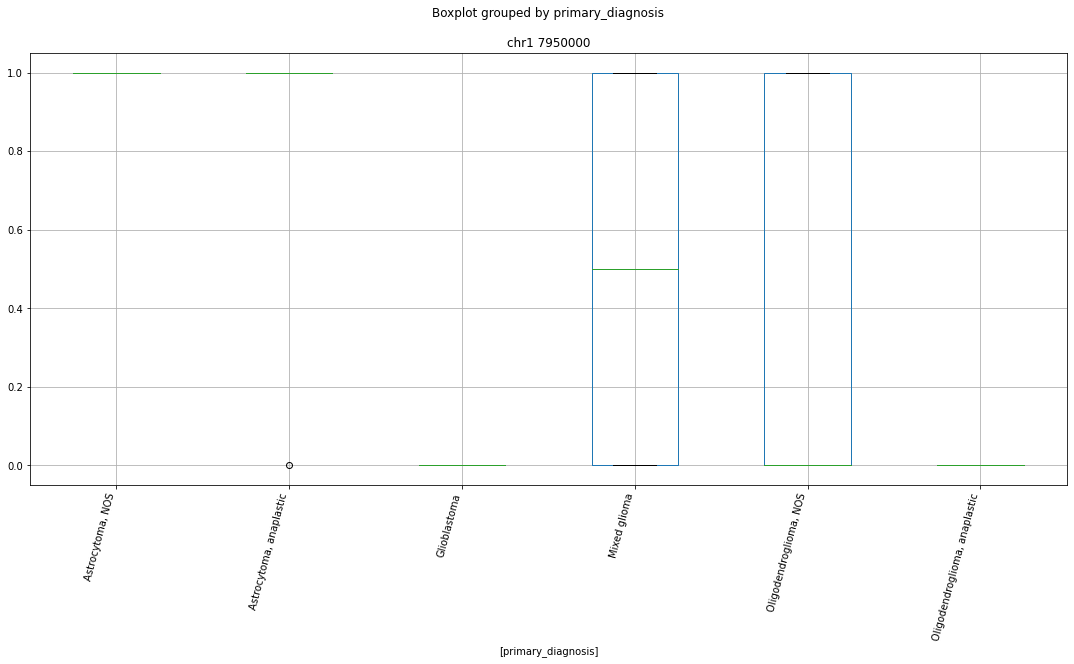

 p : 1.2735213637763784e-13  ( t : 11.358945418727963 ) :  chr11 17050000


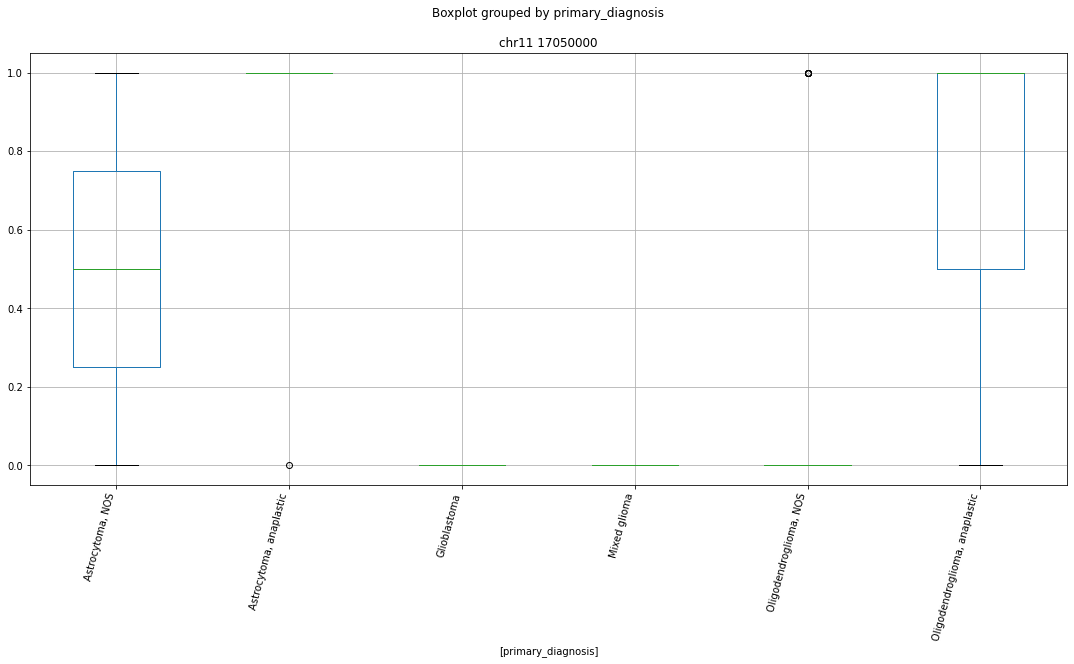

 p : 1.2735213637763784e-13  ( t : 11.358945418727963 ) :  chr1 6710000


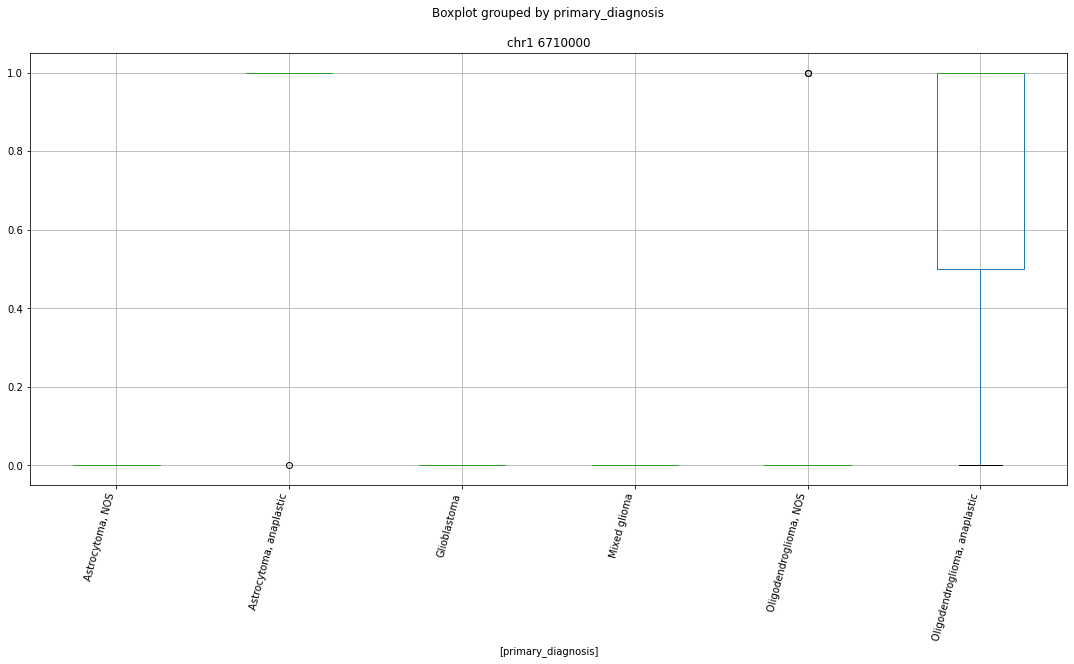

 p : 1.2735213637763784e-13  ( t : 11.358945418727963 ) :  chrX 71450000


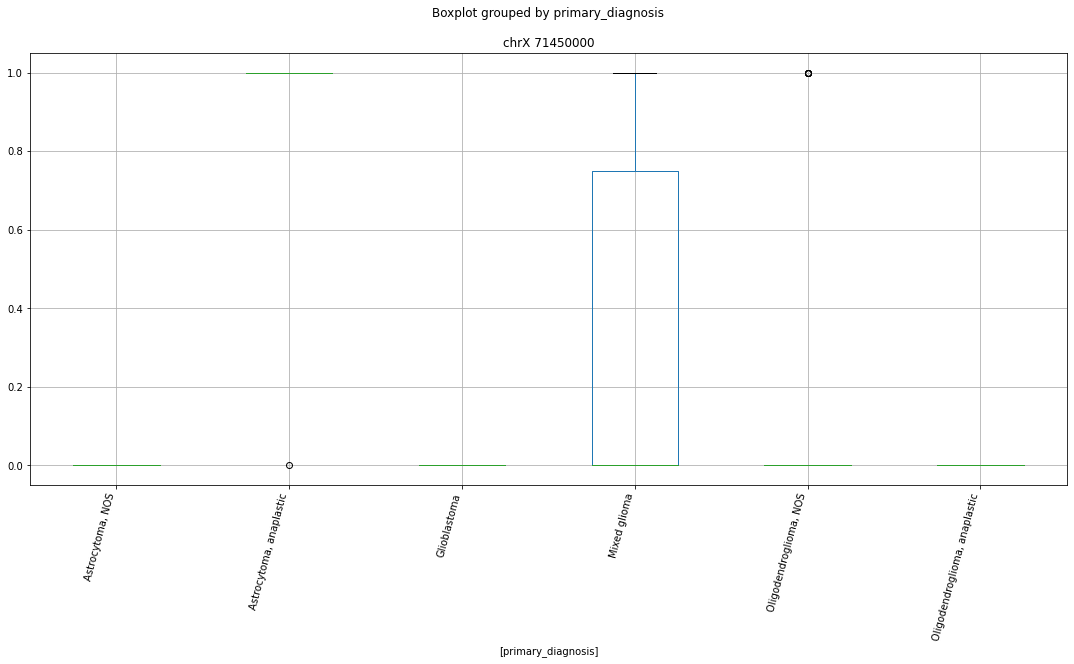

 p : 1.9864071913231304e-11  ( t : 9.677223188944682 ) :  chr22 25270000


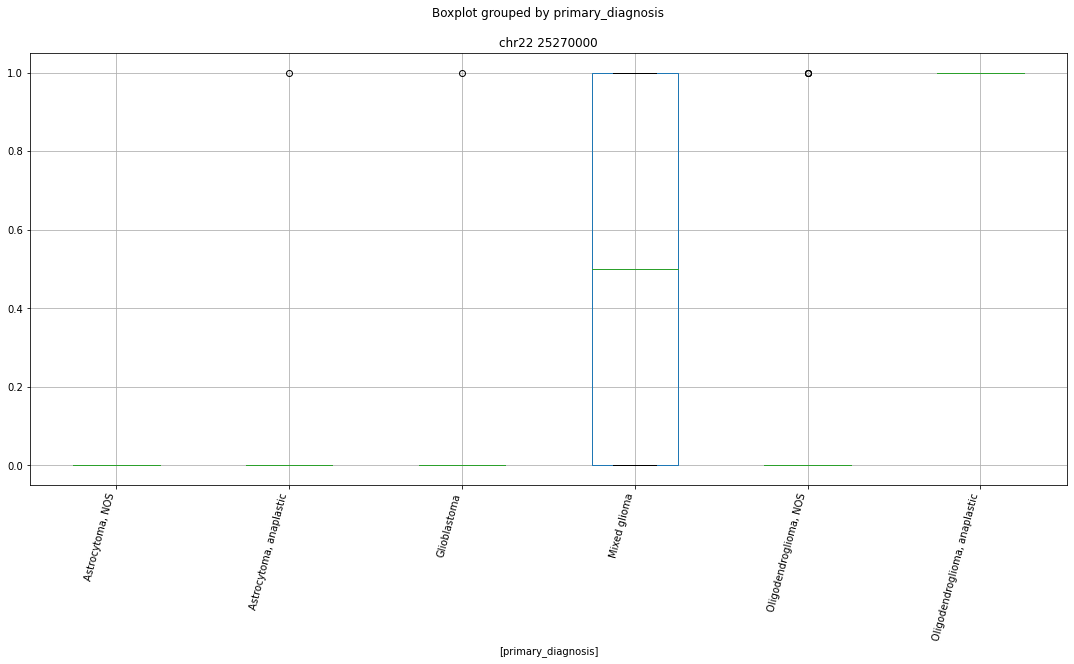

 p : 1.9864071913231304e-11  ( t : 9.677223188944682 ) :  chr3 128950000


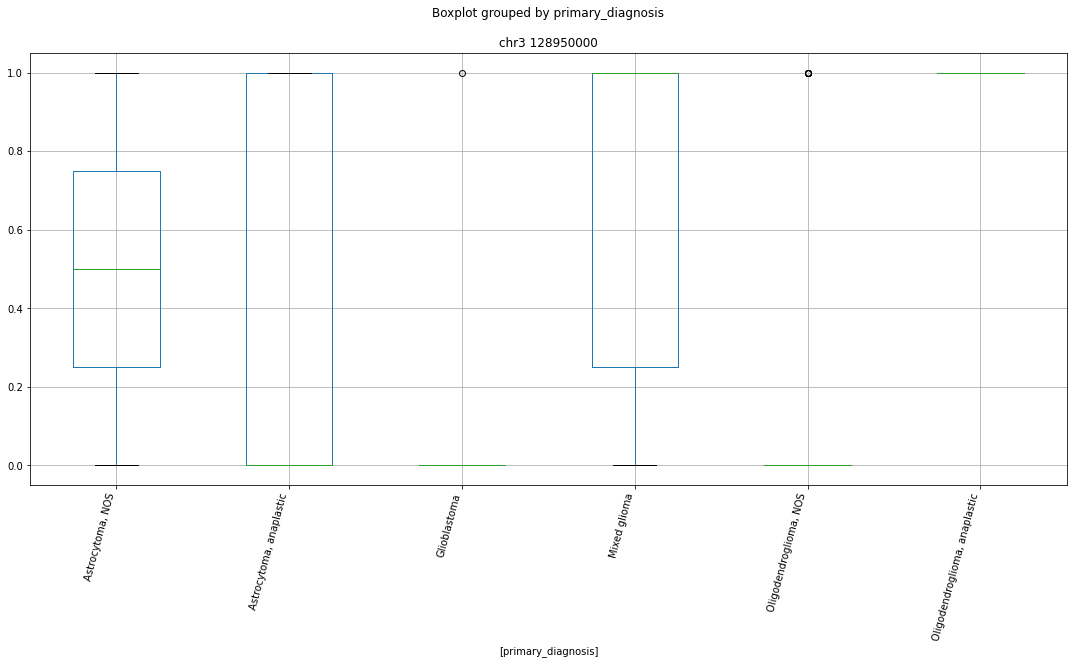

 p : 1.9864071913231447e-11  ( t : 9.67722318894468 ) :  chr2 218930000


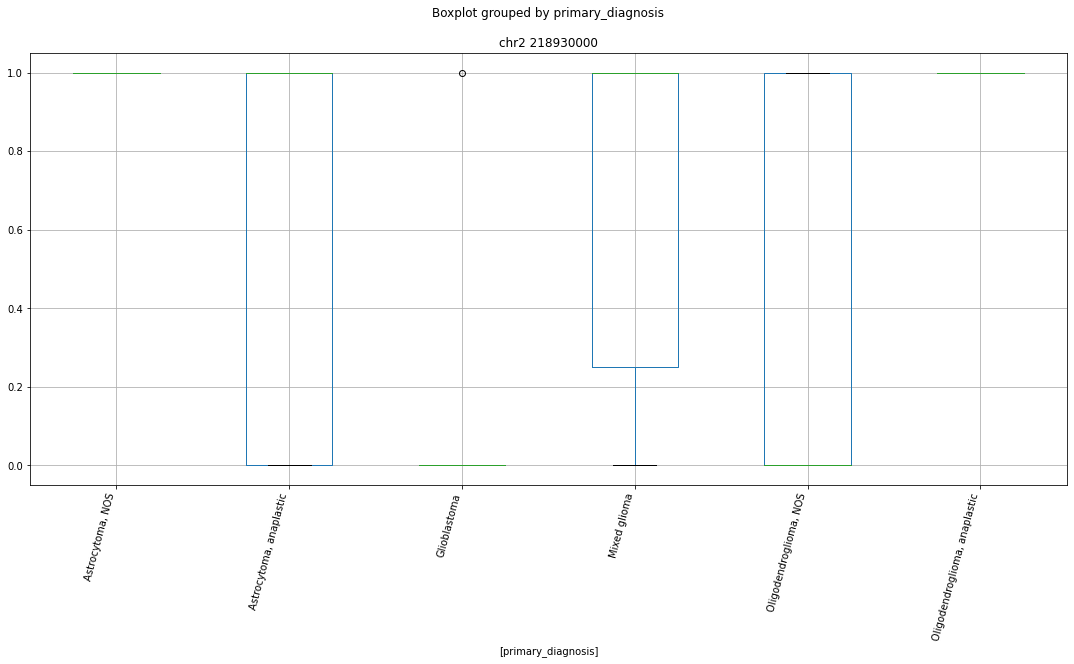

Clustermapping
['chr1 10020000' 'chr1 108160000' 'chr1 108490000' ... 'chrY 4290000'
 'primary_diagnosis' 'subject']


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


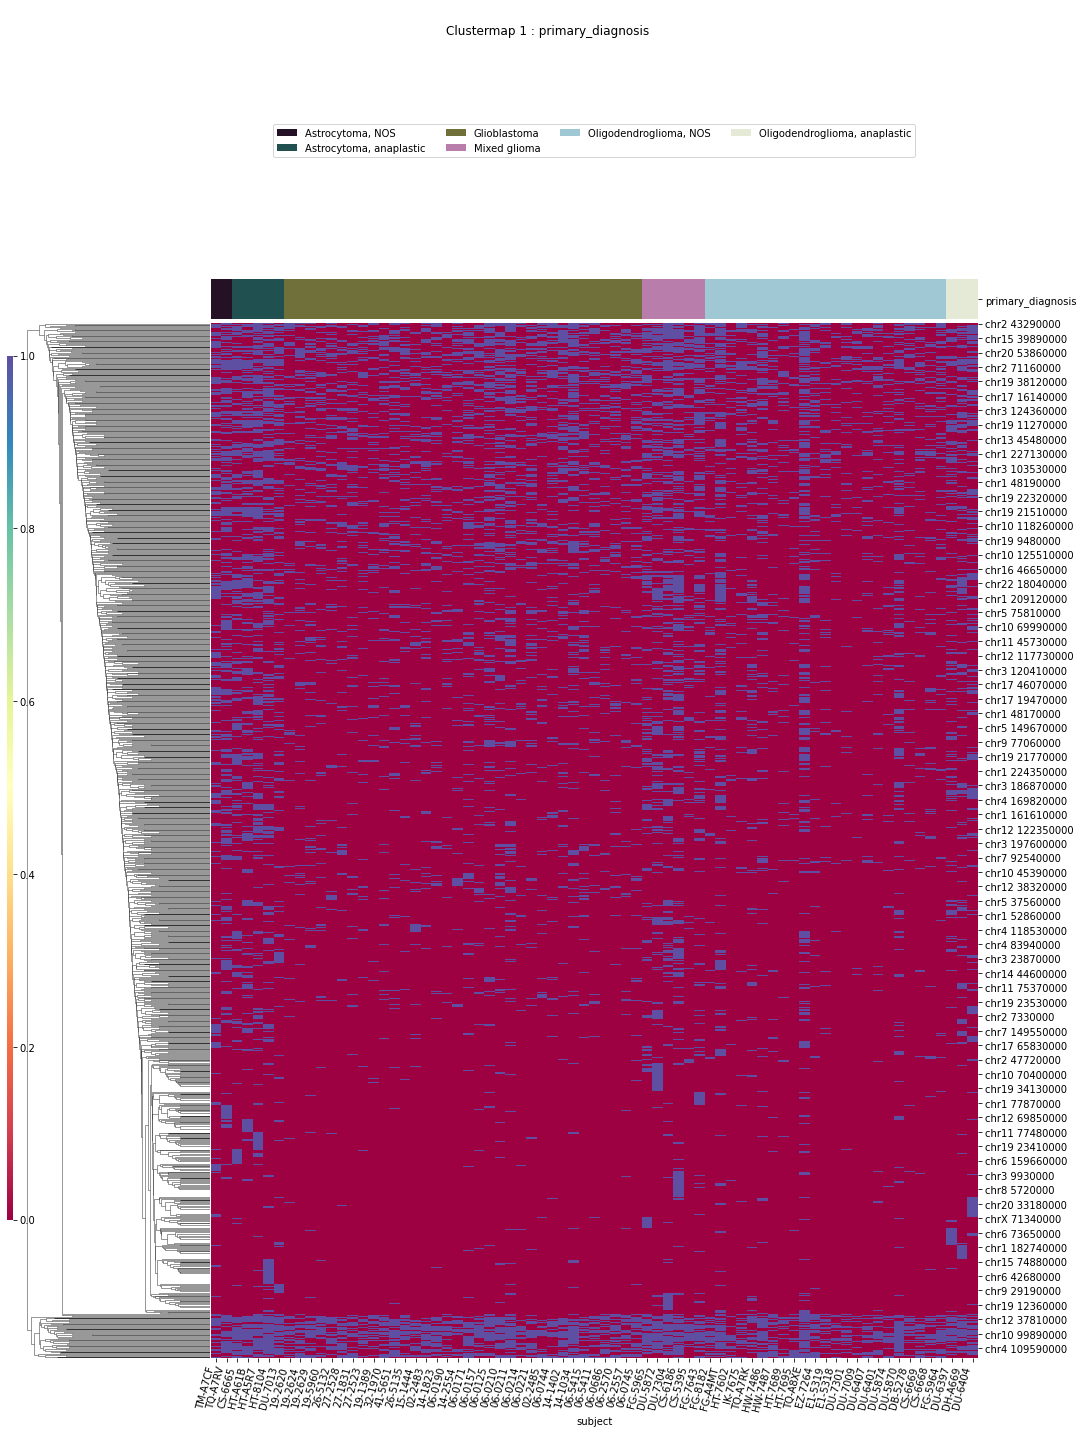

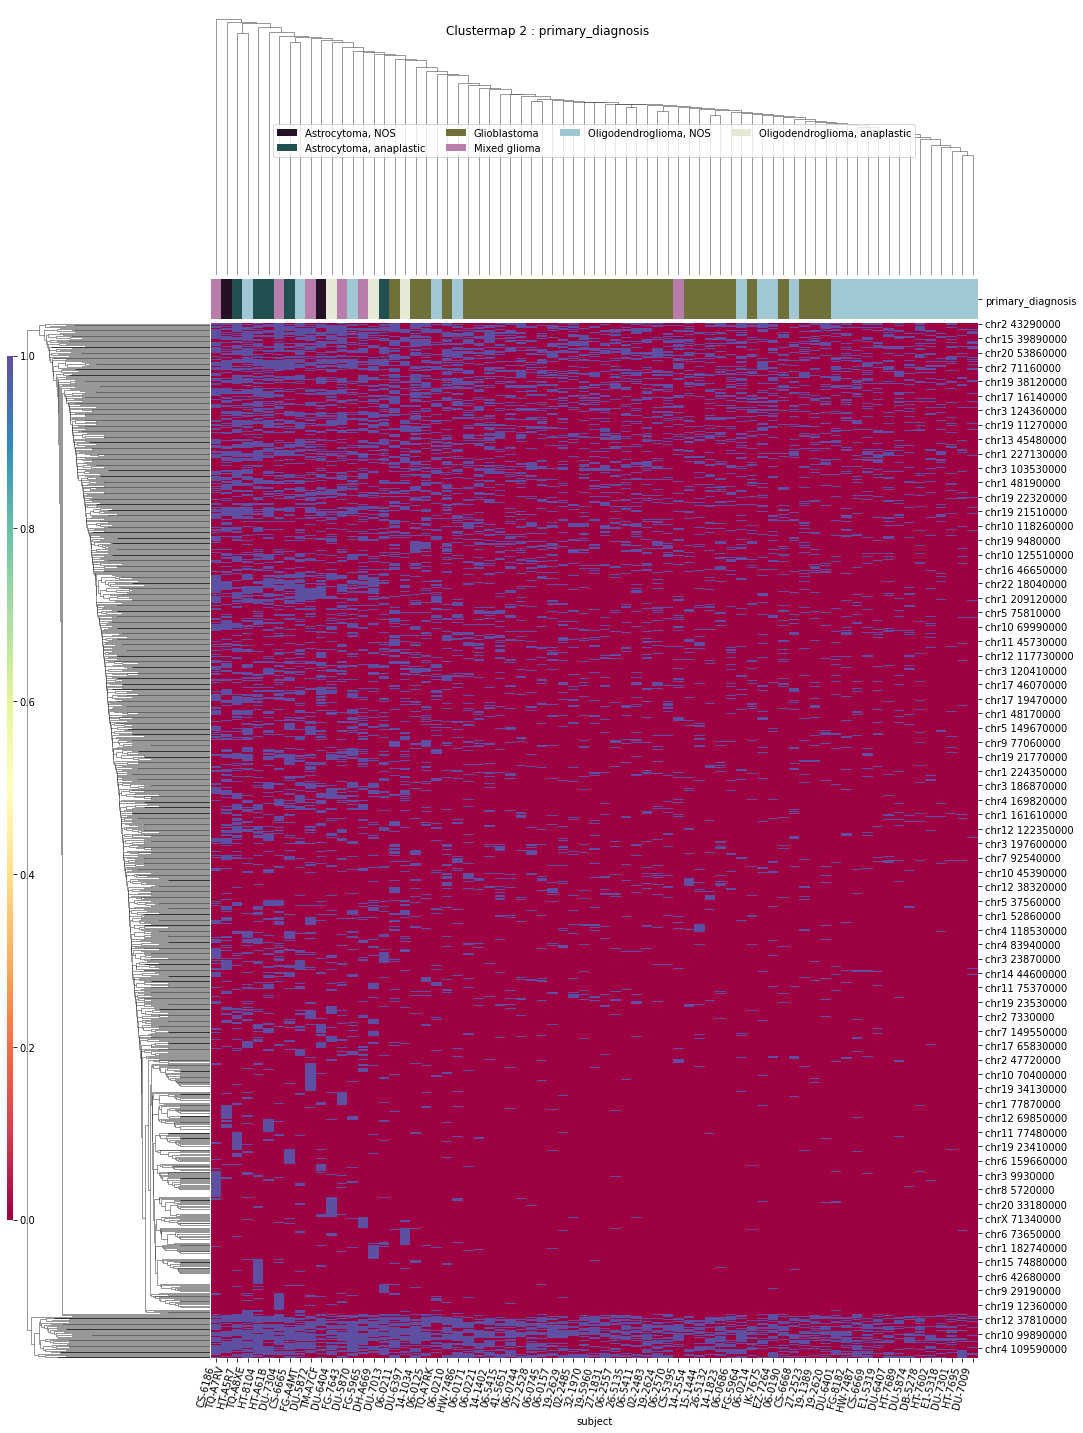

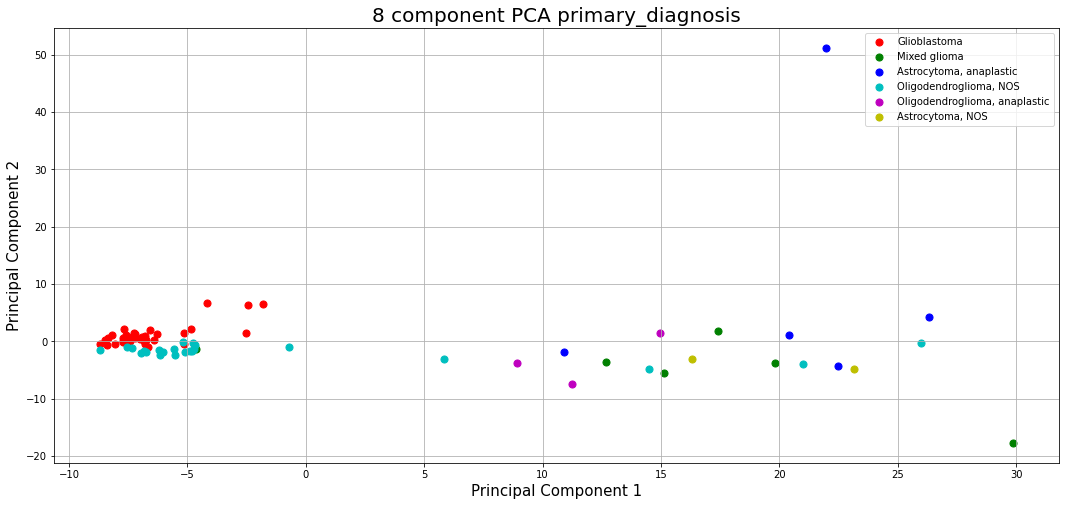

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 111800000' 'chr1 112640000' 'chr1 114790000' 'chr1 143700000'
 'chr1 151760000' 'chr1 152140000' 'chr1 160930000' 'chr1 182440000'
 'chr1 182500000' 'chr1 182740000' 'chr1 197400000' 'chr1 21380000'
 'chr1 219870000' 'chr1 22150000' 'chr1 227130000' 'chr1 231120000'
 'chr1 23500000' 'chr1 24800000' 'chr1 248670000' 'chr1 27850000'
 'chr1 37070000' 'chr1 38640000' 'chr1 39990000' 'chr1 45490000'
 'chr1 48380000' 'chr1 50380000' 'chr1 54230000' 'chr1 71370000'
 'chr1 7950000' 'chr1 89790000' 'chr1 96760000' 'chr1 99070000'
 'chr10 100090000' 'chr10 104780000' 'chr10 110760000' 'chr10 118260000'
 'chr10 122200000' 'chr10 17620000' 'chr10 21430000' 'chr10 24650000'
 'chr10 51390000' 'chr10 67690000' 'chr10 70630000' 'chr10 71860000'
 'chr10 75330000' 'chr10 87080000' 'chr10 9270000' 'chr10 92970000'
 'chr10 97840000' 'chr11 107910000' 'chr11 125860000' 'chr11 130090000'
 'chr11 17050000' 'chr11 19860000' 'chr11 32730000' 'chr11 56140000

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


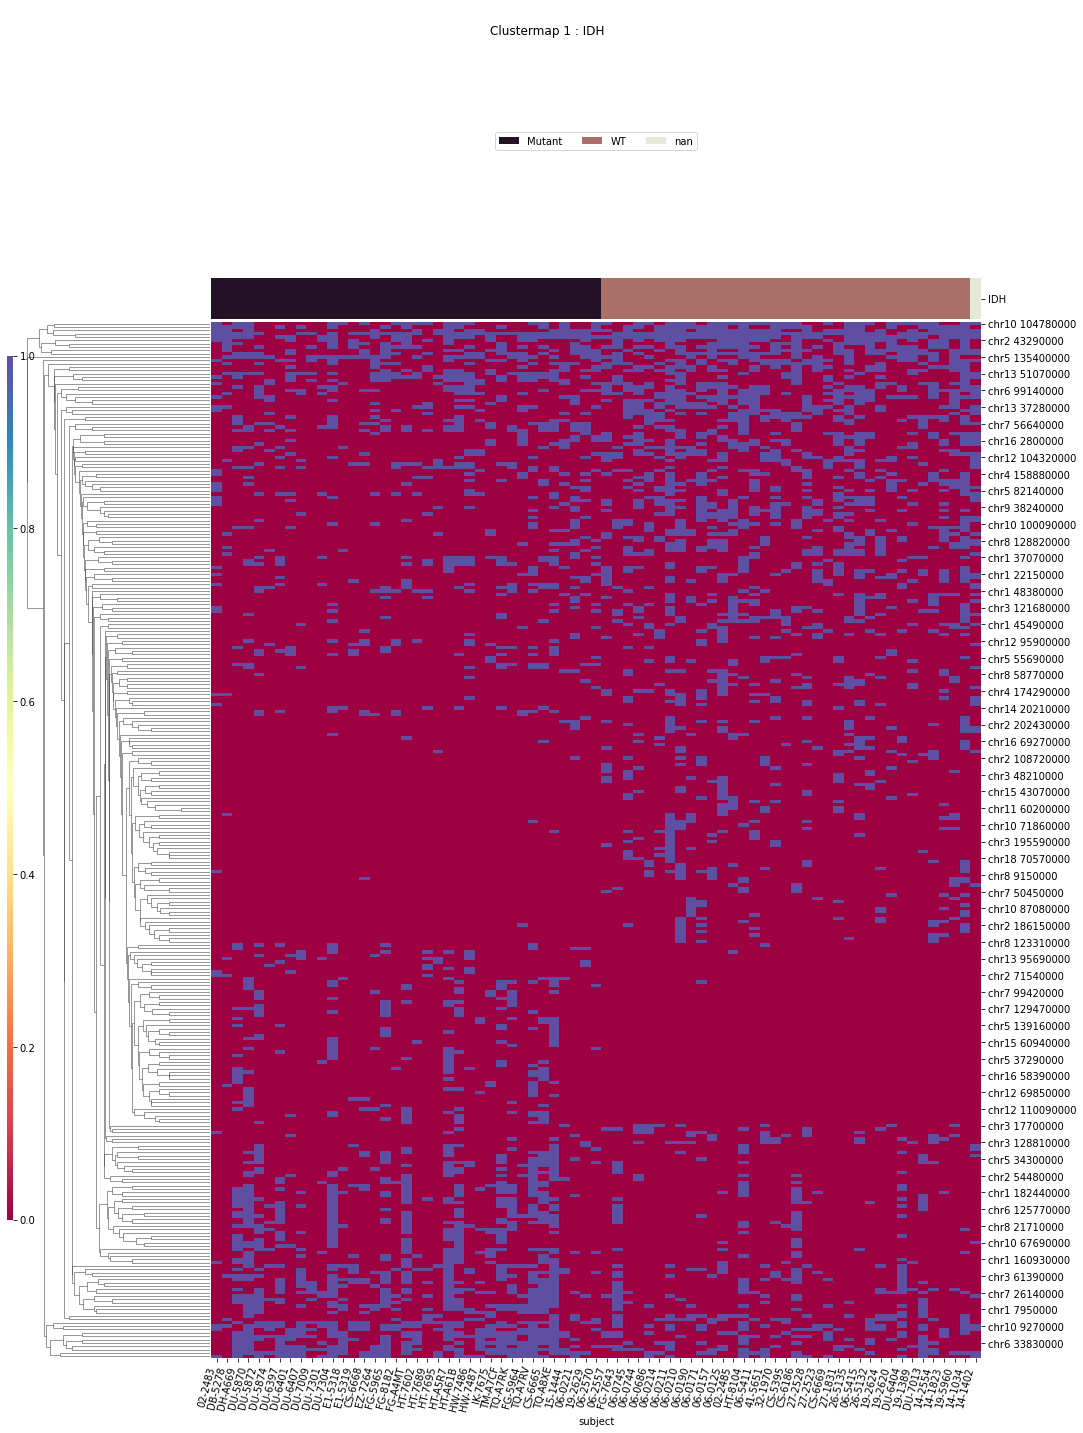

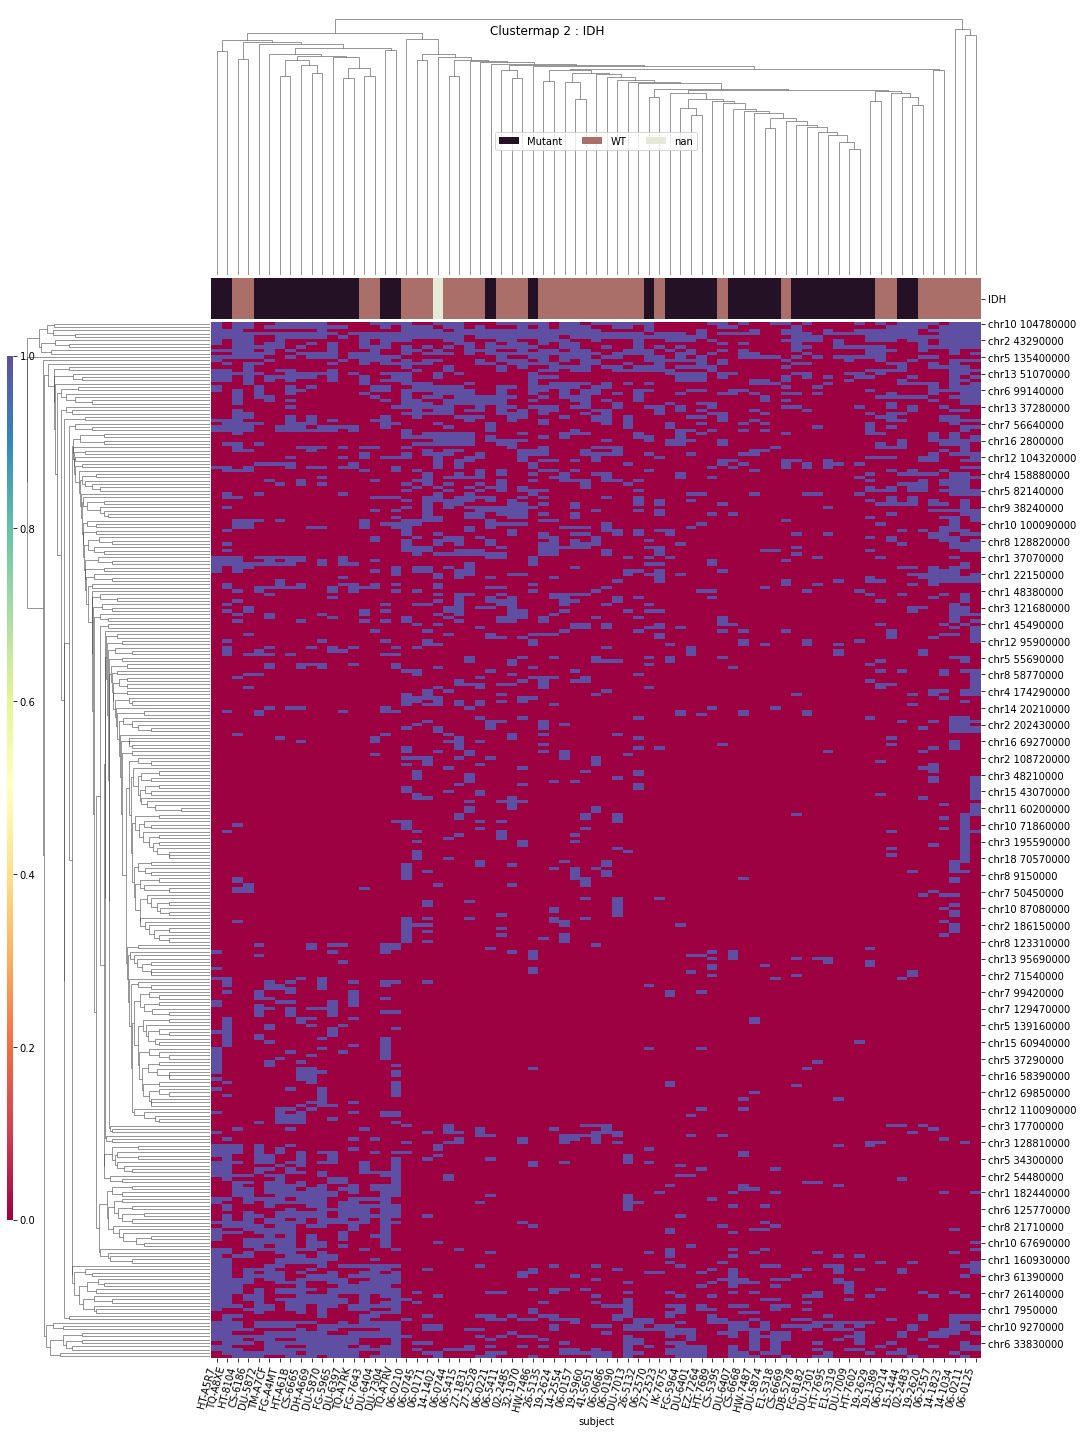

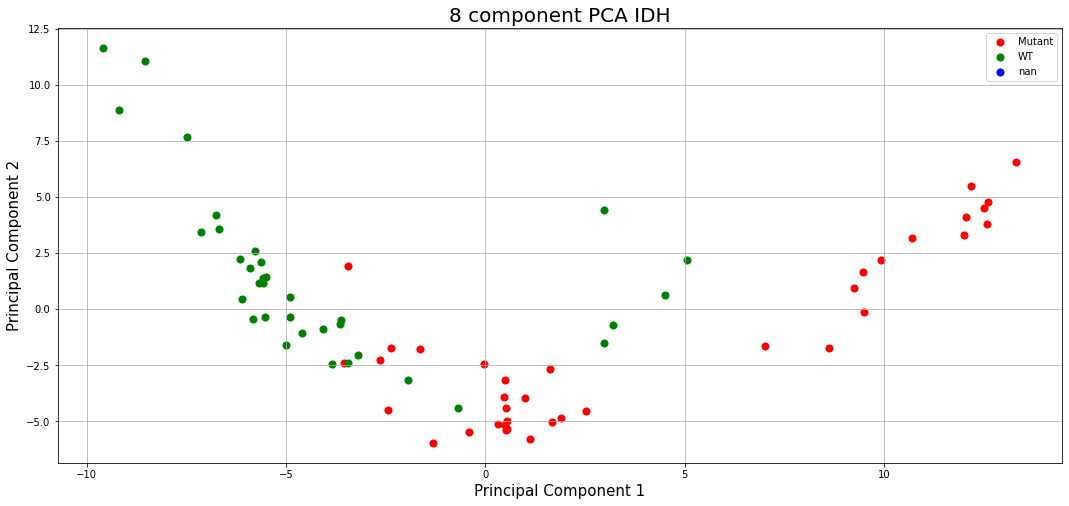

x1p19q
T-Testing
Boxplotting
Clustermapping
['chr1 108670000' 'chr1 114790000' 'chr1 114800000' 'chr1 12040000'
 'chr1 12900000' 'chr1 151650000' 'chr1 182740000' 'chr1 189130000'
 'chr1 189220000' 'chr1 209120000' 'chr1 211190000' 'chr1 211460000'
 'chr1 213150000' 'chr1 224100000' 'chr1 247210000' 'chr1 24800000'
 'chr1 33310000' 'chr1 33510000' 'chr1 45490000' 'chr1 52180000'
 'chr1 90890000' 'chr10 104780000' 'chr10 118260000' 'chr10 24650000'
 'chr10 42130000' 'chr10 43420000' 'chr10 75740000' 'chr10 86250000'
 'chr10 87070000' 'chr10 93960000' 'chr10 97840000' 'chr11 2330000'
 'chr11 59690000' 'chr11 60490000' 'chr11 60810000' 'chr11 73570000'
 'chr11 8970000' 'chr12 100290000' 'chr12 104320000' 'chr12 110090000'
 'chr12 131920000' 'chr12 19340000' 'chr12 4680000' 'chr12 63680000'
 'chr12 69850000' 'chr12 7580000' 'chr13 112670000' 'chr13 19780000'
 'chr13 25480000' 'chr13 45480000' 'chr13 95690000' 'chr14 102410000'
 'chr14 31430000' 'chr14 37550000' 'chr14 63520000'
 'chr14_GL0

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


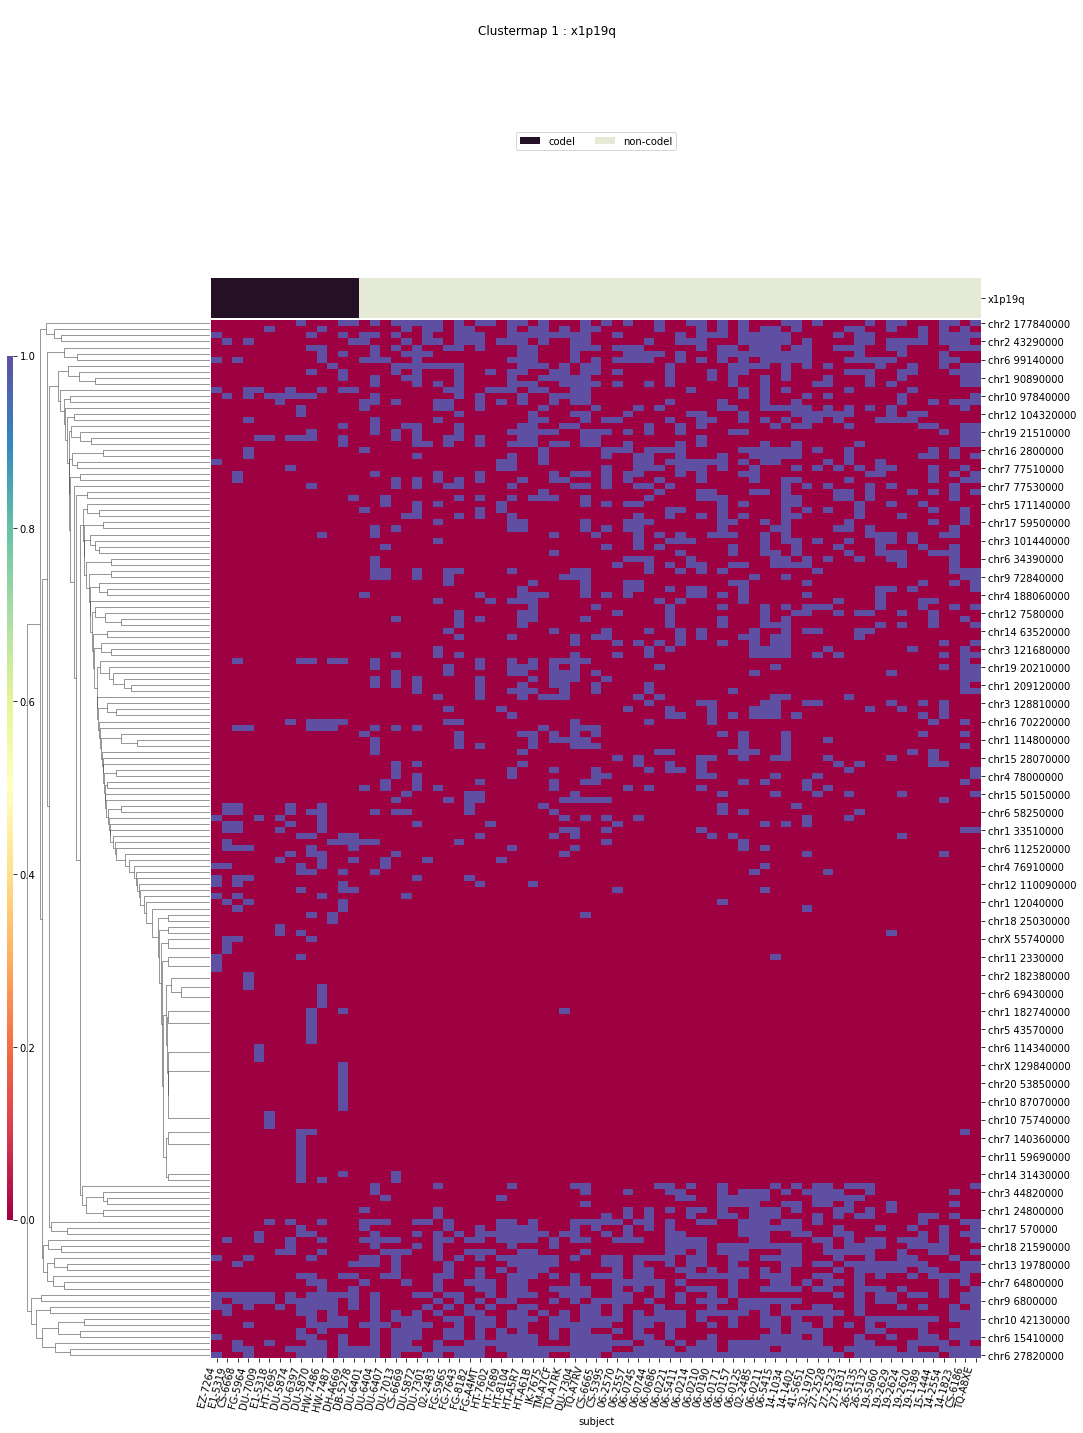

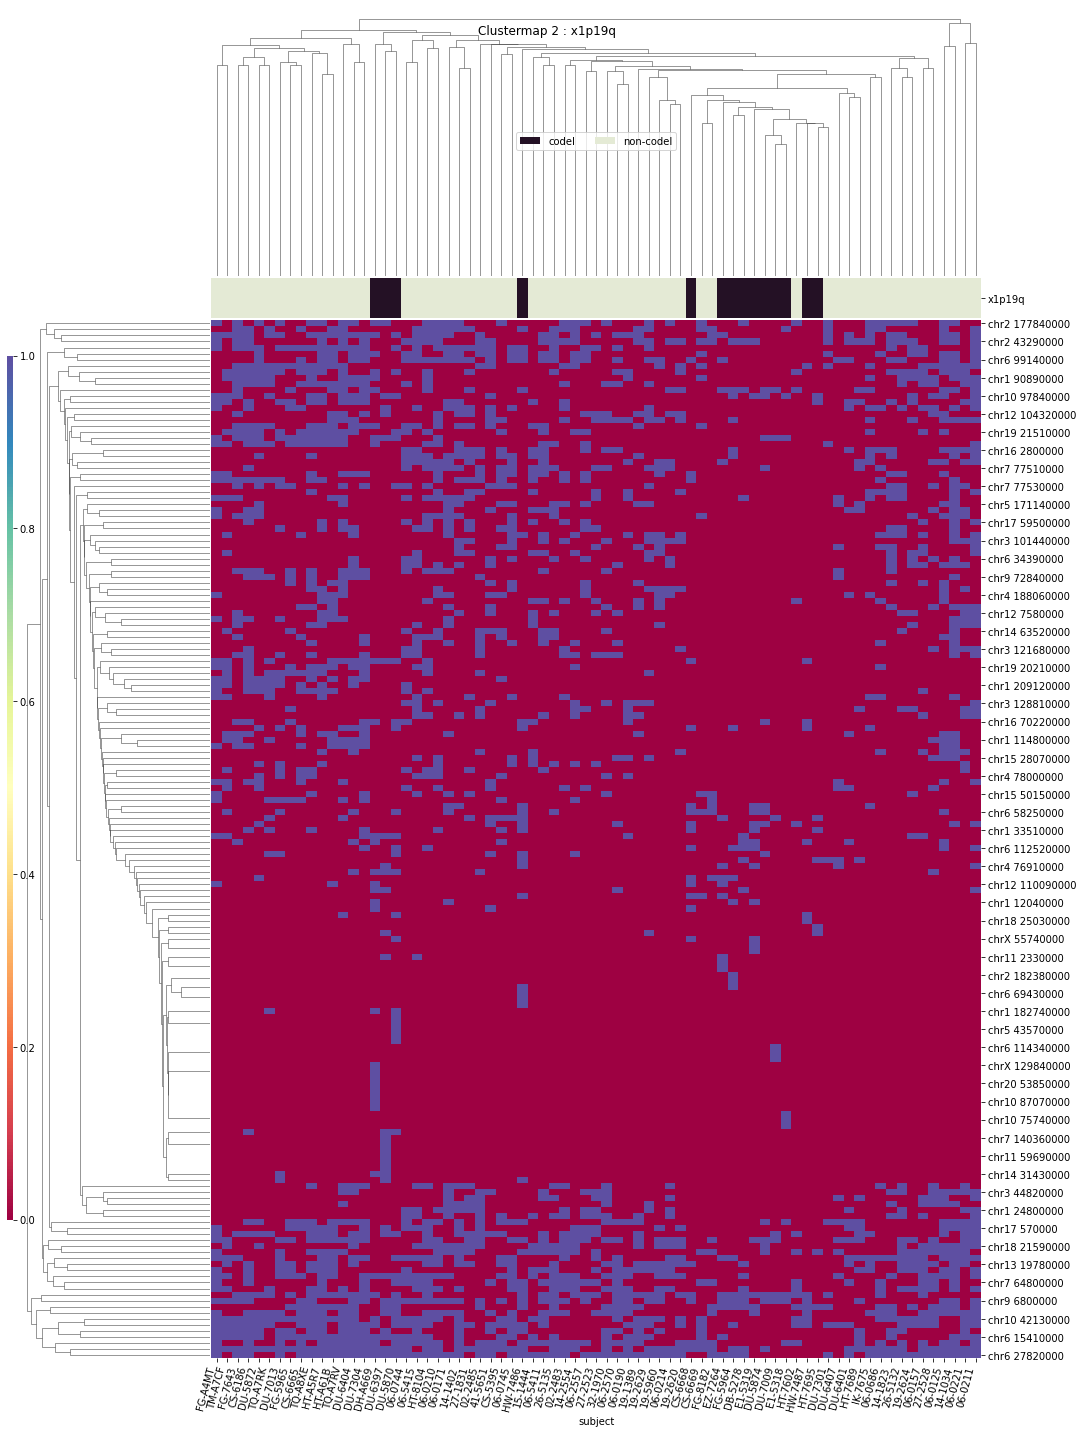

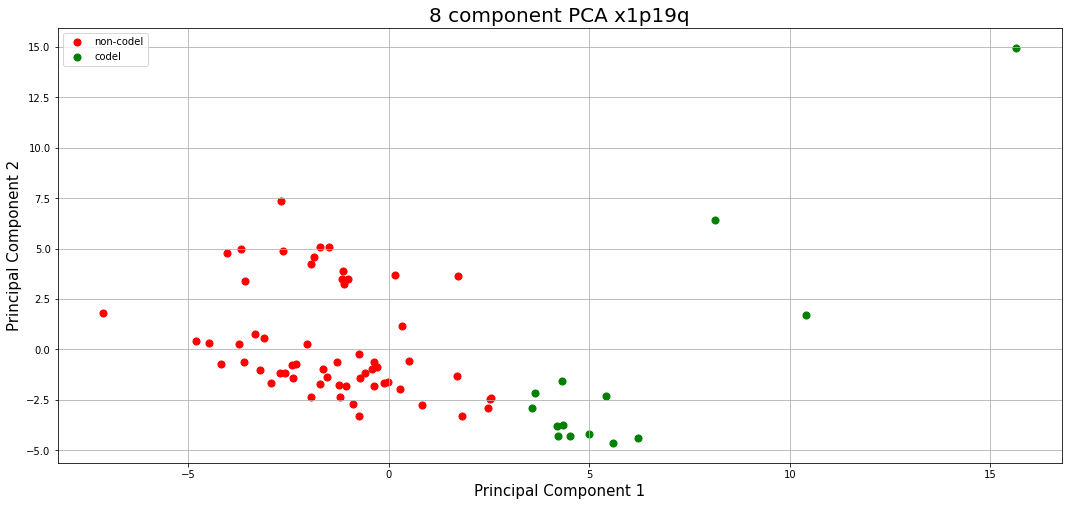

TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr1 10020000' 'chr1 108160000' 'chr1 108490000' 'chr1 114800000'
 'chr1 117300000' 'chr1 12000000' 'chr1 150780000' 'chr1 150850000'
 'chr1 152140000' 'chr1 154280000' 'chr1 156320000' 'chr1 160930000'
 'chr1 162460000' 'chr1 182440000' 'chr1 197400000' 'chr1 206060000'
 'chr1 209120000' 'chr1 21020000' 'chr1 213150000' 'chr1 21380000'
 'chr1 219540000' 'chr1 227130000' 'chr1 231120000' 'chr1 23500000'
 'chr1 23930000' 'chr1 245770000' 'chr1 247210000' 'chr1 248670000'
 'chr1 248820000' 'chr1 27850000' 'chr1 32800000' 'chr1 37070000'
 'chr1 37890000' 'chr1 38640000' 'chr1 39990000' 'chr1 43500000'
 'chr1 45490000' 'chr1 48380000' 'chr1 50380000' 'chr1 52180000'
 'chr1 54230000' 'chr1 64200000' 'chr1 71370000' 'chr1 7950000'
 'chr1 86210000' 'chr1 96760000' 'chr1 99070000' 'chr10 118260000'
 'chr10 122200000' 'chr10 125510000' 'chr10 17620000' 'chr10 34970000'
 'chr10 45250000' 'chr10 45340000' 'chr10 45390000' 'chr10 70630000'
 'chr10

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


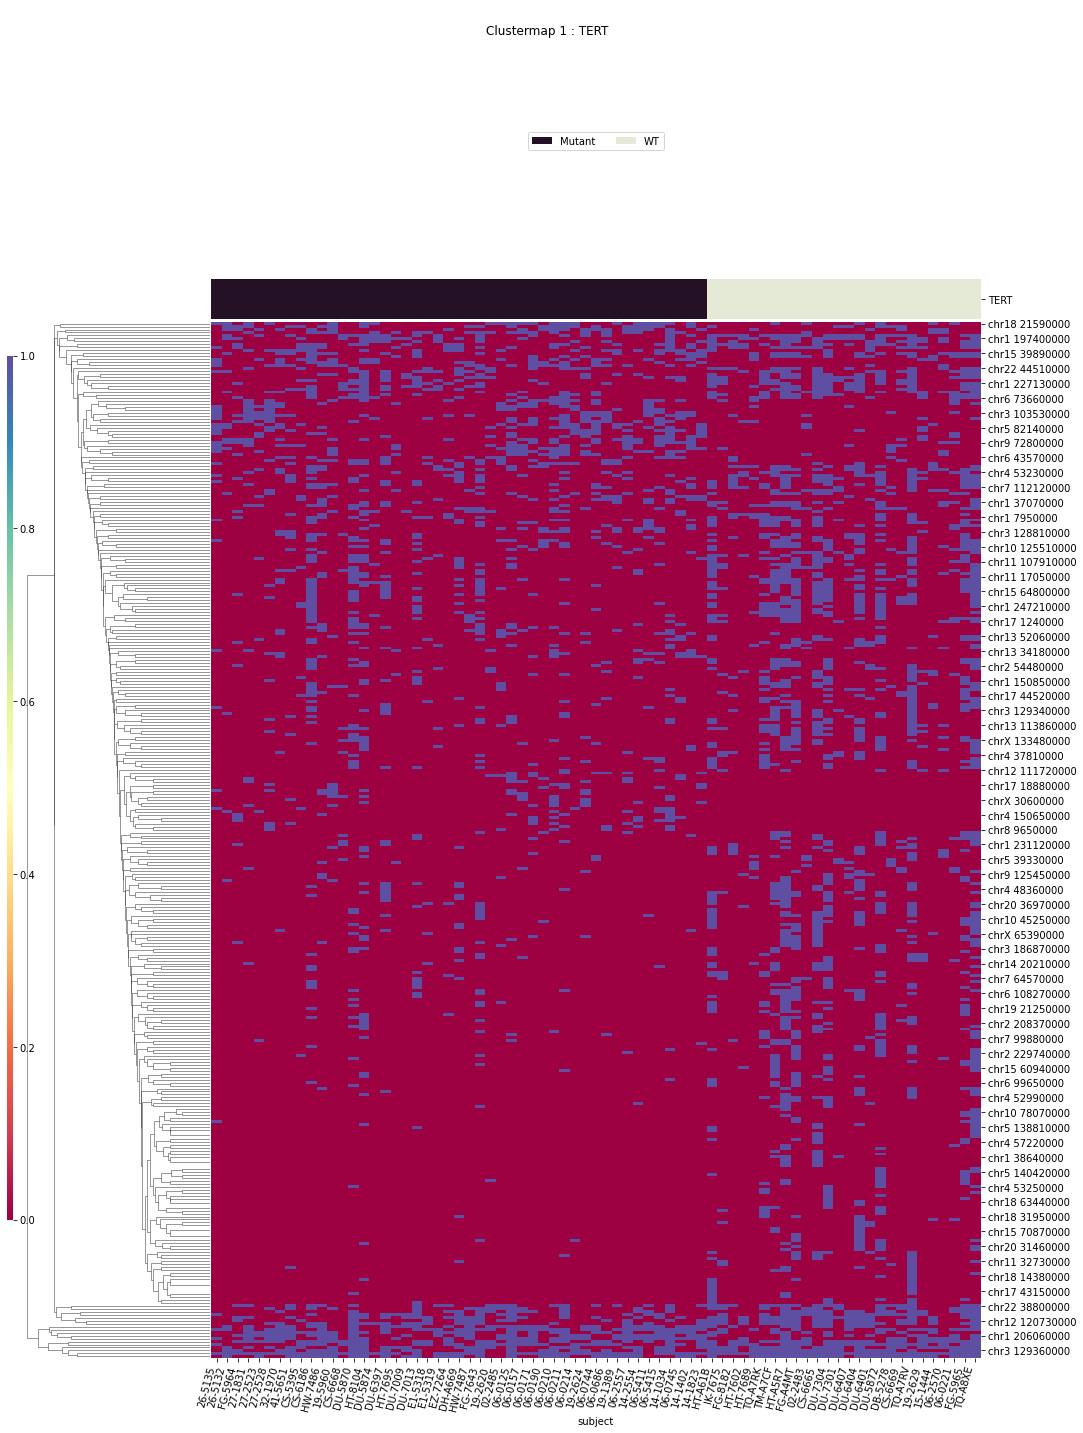

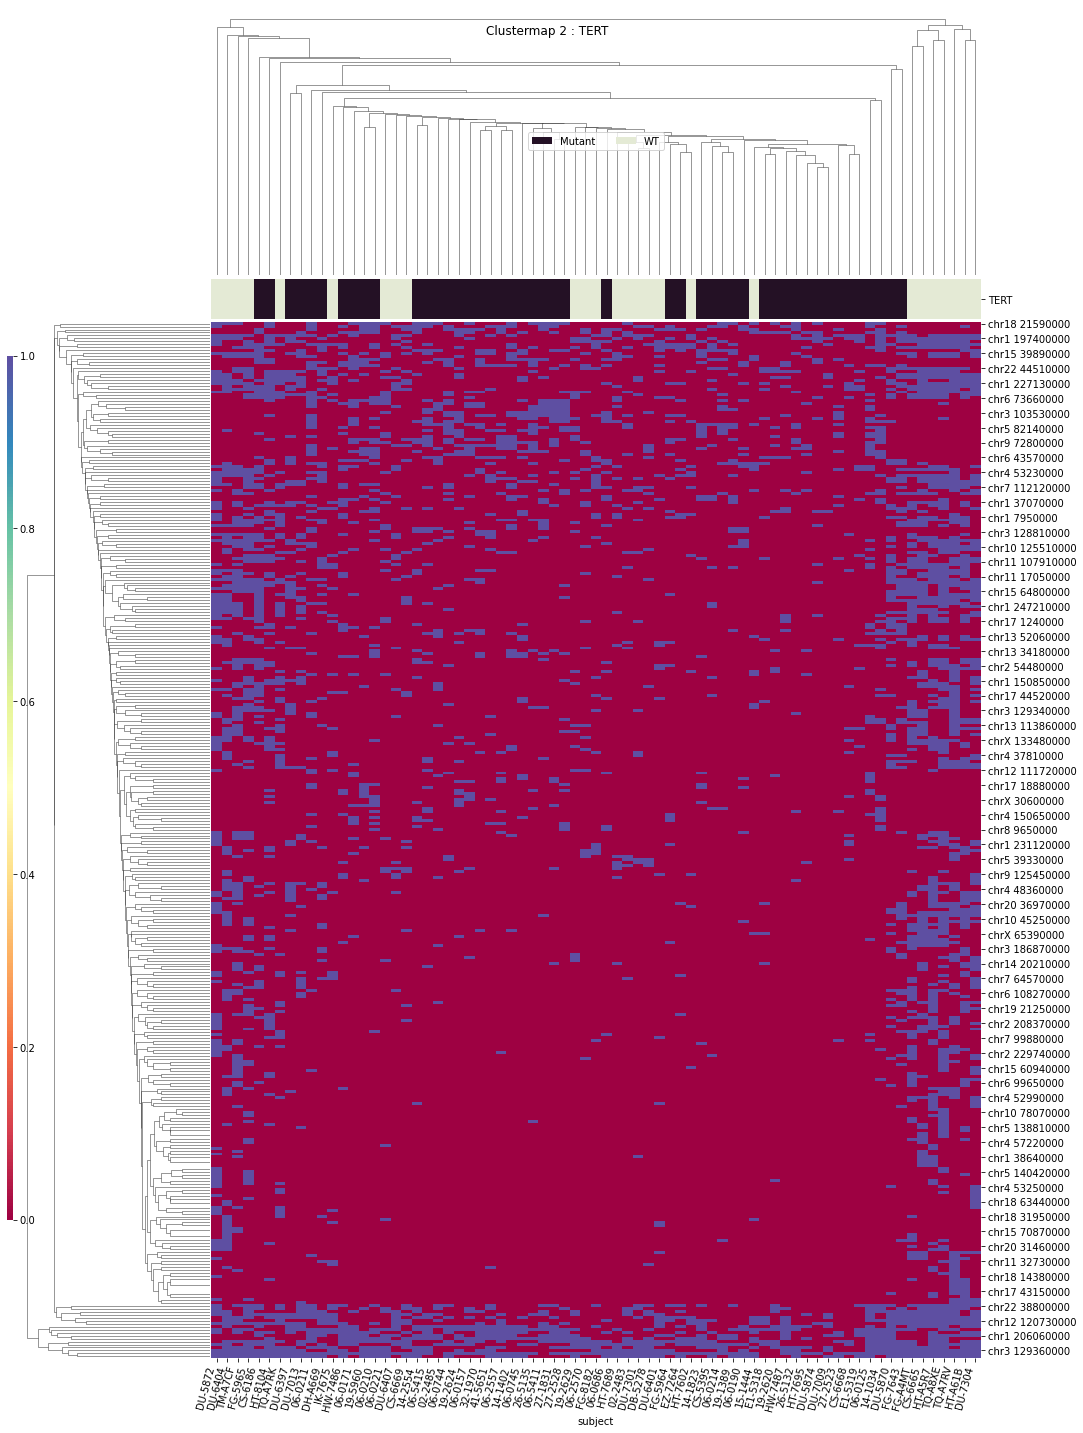

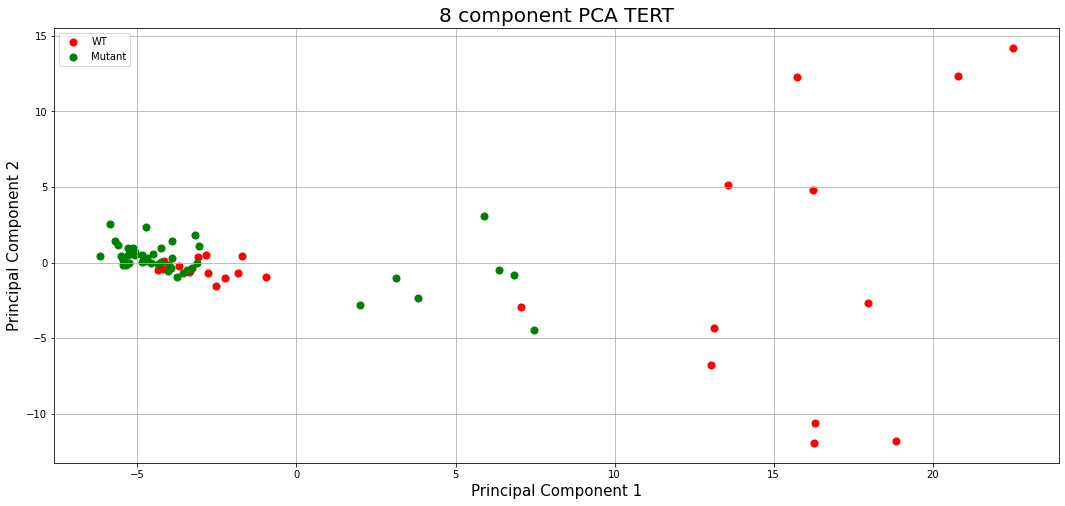

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 108490000' 'chr1 111800000' 'chr1 112640000' 'chr1 114790000'
 'chr1 12000000' 'chr1 145760000' 'chr1 150850000' 'chr1 152140000'
 'chr1 156320000' 'chr1 160930000' 'chr1 161280000' 'chr1 161610000'
 'chr1 162460000' 'chr1 168200000' 'chr1 173610000' 'chr1 179040000'
 'chr1 182440000' 'chr1 182500000' 'chr1 197400000' 'chr1 206060000'
 'chr1 209120000' 'chr1 213150000' 'chr1 21380000' 'chr1 219870000'
 'chr1 22150000' 'chr1 227130000' 'chr1 231120000' 'chr1 23250000'
 'chr1 23500000' 'chr1 237670000' 'chr1 23930000' 'chr1 245770000'
 'chr1 246360000' 'chr1 247210000' 'chr1 247220000' 'chr1 24790000'
 'chr1 24800000' 'chr1 248670000' 'chr1 26800000' 'chr1 27060000'
 'chr1 27290000' 'chr1 33510000' 'chr1 37070000' 'chr1 38640000'
 'chr1 39990000' 'chr1 44870000' 'chr1 45080000' 'chr1 45490000'
 'chr1 48170000' 'chr1 48190000' 'chr1 48380000' 'chr1 50380000'
 'chr1 52860000' 'chr1 54230000' 'chr1 65630000' 'chr1 6710000'
 'chr1 7950

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


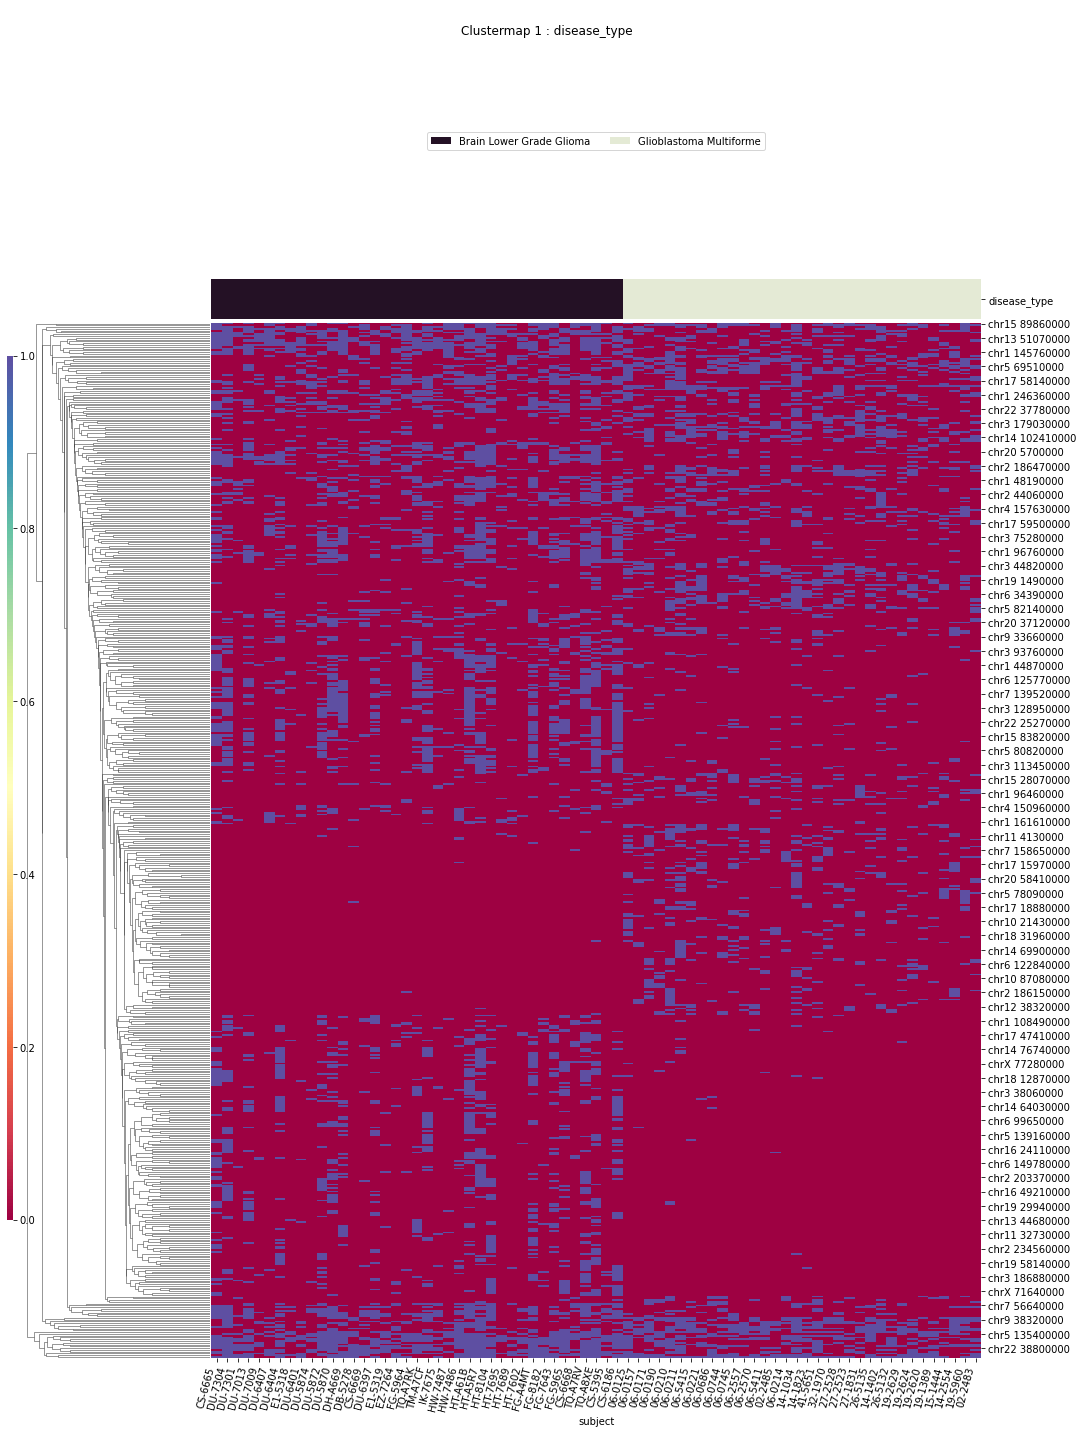

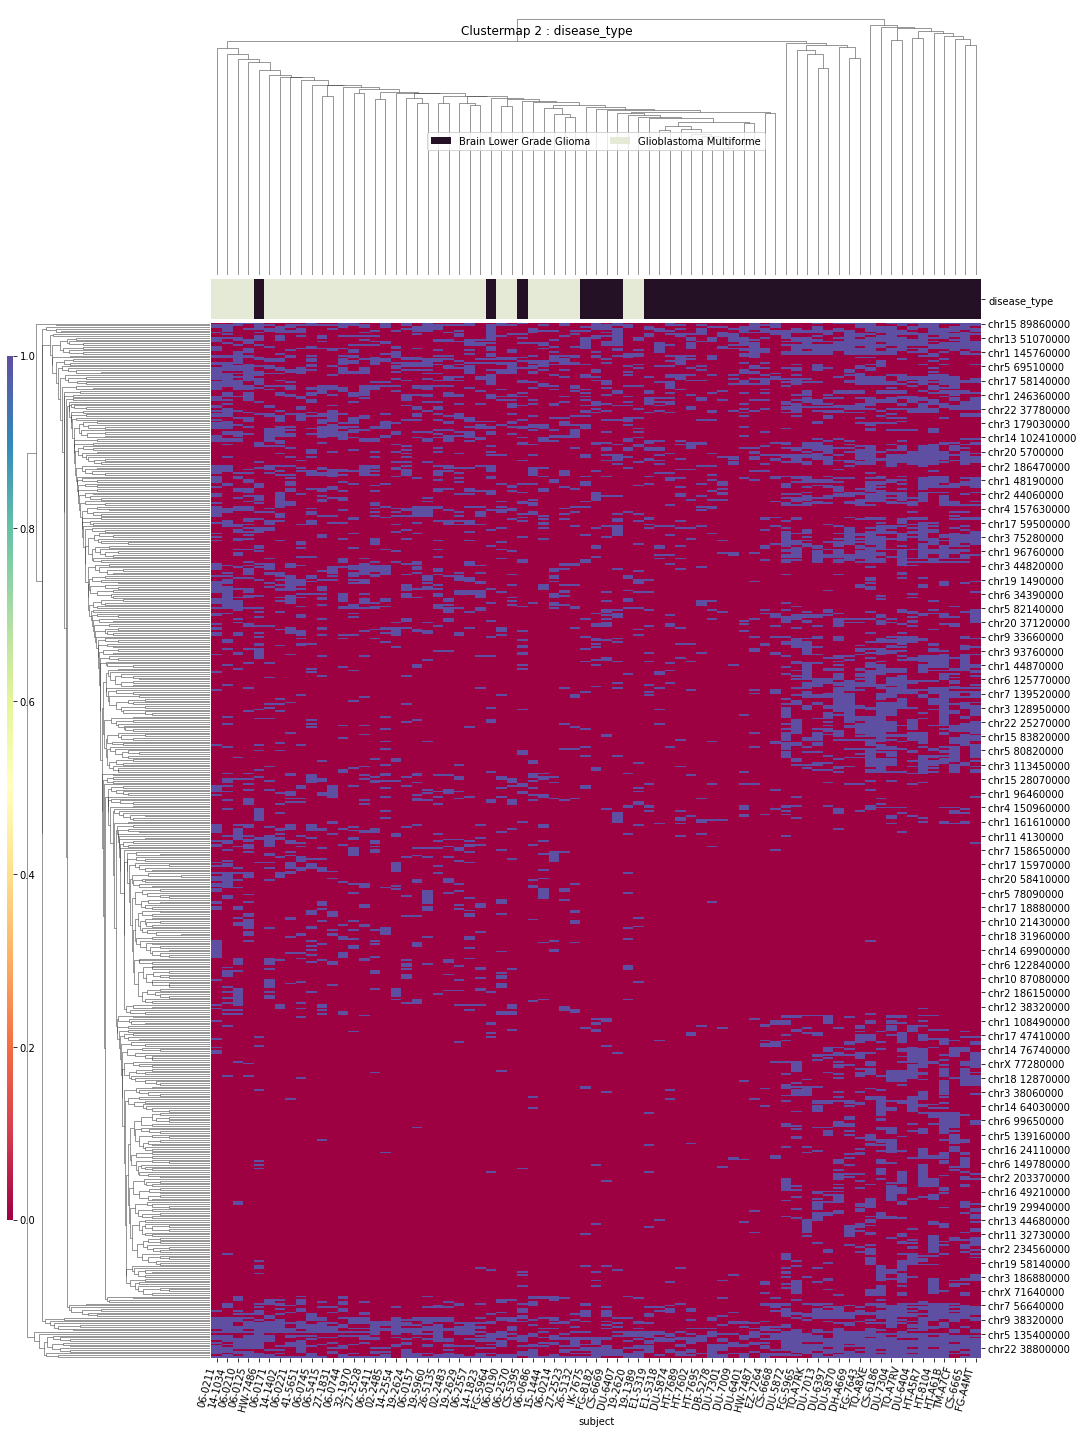

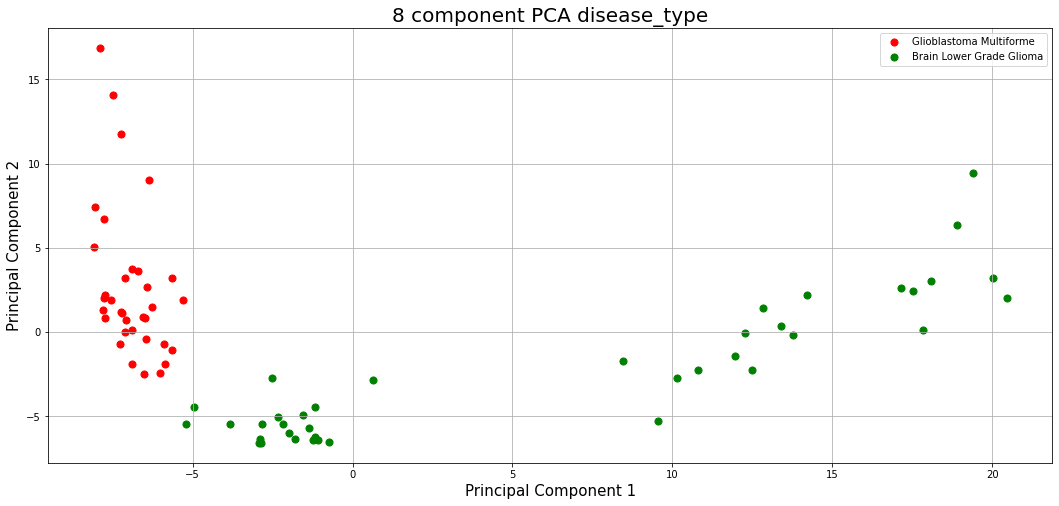

IDH_1p19q_status
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 10020000' 'chr1 108160000' 'chr1 108670000'
 'chr1 112640000' 'chr1 114790000' 'chr1 114800000' 'chr1 12040000'
 'chr1 12900000' 'chr1 150780000' 'chr1 150850000' 'chr1 151650000'
 'chr1 152140000' 'chr1 154280000' 'chr1 156320000' 'chr1 160930000'
 'chr1 161280000' 'chr1 182440000' 'chr1 182740000' 'chr1 189130000'
 'chr1 189220000' 'chr1 197400000' 'chr1 208650000' 'chr1 209120000'
 'chr1 21020000' 'chr1 211190000' 'chr1 213150000' 'chr1 21380000'
 'chr1 22150000' 'chr1 227130000' 'chr1 231120000' 'chr1 23500000'
 'chr1 23930000' 'chr1 245770000' 'chr1 247210000' 'chr1 24800000'
 'chr1 248670000' 'chr1 248820000' 'chr1 27850000' 'chr1 33510000'
 'chr1 37070000' 'chr1 38640000' 'chr1 39990000' 'chr1 45490000'
 'chr1 48380000' 'chr1 50380000' 'chr1 52180000' 'chr1 54230000'
 'chr1 71370000' 'chr1 76110000' 'chr1 7950000' 'chr1 90890000'
 'chr1 96470000' 'chr1 96760000' 'chr1 99070000' 'chr10 100090000'
 'chr10 104780000' 'chr10 11076

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


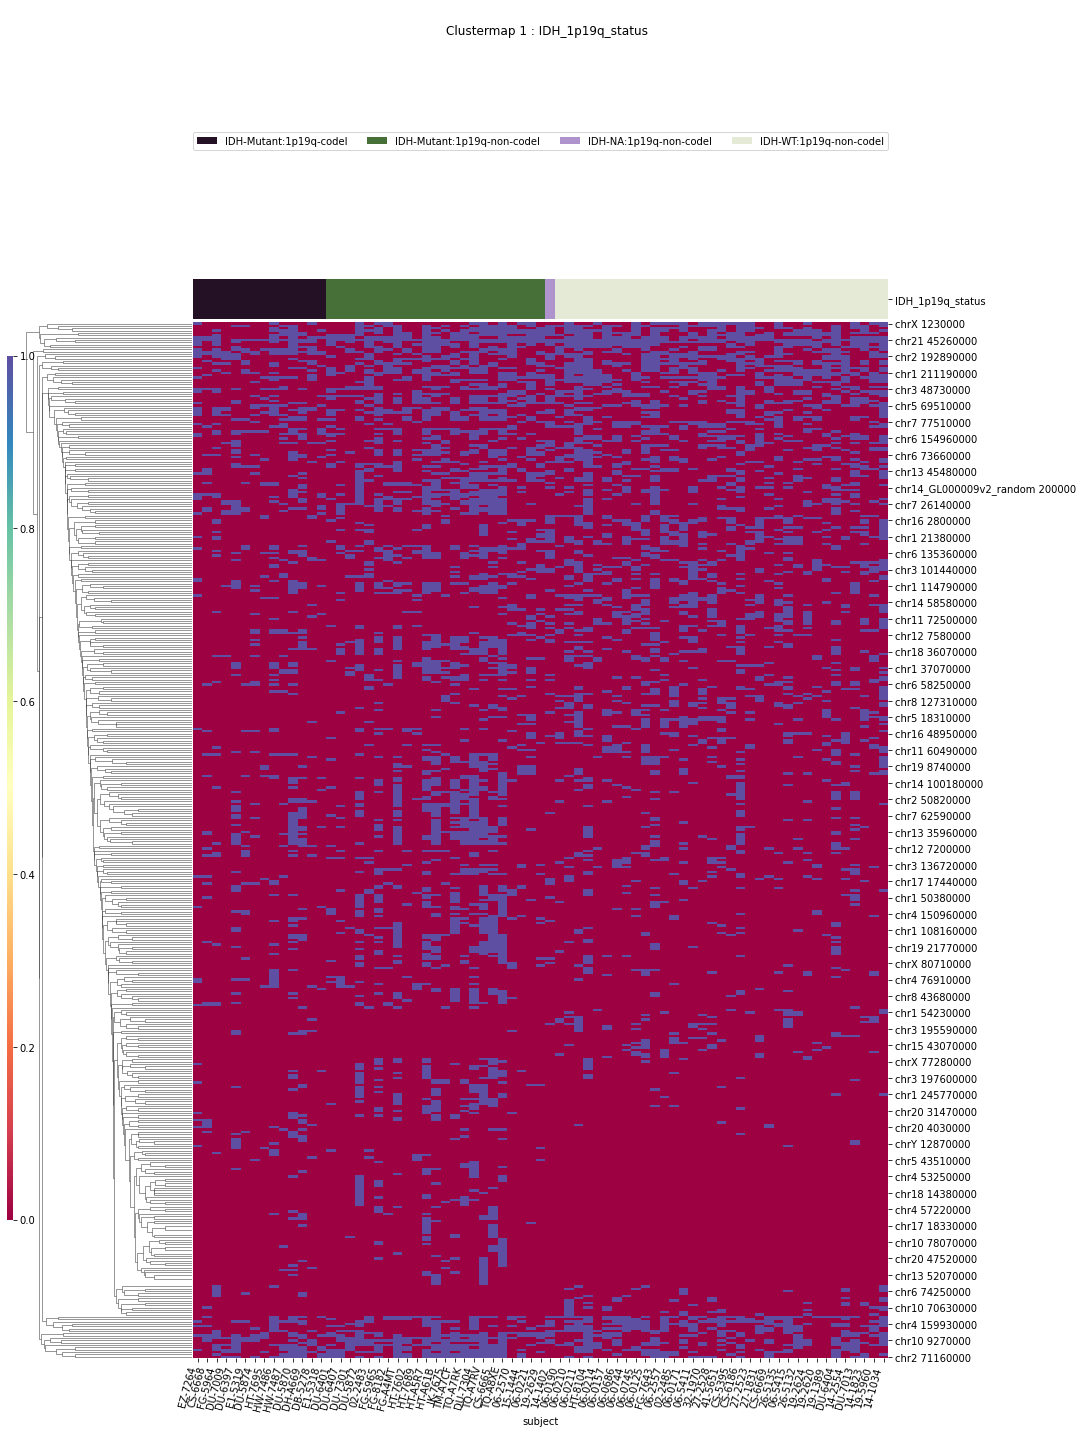

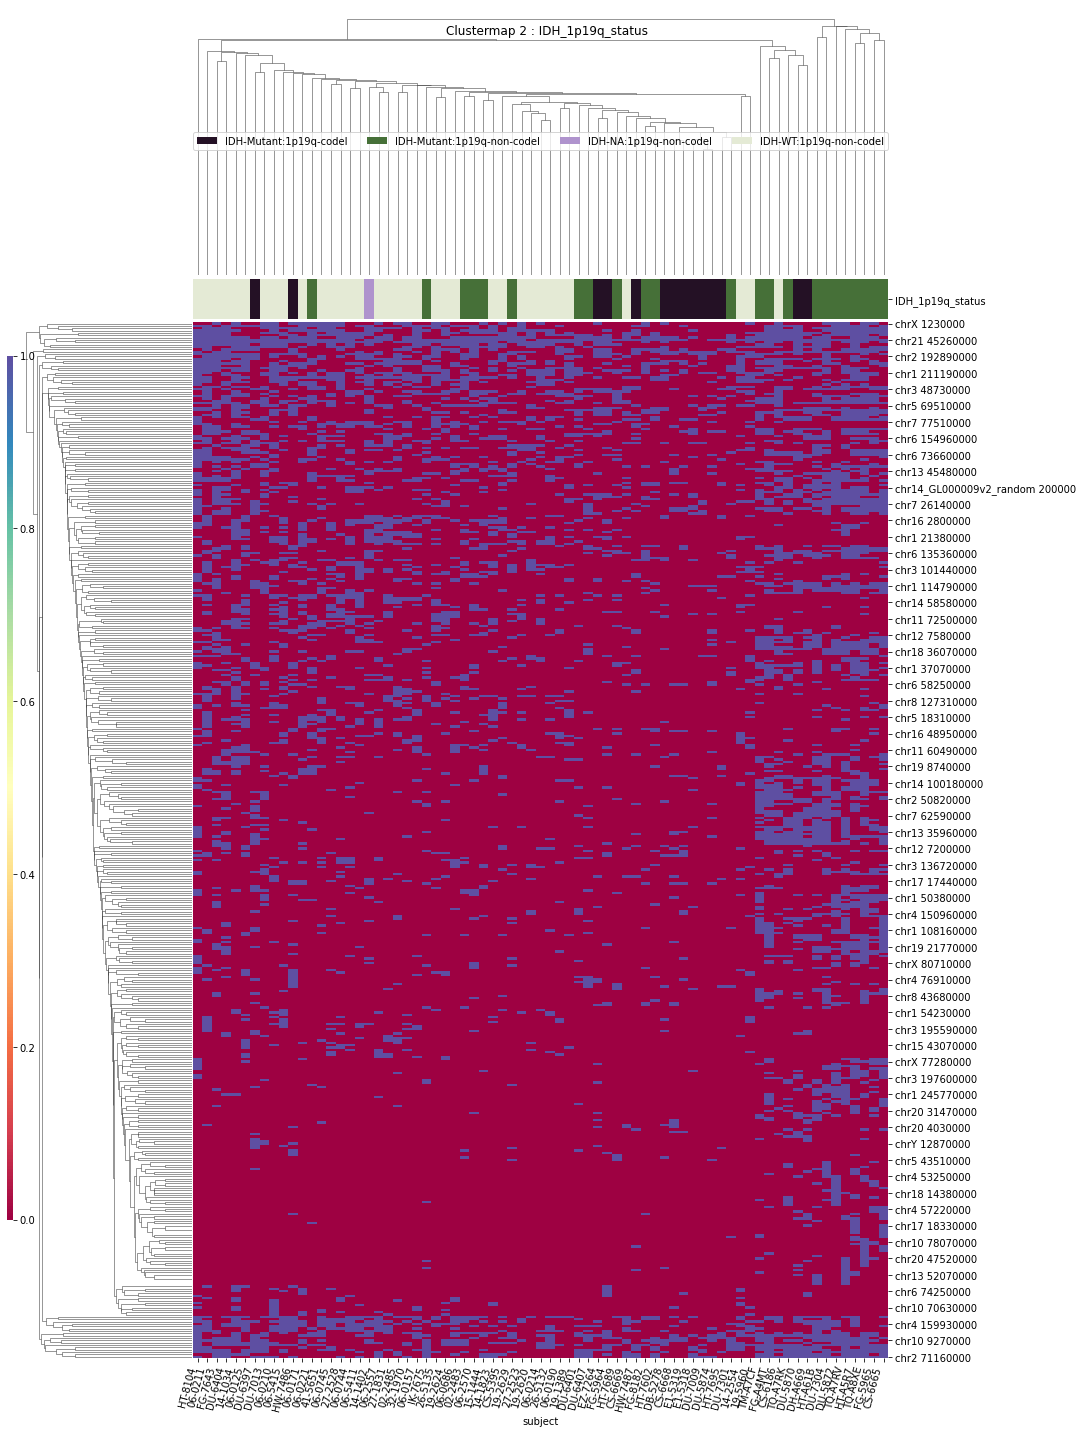

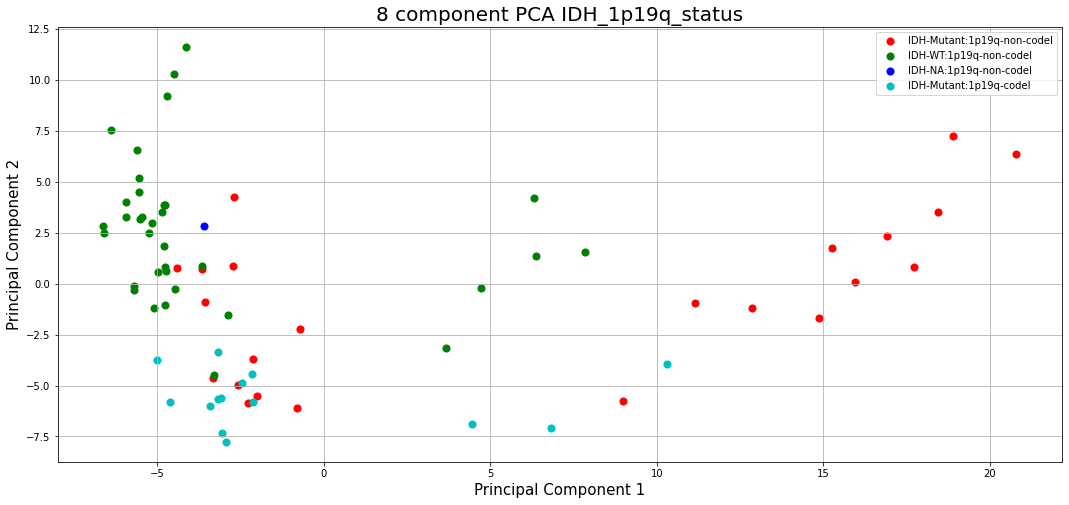

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 10020000' 'chr1 108160000' ... 'chrX 96050000'
 'chrY 12870000' 'subject']


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


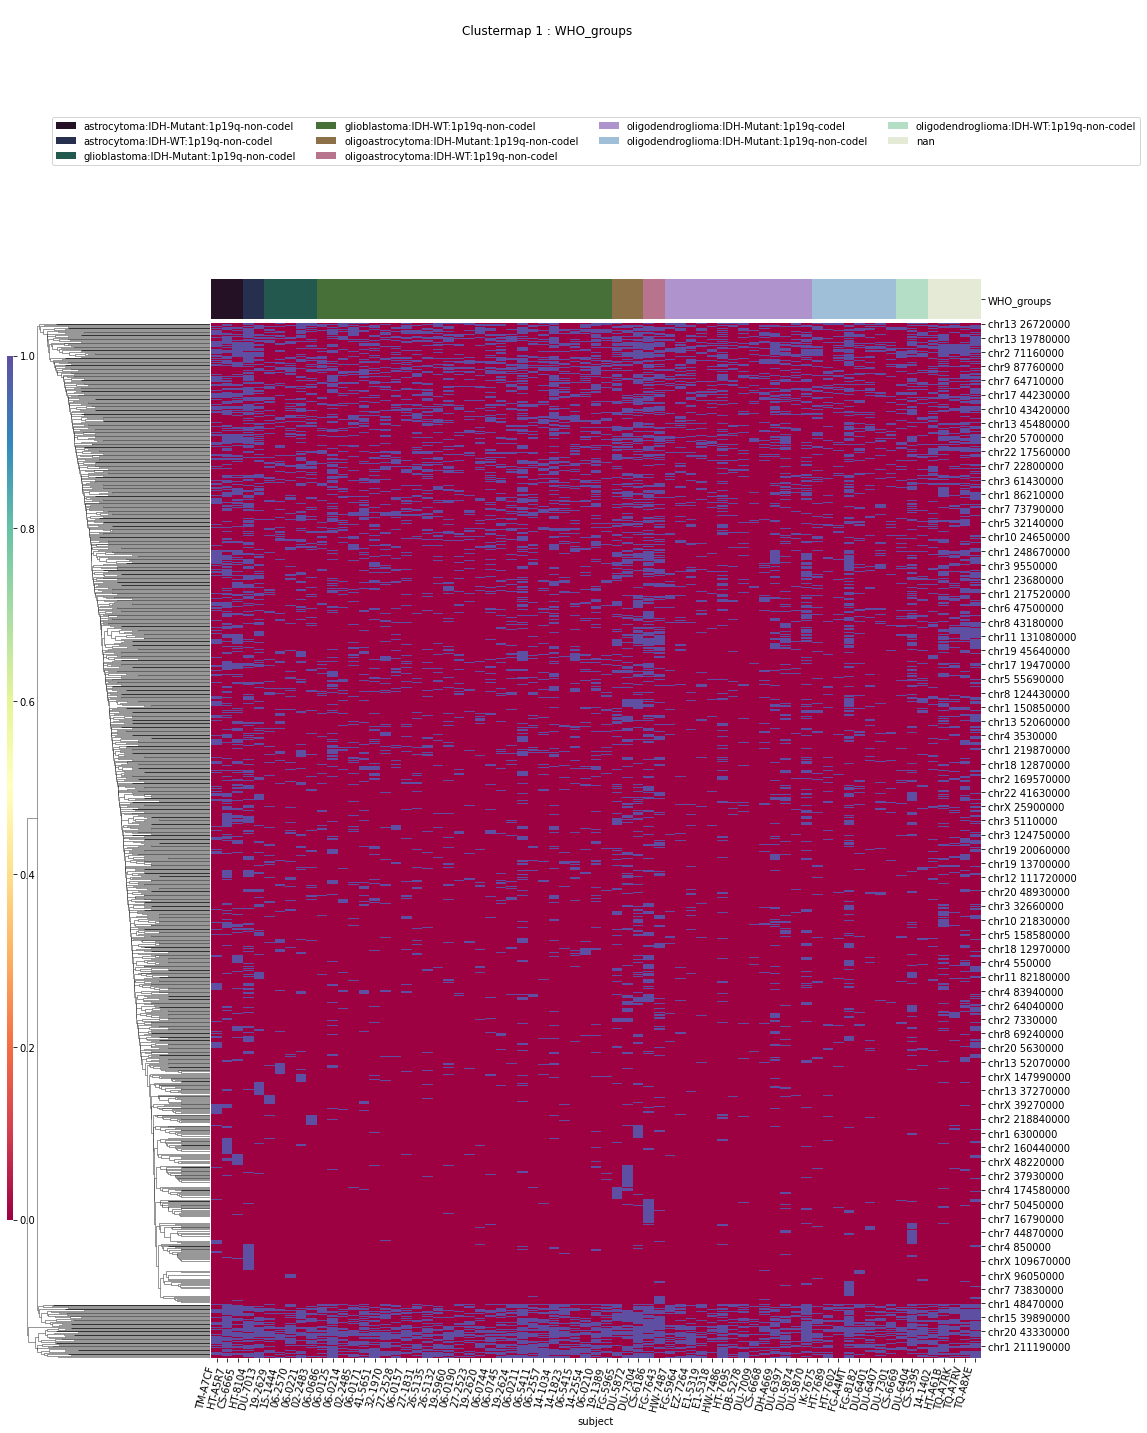

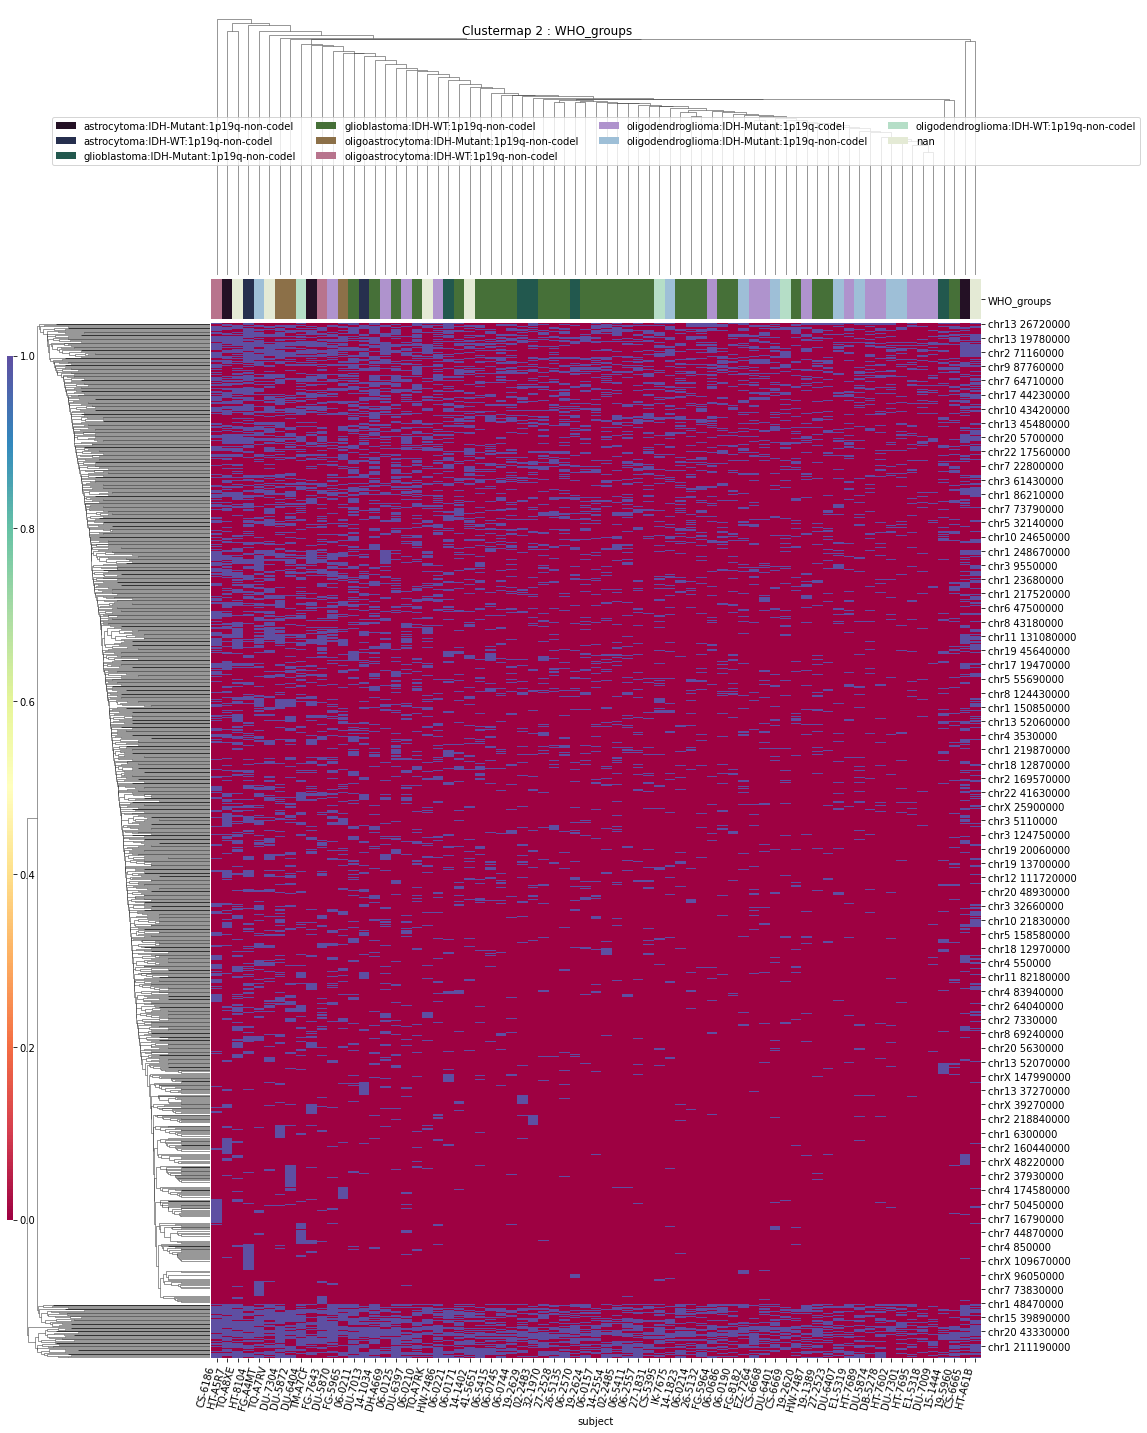

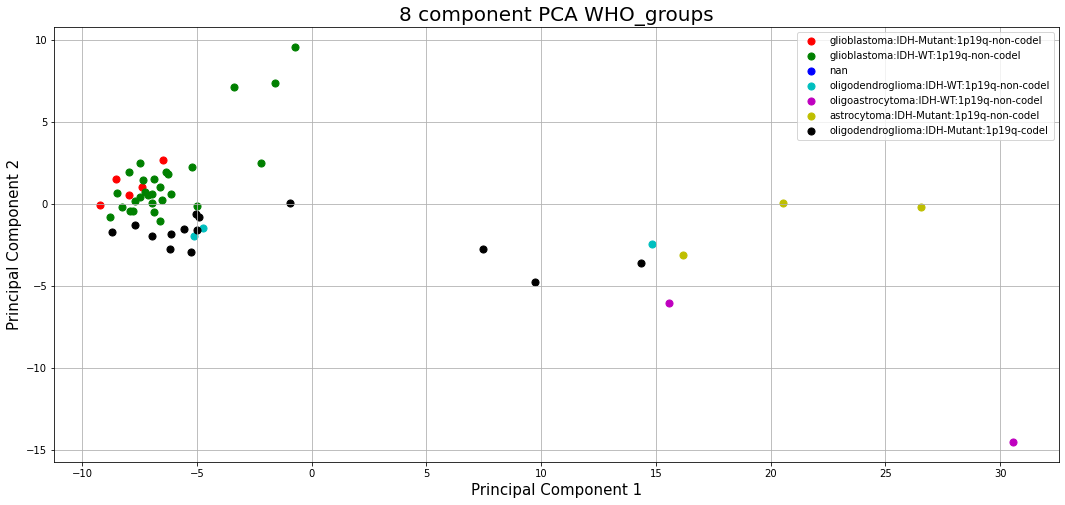

Triple_group
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['Triple_group' 'chr1 10020000' 'chr1 108160000' 'chr1 108490000'
 'chr1 108670000' 'chr1 112640000' 'chr1 114790000' 'chr1 114800000'
 'chr1 117300000' 'chr1 12000000' 'chr1 12040000' 'chr1 12900000'
 'chr1 150780000' 'chr1 150850000' 'chr1 151650000' 'chr1 151760000'
 'chr1 152140000' 'chr1 152470000' 'chr1 154280000' 'chr1 156320000'
 'chr1 160930000' 'chr1 161280000' 'chr1 162460000' 'chr1 168200000'
 'chr1 182440000' 'chr1 182510000' 'chr1 182740000' 'chr1 197400000'
 'chr1 206060000' 'chr1 208650000' 'chr1 209120000' 'chr1 21020000'
 'chr1 211190000' 'chr1 213150000' 'chr1 21380000' 'chr1 22150000'
 'chr1 224100000' 'chr1 227130000' 'chr1 231120000' 'chr1 23500000'
 'chr1 23930000' 'chr1 245770000' 'chr1 247210000' 'chr1 24790000'
 'chr1 24800000' 'chr1 248670000' 'chr1 248820000' 'chr1 248910000'
 'chr1 27290000' 'chr1 27850000' 'chr1 32800000' 'chr1 33510000'
 'chr1 37070000' 'chr1 38640000' 'chr1 39990000' 'chr1 43500000'
 'chr1 45490000' 'chr1 48170

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


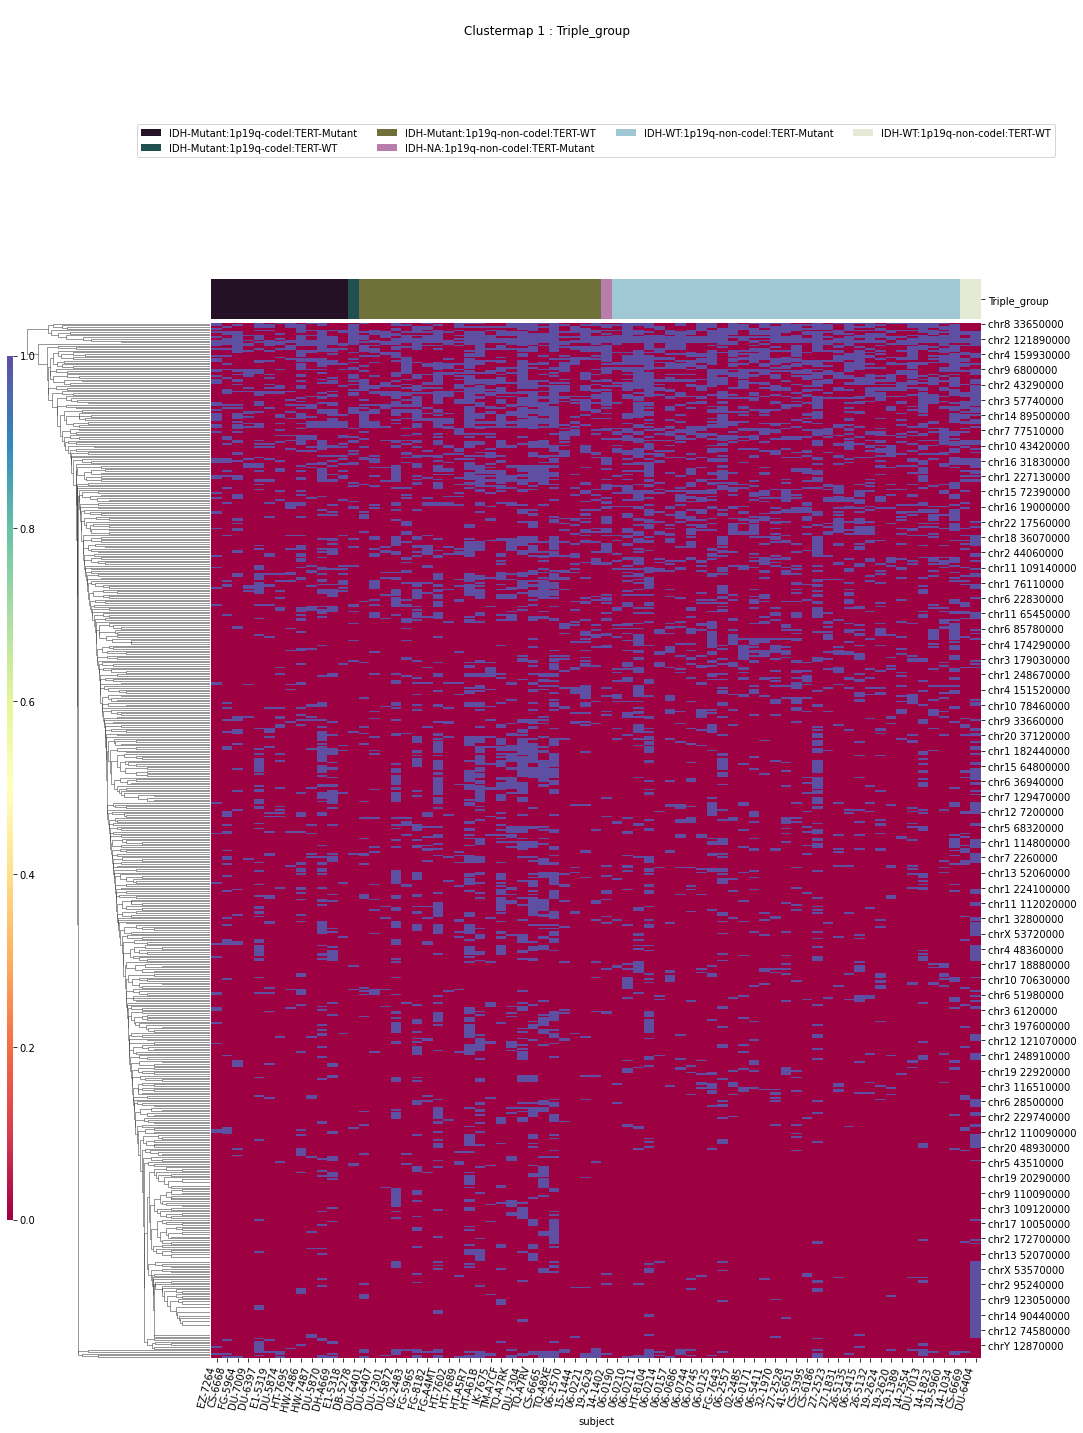

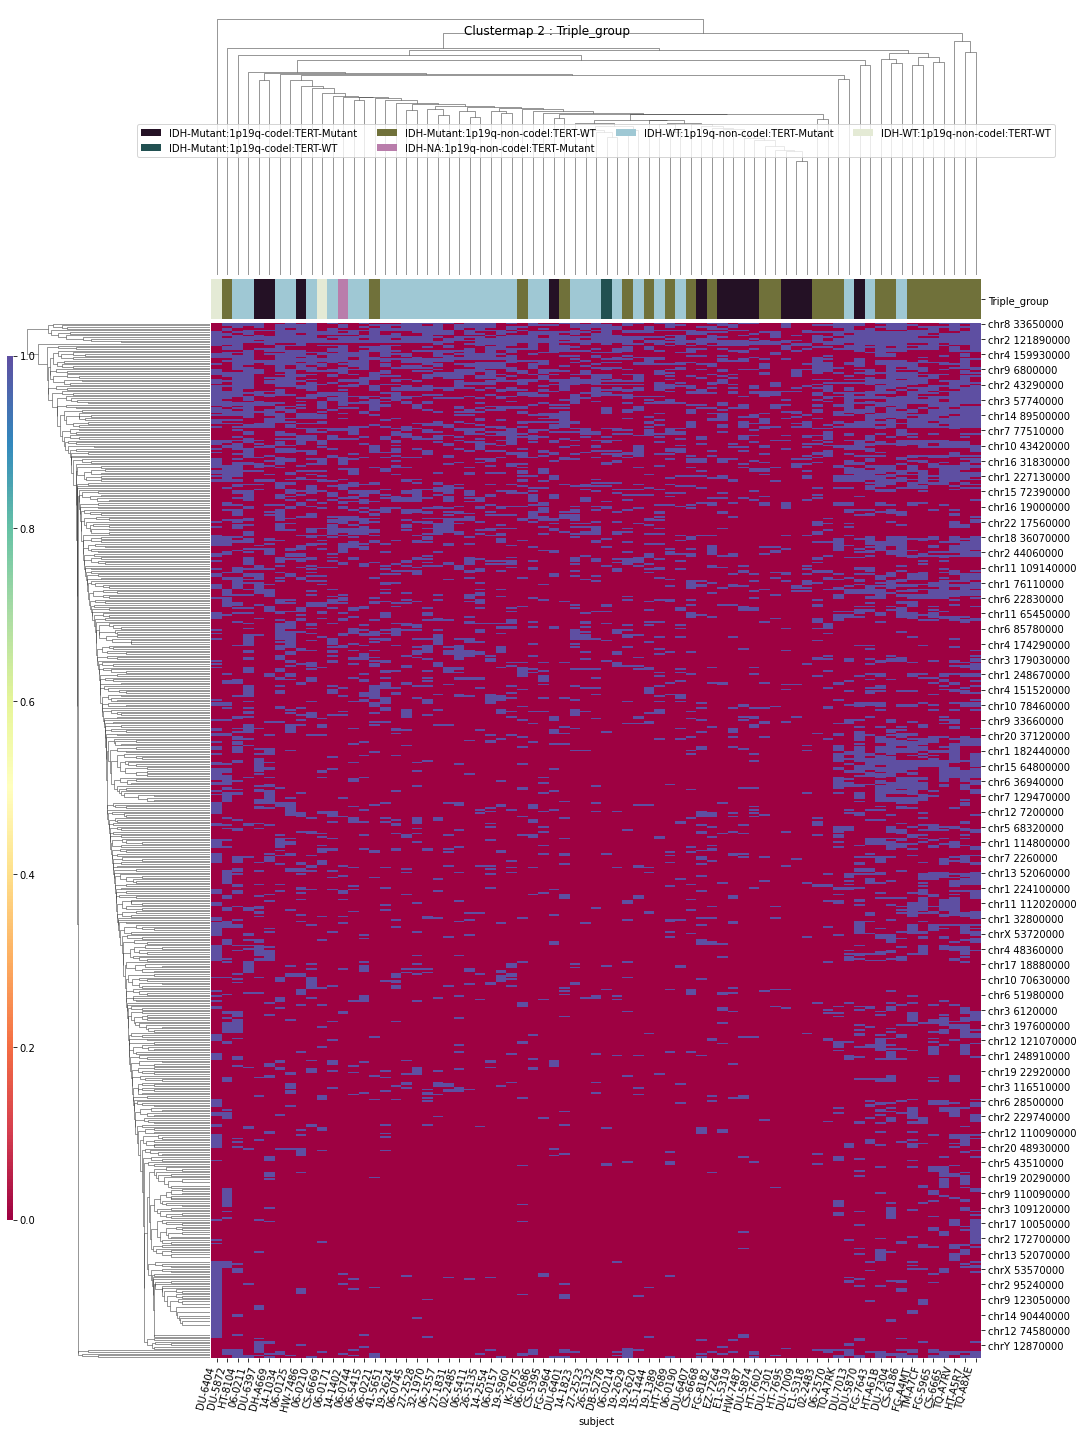

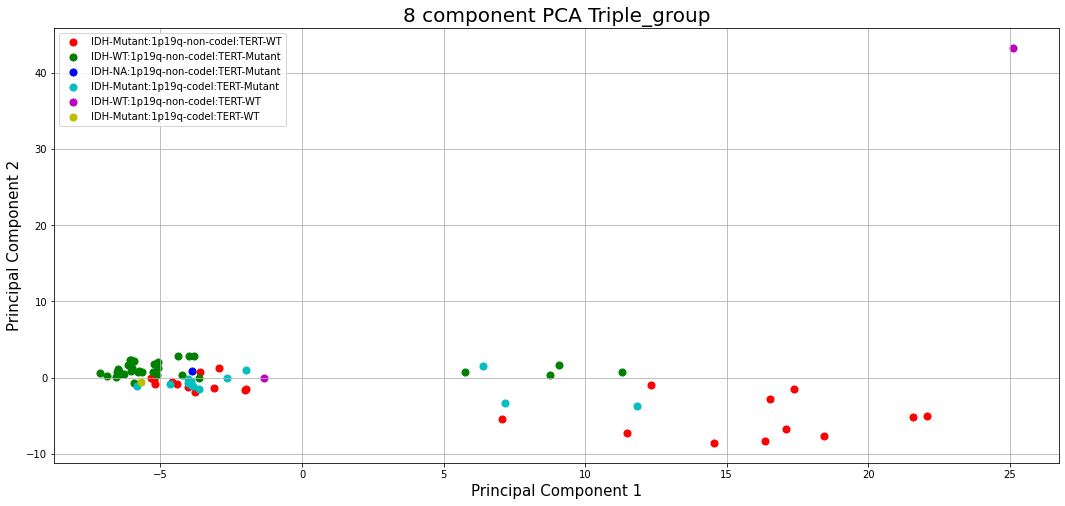

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr1 108160000' 'chr1 152140000' 'chr1 161280000'
 'chr1 173610000' 'chr1 197400000' 'chr1 206060000' 'chr1 211190000'
 'chr1 21380000' 'chr1 231120000' 'chr1 24800000' 'chr1 248670000'
 'chr1 96460000' 'chr10 100090000' 'chr10 104780000' 'chr10 17620000'
 'chr10 69990000' 'chr10 9270000' 'chr10 97840000' 'chr11 124700000'
 'chr11 56140000' 'chr11 56490000' 'chr11 86770000' 'chr12 119350000'
 'chr12 122350000' 'chr12 14350000' 'chr12 7200000' 'chr12 73850000'
 'chr12 95900000' 'chr13 19780000' 'chr13 24970000' 'chr13 95840000'
 'chr14 102410000' 'chr14 102670000' 'chr14 57330000' 'chr14 58580000'
 'chr14 77410000' 'chr14 90440000' 'chr15 100770000' 'chr15 43010000'
 'chr15 50150000' 'chr15 60360000' 'chr15 72390000' 'chr16 2800000'
 'chr16 30170000' 'chr16 47000000' 'chr16 48950000' 'chr17 16140000'
 'chr17 18290000' 'chr17 19680000' 'chr17 22740000' 'chr17 3460000'
 'chr17 46070000' 'chr17 63450000' 'chr18 12970000' 'chr18 21590000'
 

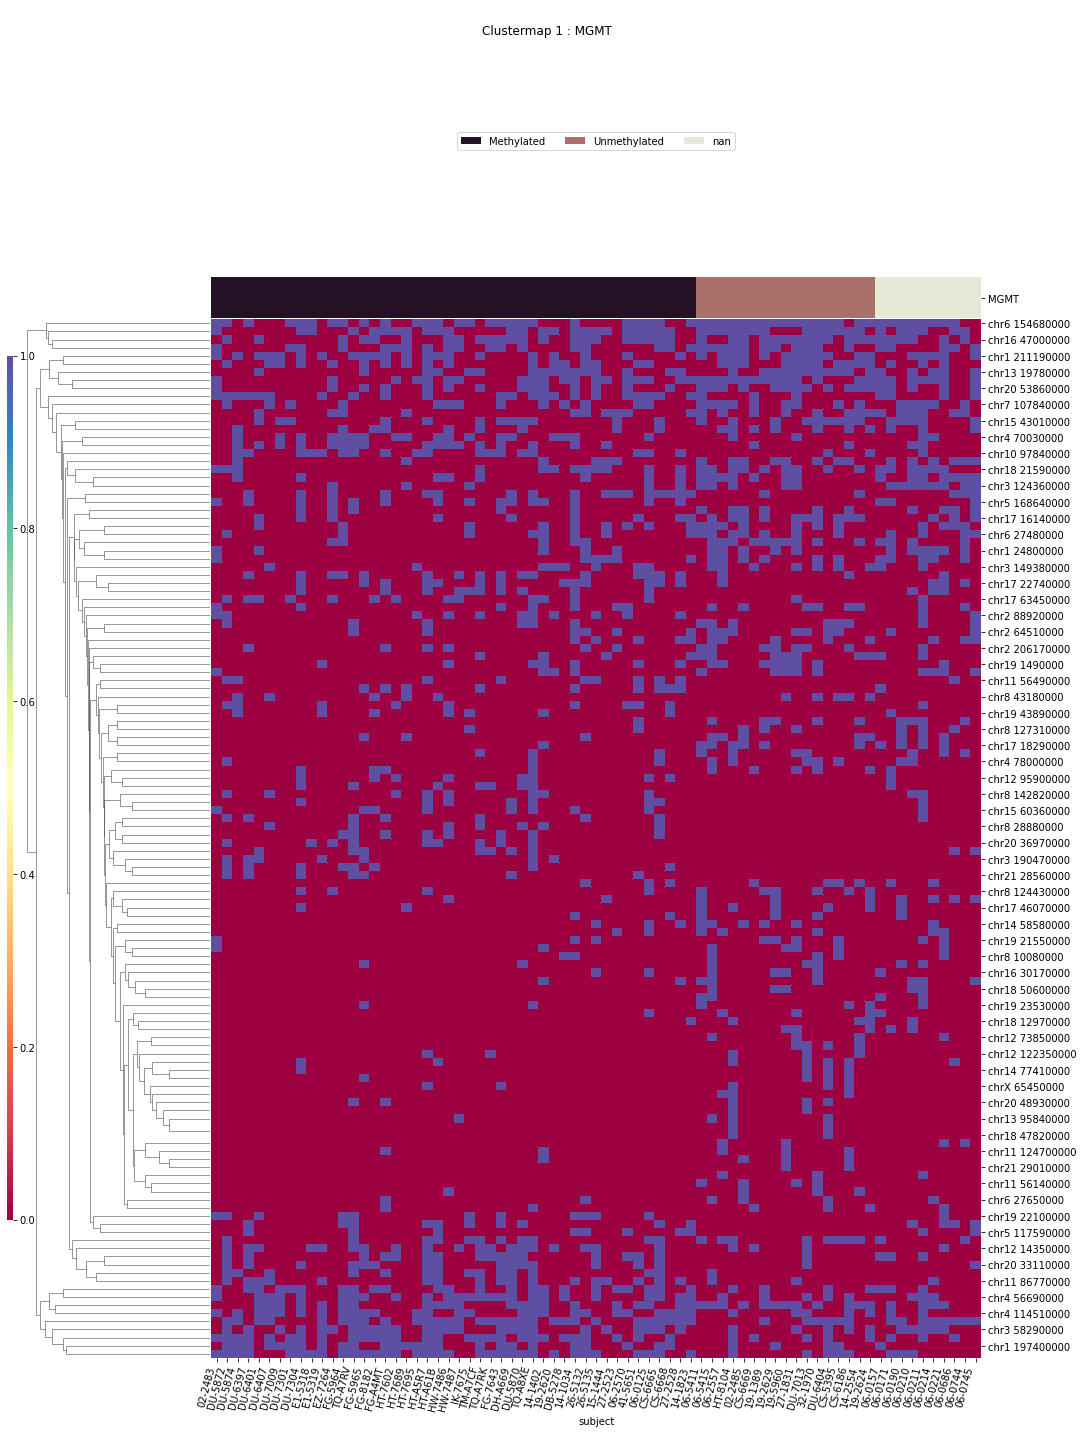

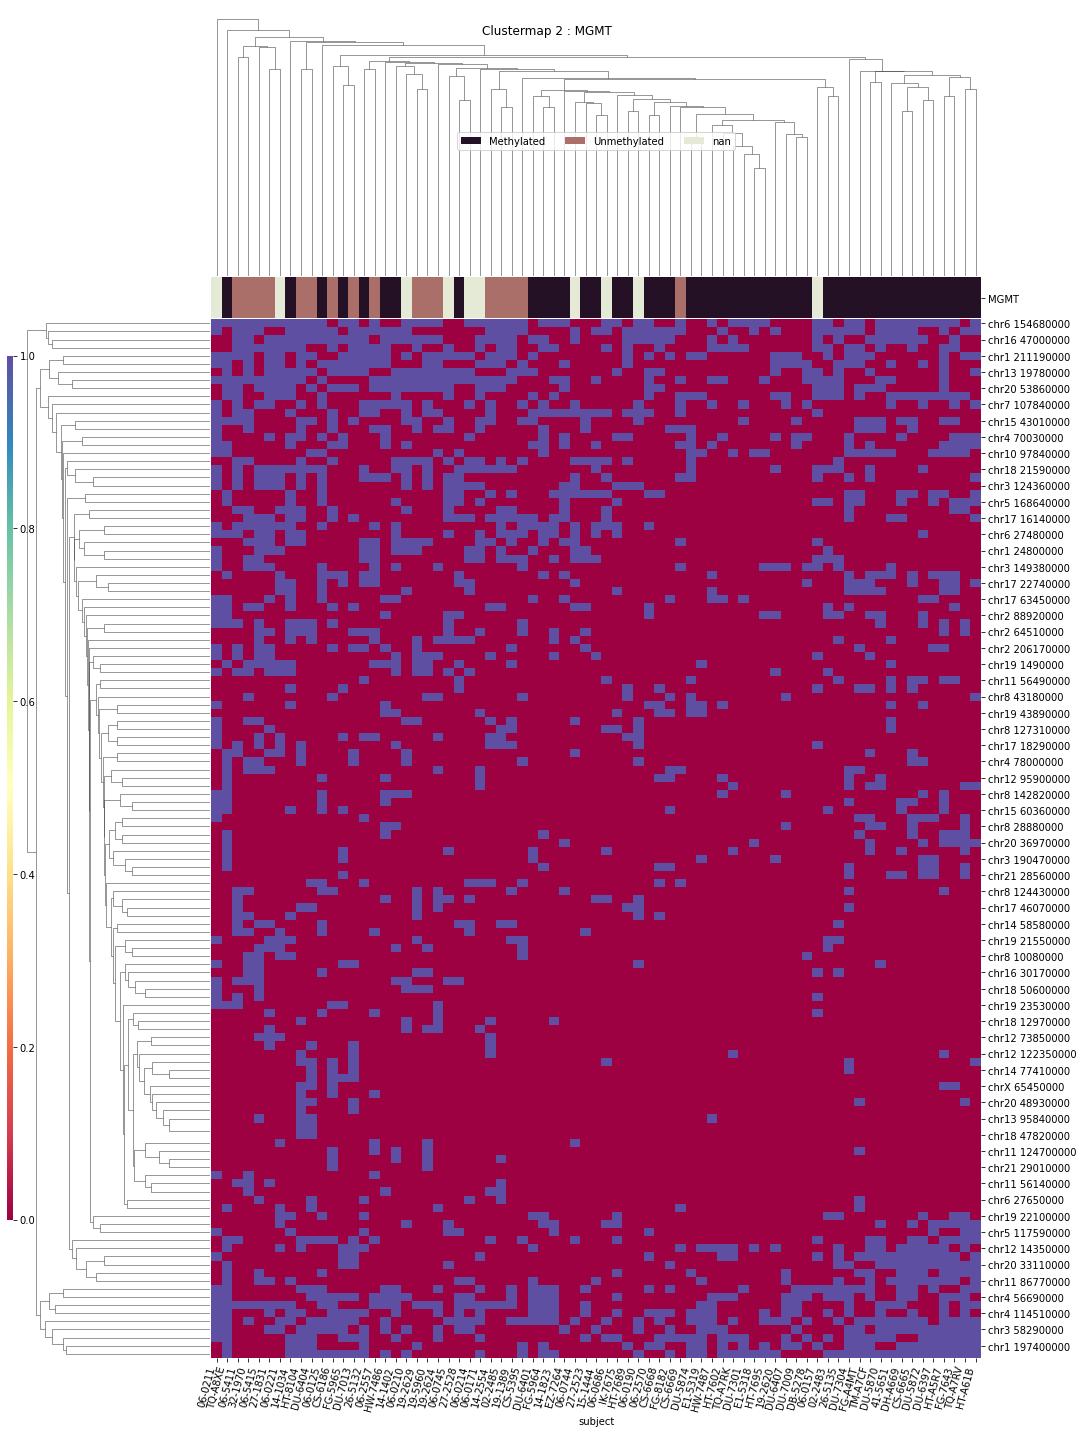

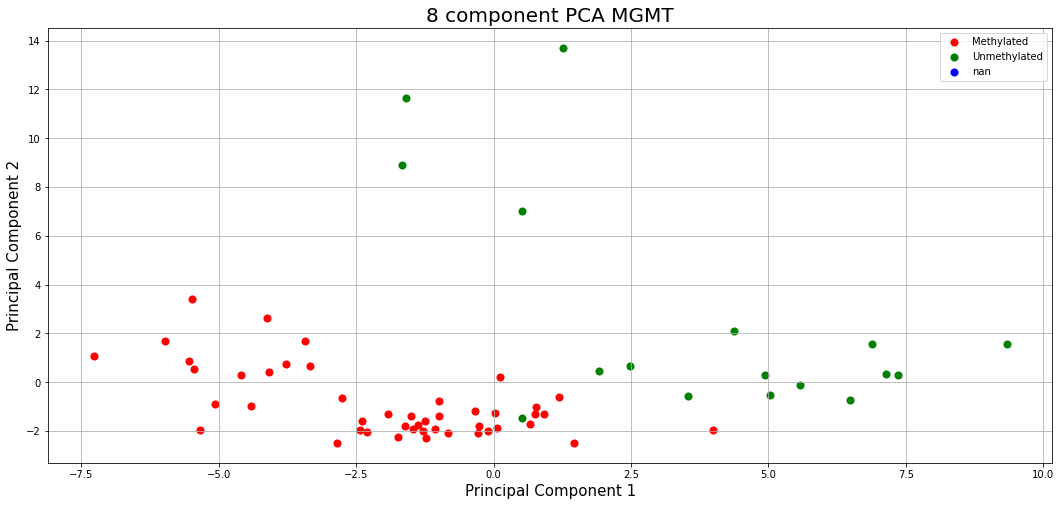

In [110]:
for column in ['primary_diagnosis','IDH','x1p19q','TERT','disease_type',
               'IDH_1p19q_status','WHO_groups','Triple_group','MGMT']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [111]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210601 18:01:15'

primary_diagnosis
T-Testing
Boxplotting
Clustermapping
['chr1 108160000' 'chr1 108490000' 'chr1 108670000' 'chr1 113060000'
 'chr1 114790000' 'chr1 114800000' 'chr1 117300000' 'chr1 12000000'
 'chr1 12900000' 'chr1 13390000' 'chr1 143700000' 'chr1 145760000'
 'chr1 147060000' 'chr1 147230000' 'chr1 150850000' 'chr1 151770000'
 'chr1 153570000' 'chr1 156320000' 'chr1 160930000' 'chr1 161280000'
 'chr1 161610000' 'chr1 162460000' 'chr1 167030000' 'chr1 168200000'
 'chr1 168830000' 'chr1 179040000' 'chr1 182440000' 'chr1 182510000'
 'chr1 182740000' 'chr1 189130000' 'chr1 189220000' 'chr1 197400000'
 'chr1 209120000' 'chr1 21020000' 'chr1 211460000' 'chr1 213150000'
 'chr1 219540000' 'chr1 22150000' 'chr1 222480000' 'chr1 227130000'
 'chr1 231120000' 'chr1 23250000' 'chr1 234260000' 'chr1 23500000'
 'chr1 236380000' 'chr1 237660000' 'chr1 237670000' 'chr1 23930000'
 'chr1 245770000' 'chr1 247210000' 'chr1 24790000' 'chr1 24800000'
 'chr1 248670000' 'chr1 248820000' 'chr1 26590000' 'chr1 2

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


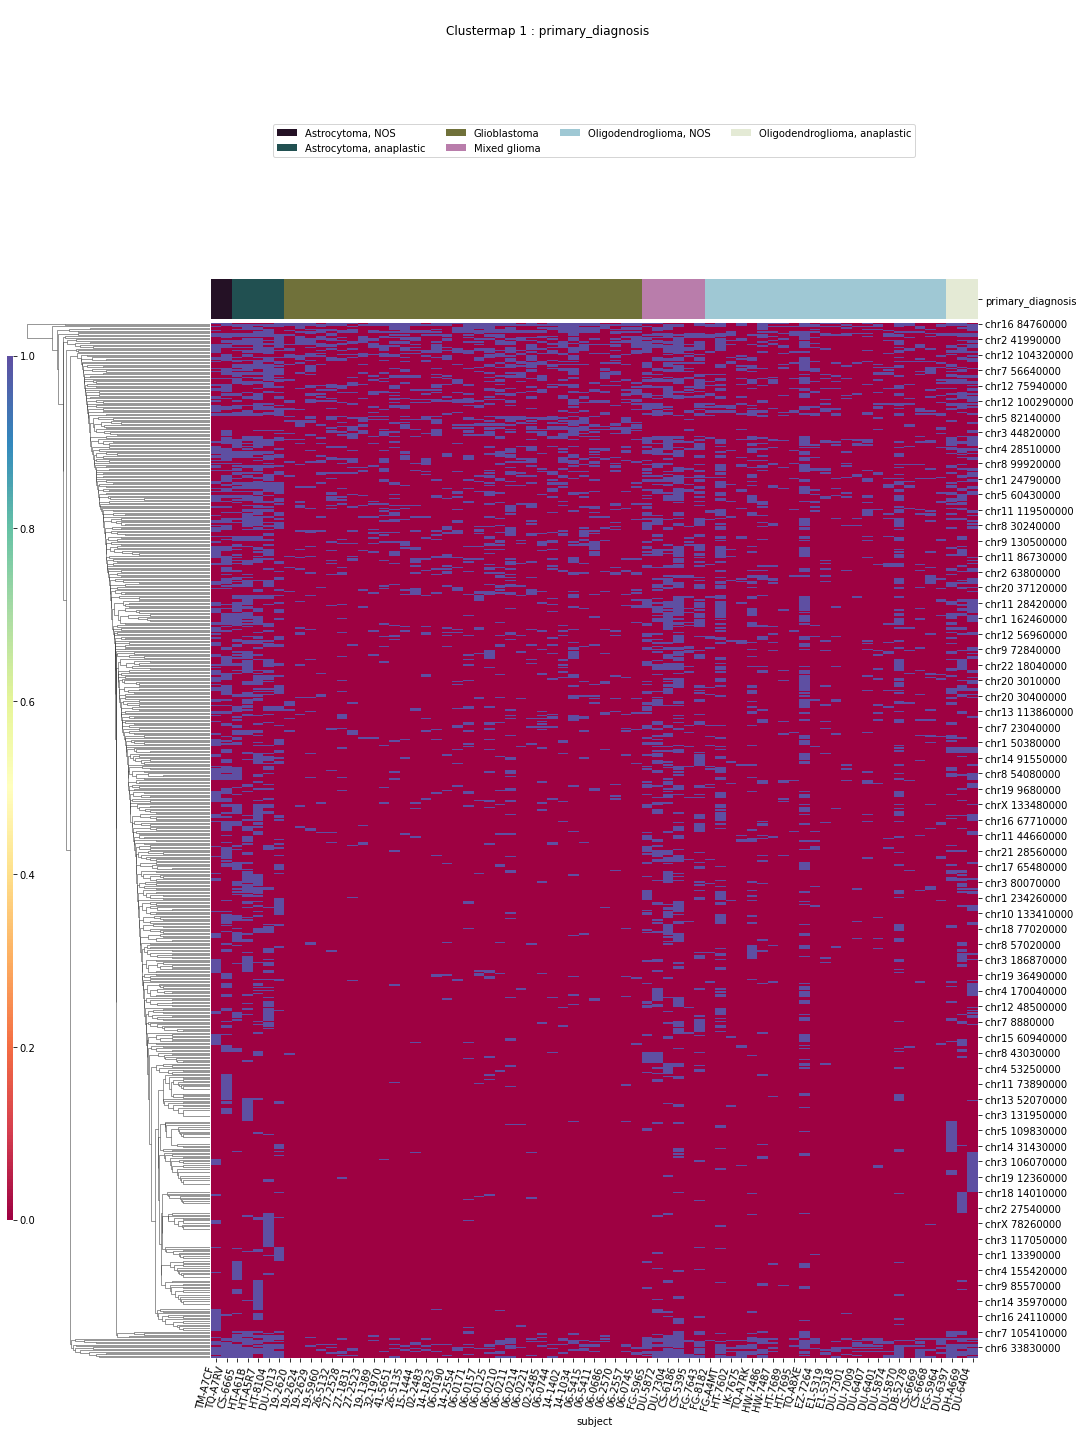

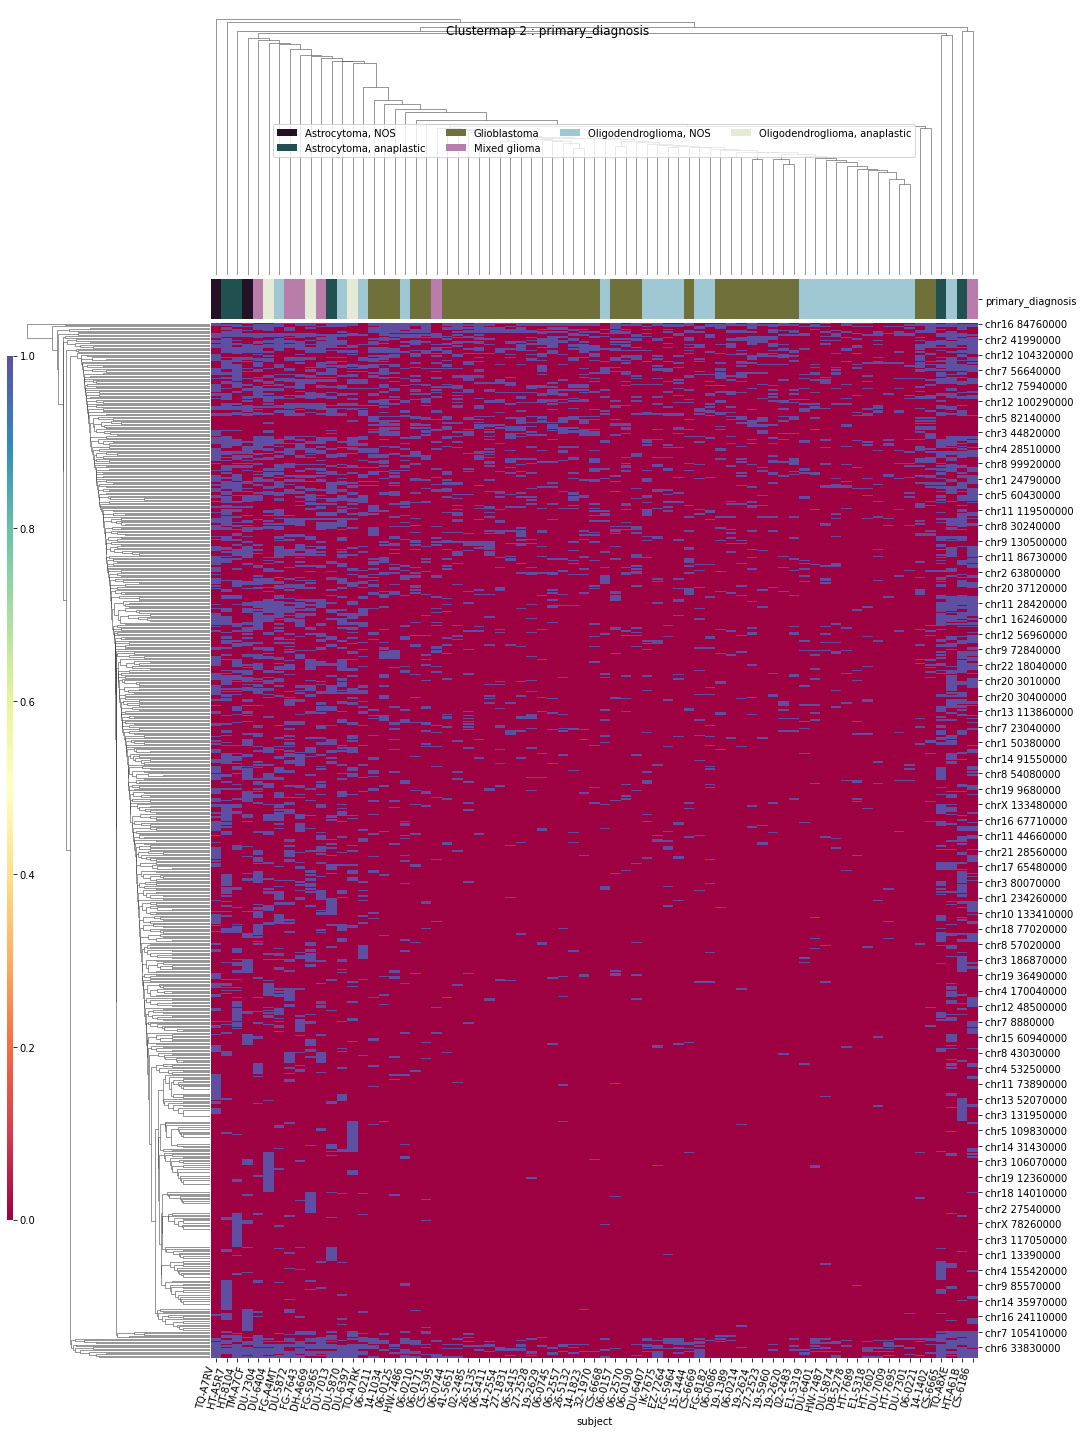

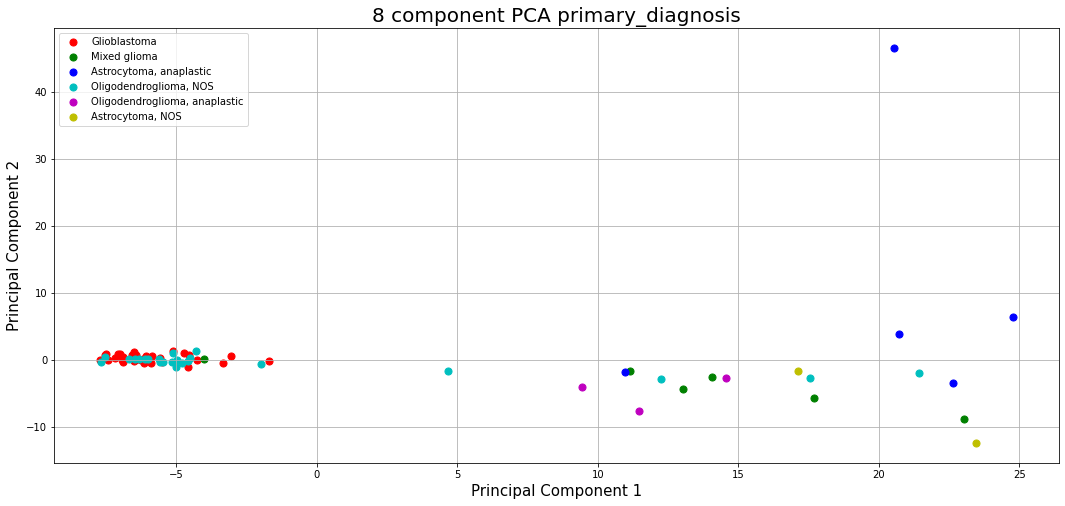

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 114790000' 'chr1 152140000' 'chr1 197400000' 'chr1 21380000'
 'chr1 231120000' 'chr1 45490000' 'chr1 54230000' 'chr1 7950000'
 'chr10 118260000' 'chr10 17620000' 'chr12 100290000' 'chr12 14350000'
 'chr12 7200000' 'chr13 35960000' 'chr13 51070000' 'chr14 102410000'
 'chr14 58580000' 'chr14 63520000' 'chr15 72390000' 'chr17 16140000'
 'chr17 18290000' 'chr18 21590000' 'chr2 238070000' 'chr2 61380000'
 'chr2 64510000' 'chr2 71160000' 'chr3 103530000' 'chr3 124360000'
 'chr3 128810000' 'chr3 149380000' 'chr3 44820000' 'chr4 157630000'
 'chr4 159930000' 'chr4 174290000' 'chr5 82140000' 'chr6 27820000'
 'chr6 34390000' 'chr6 73660000' 'chr7 107840000' 'chr7 28830000'
 'chr7 77510000' 'chr8 128820000' 'chr9 72800000' 'chr9 74920000'
 'subject']


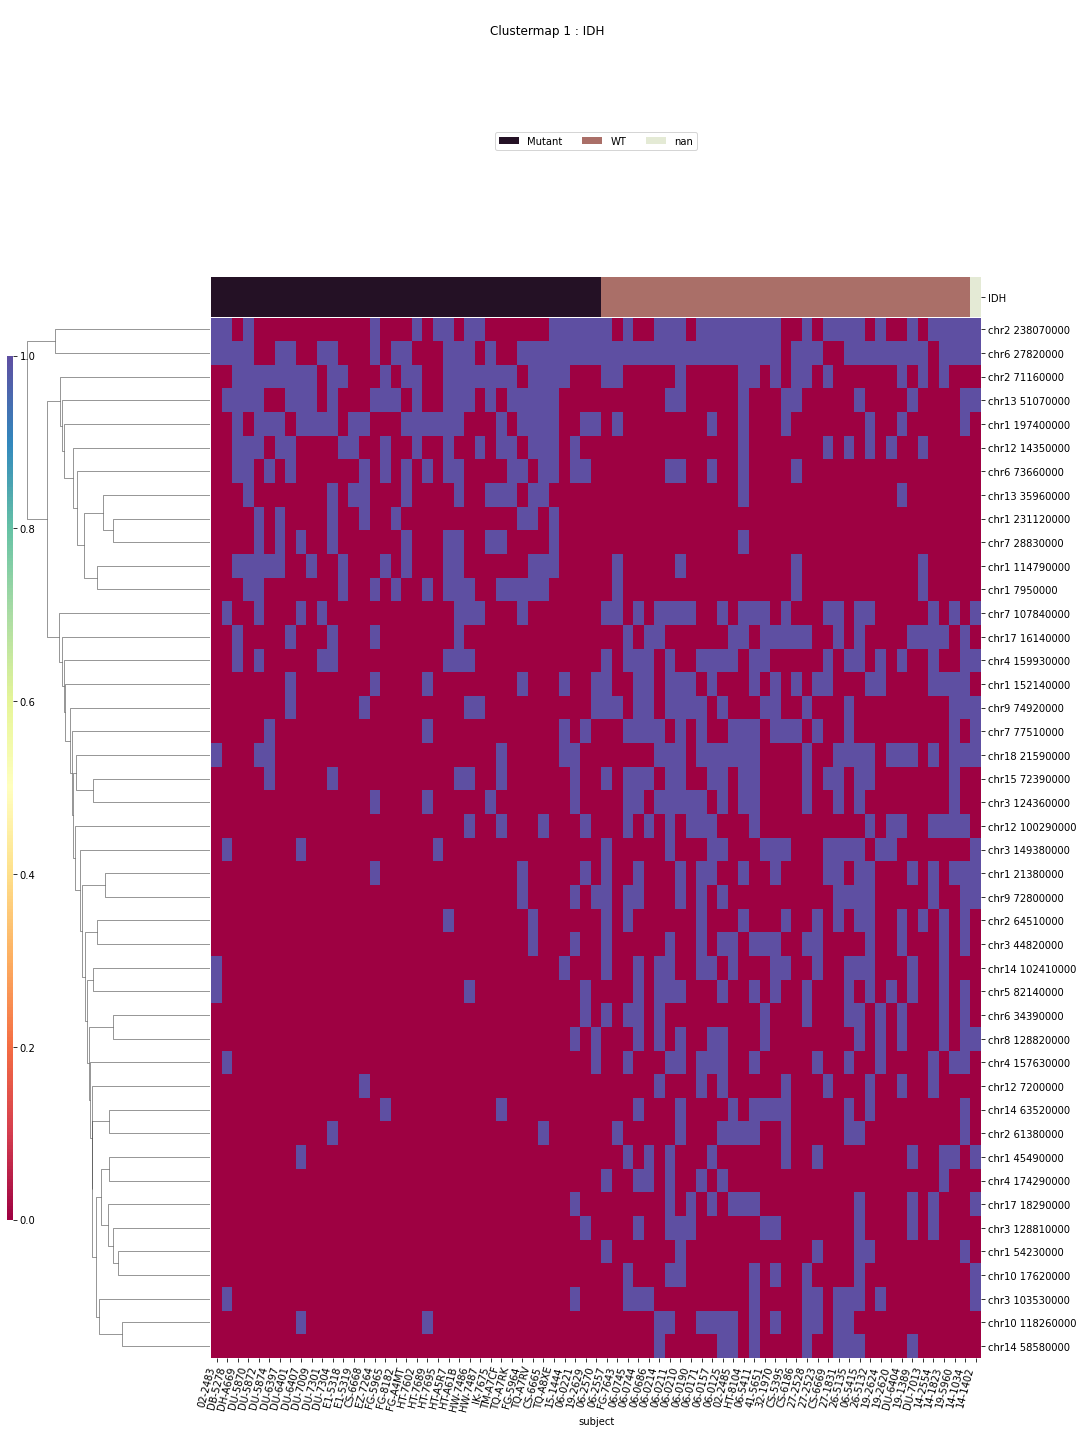

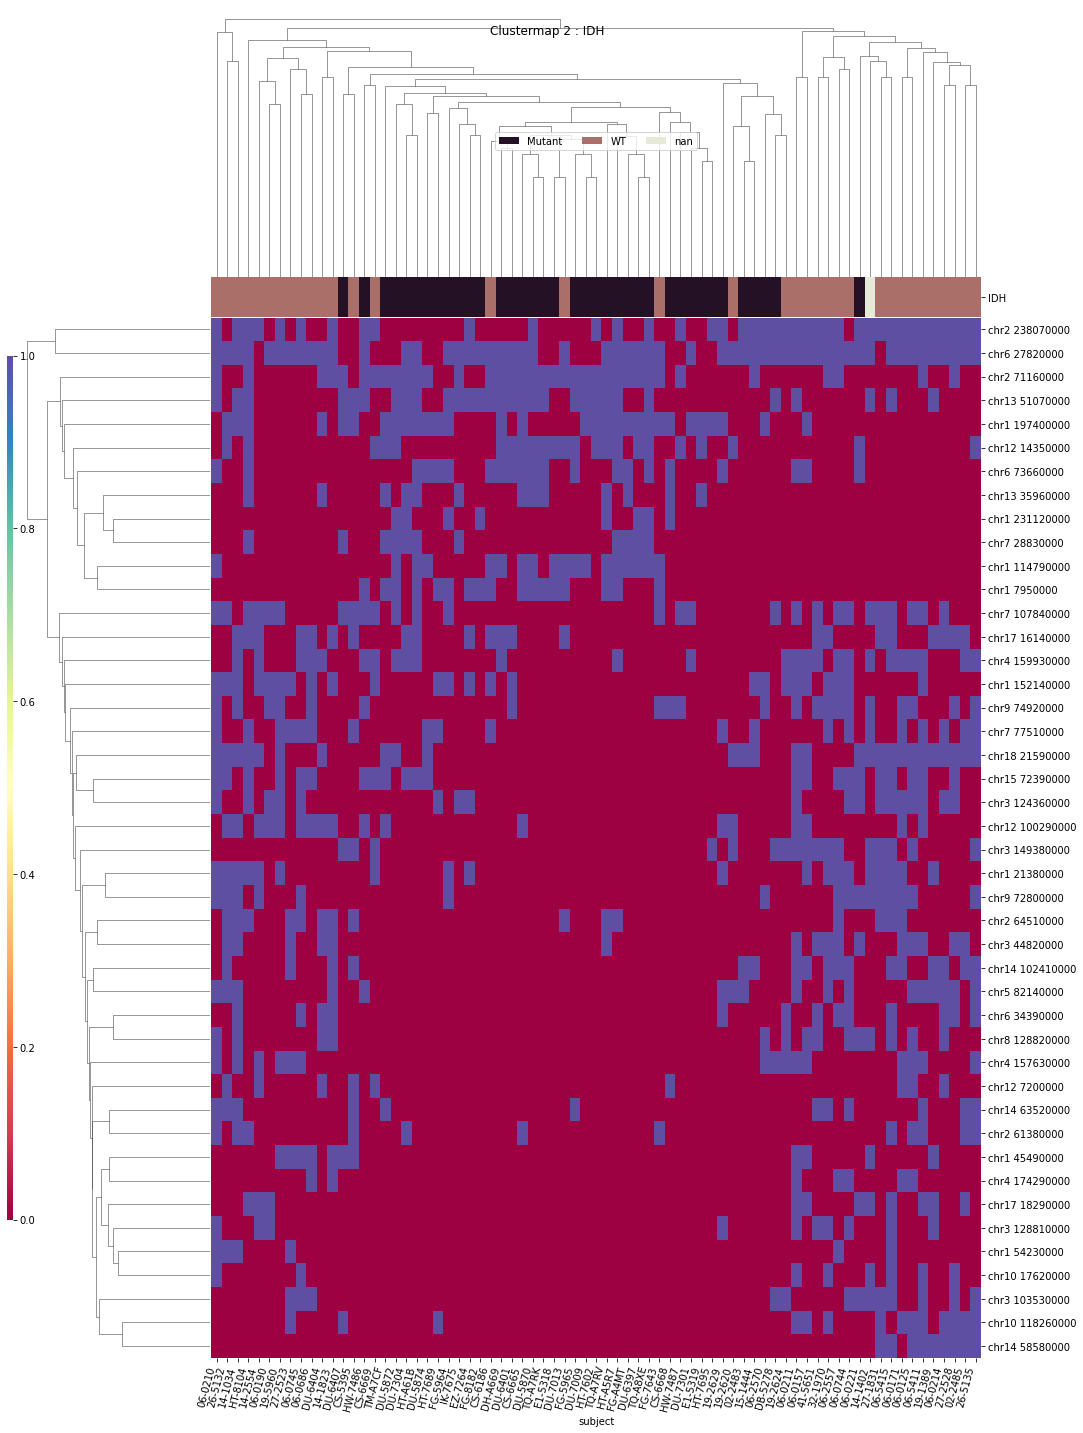

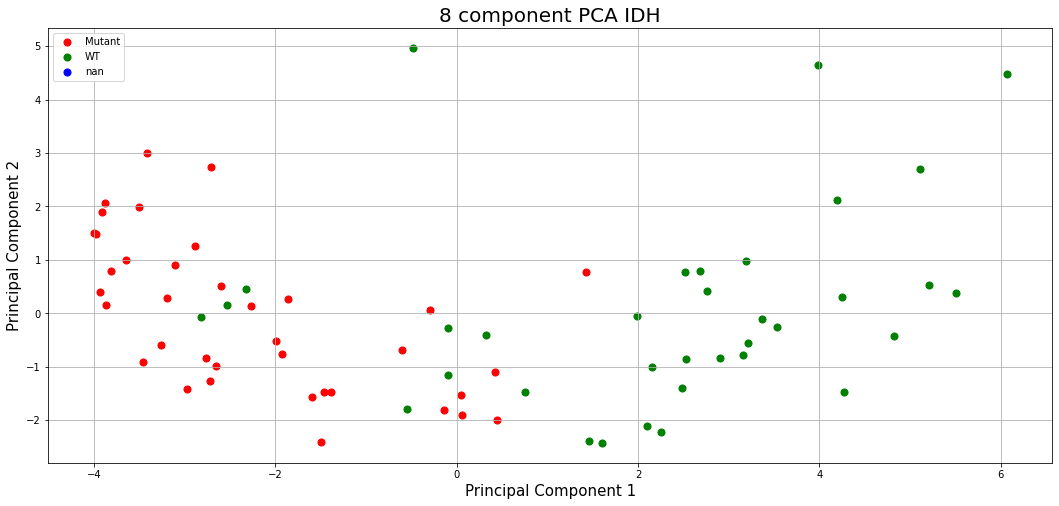

x1p19q
T-Testing
Boxplotting
Clustermapping
['chr1 12040000' 'chr10 42130000' 'chr11 73570000' 'chr18 21590000'
 'chr2 41990000' 'chr20 4030000' 'chr3 150820000' 'chr3 48050000'
 'chr4 76910000' 'chr5 135400000' 'chr6 112520000' 'chrX 55740000'
 'subject' 'x1p19q']


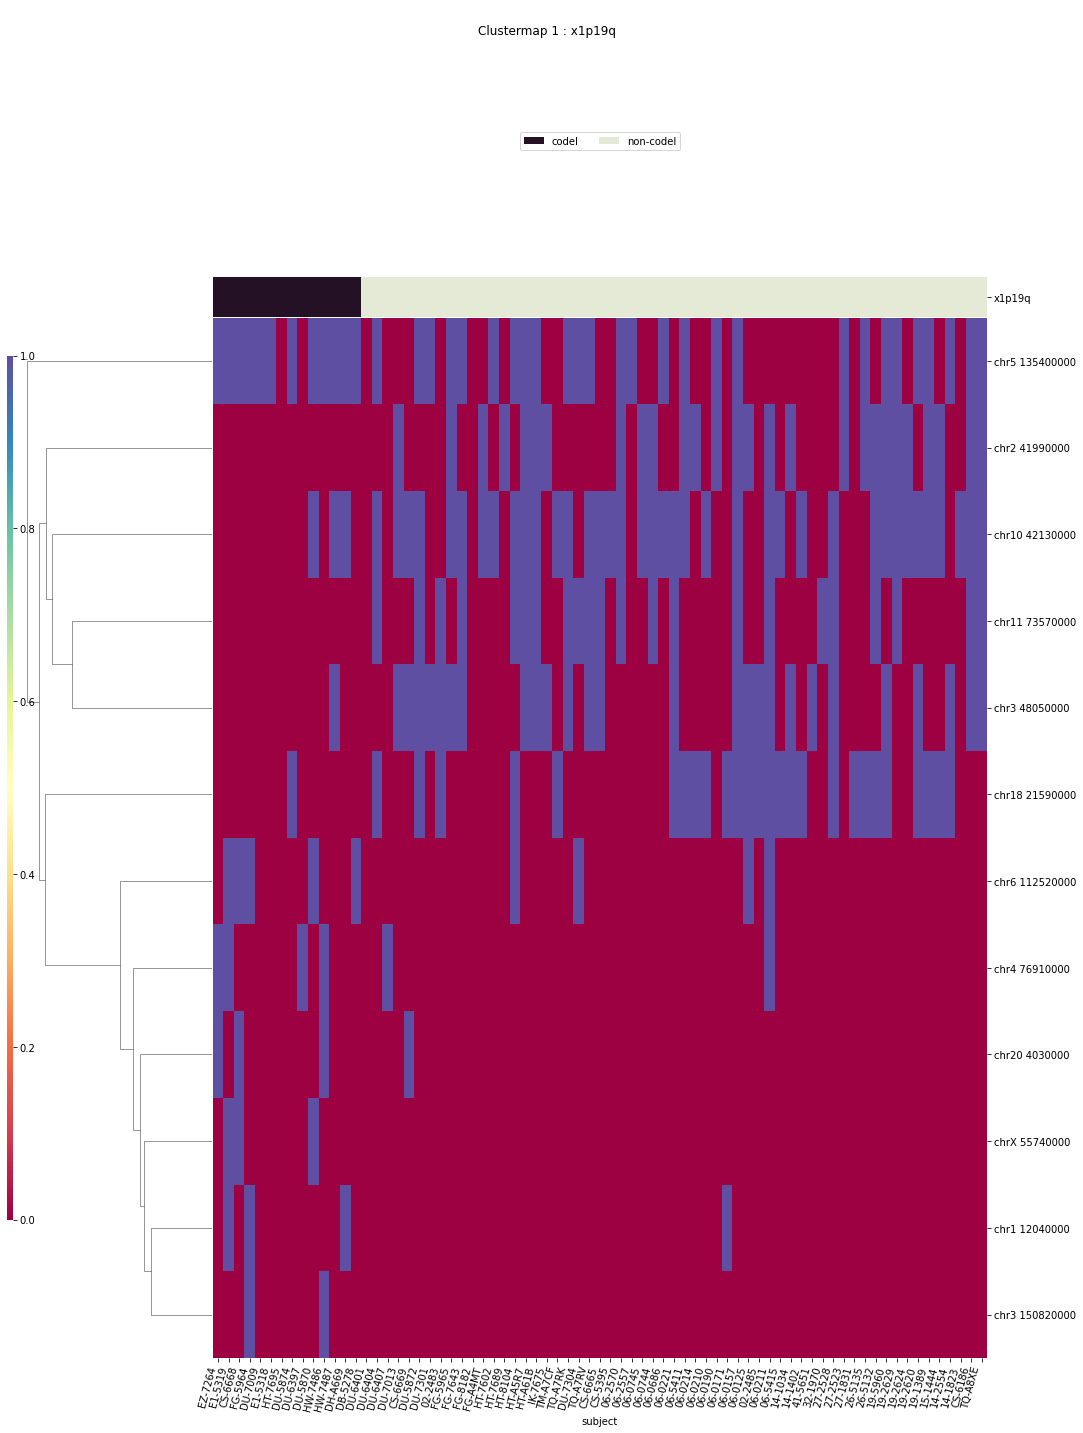

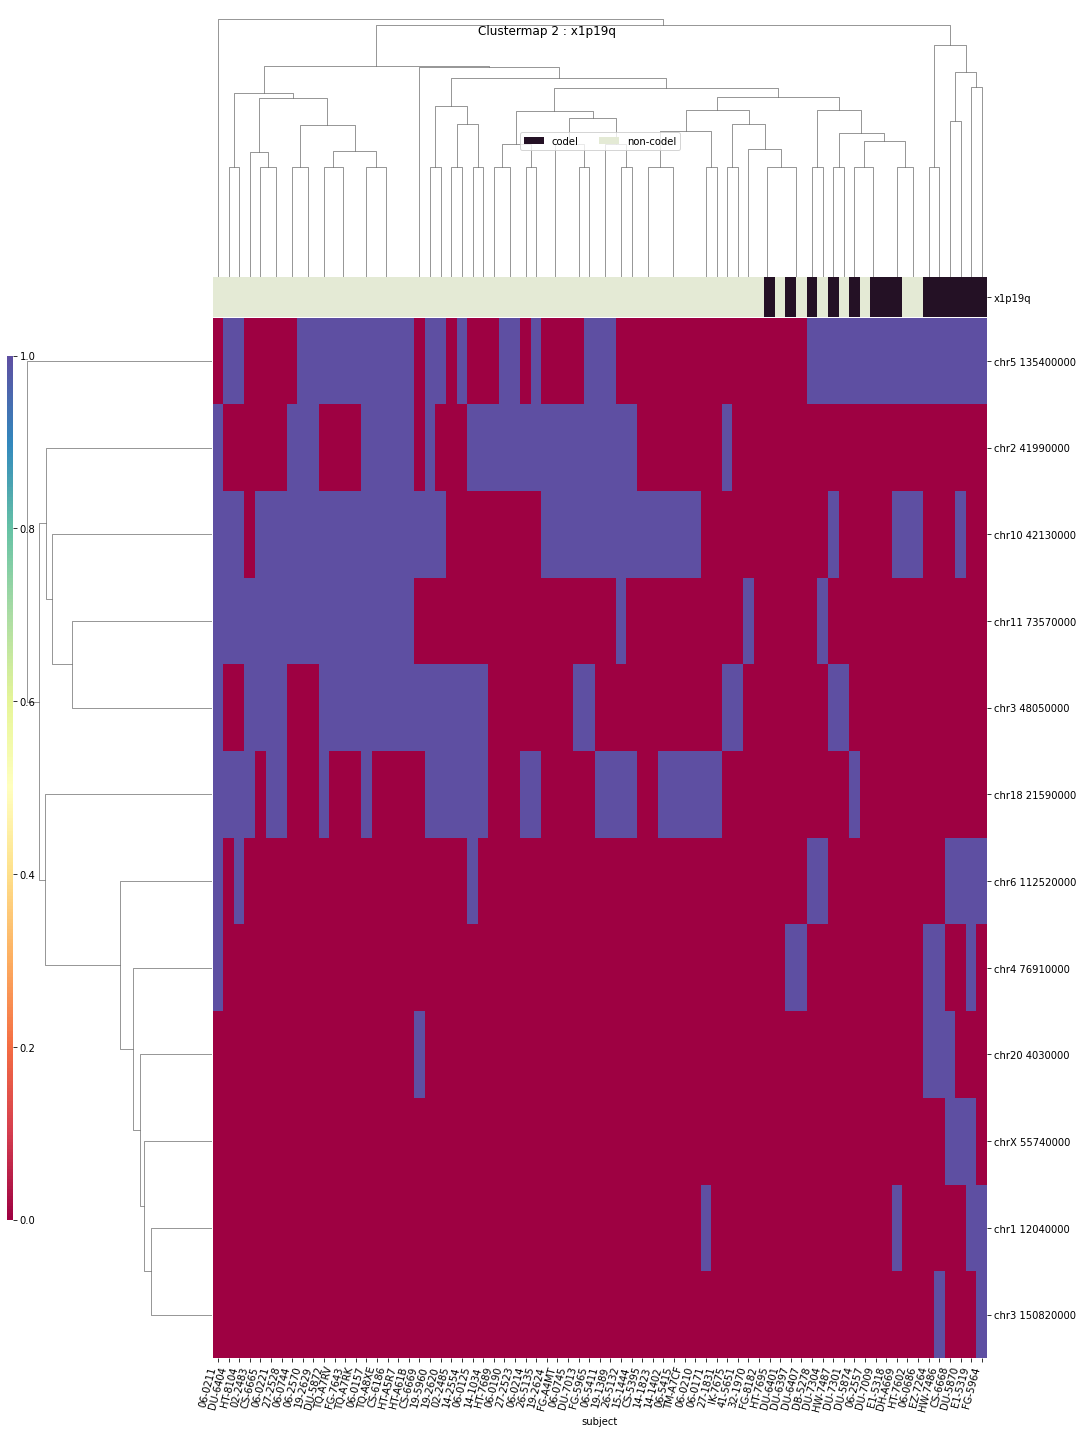

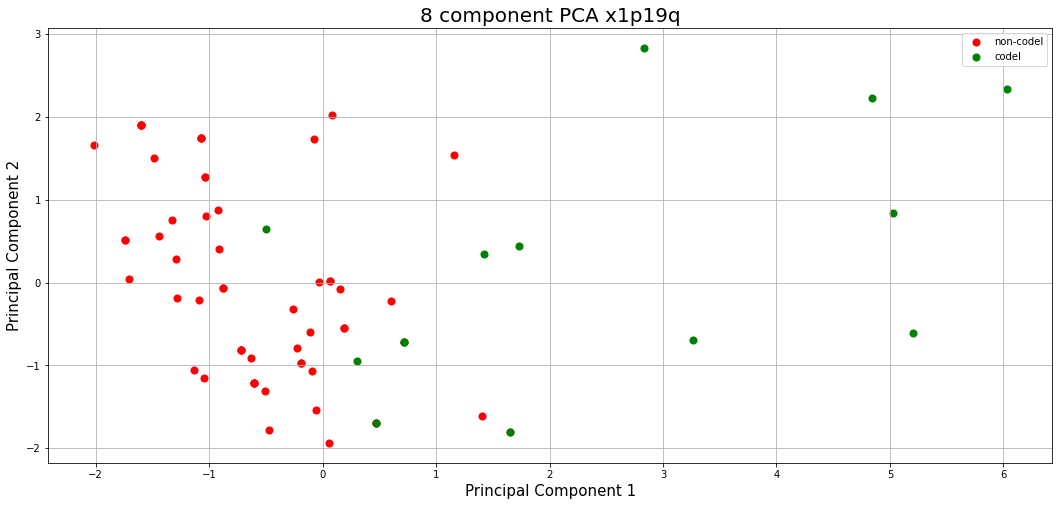

TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr1 156320000' 'chr1 160930000' 'chr1 197400000' 'chr1 21380000'
 'chr1 227130000' 'chr1 245770000' 'chr1 247210000' 'chr1 248670000'
 'chr1 37070000' 'chr1 38640000' 'chr1 71370000' 'chr1 99070000'
 'chr10 9270000' 'chr11 112020000' 'chr11 131080000' 'chr11 28420000'
 'chr11 73570000' 'chr12 120730000' 'chr13 35960000' 'chr15 60940000'
 'chr15 83820000' 'chr17 16140000' 'chr17 2500000' 'chr19 21770000'
 'chr19 36060000' 'chr2 132220000' 'chr2 50820000' 'chr20 31460000'
 'chr20 31470000' 'chr20 47520000' 'chr22 23850000' 'chr22 37780000'
 'chr3 46960000' 'chr3 57740000' 'chr3 61390000' 'chr3 75280000'
 'chr4 174690000' 'chr4 52990000' 'chr4 550000' 'chr4 86990000'
 'chr5 34300000' 'chr5 69510000' 'chr6 158230000' 'chr6 22830000'
 'chr6 43420000' 'chr7 26140000' 'chr7 28830000' 'chr7 65030000'
 'chr9 72840000' 'chr9 74920000' 'subject']


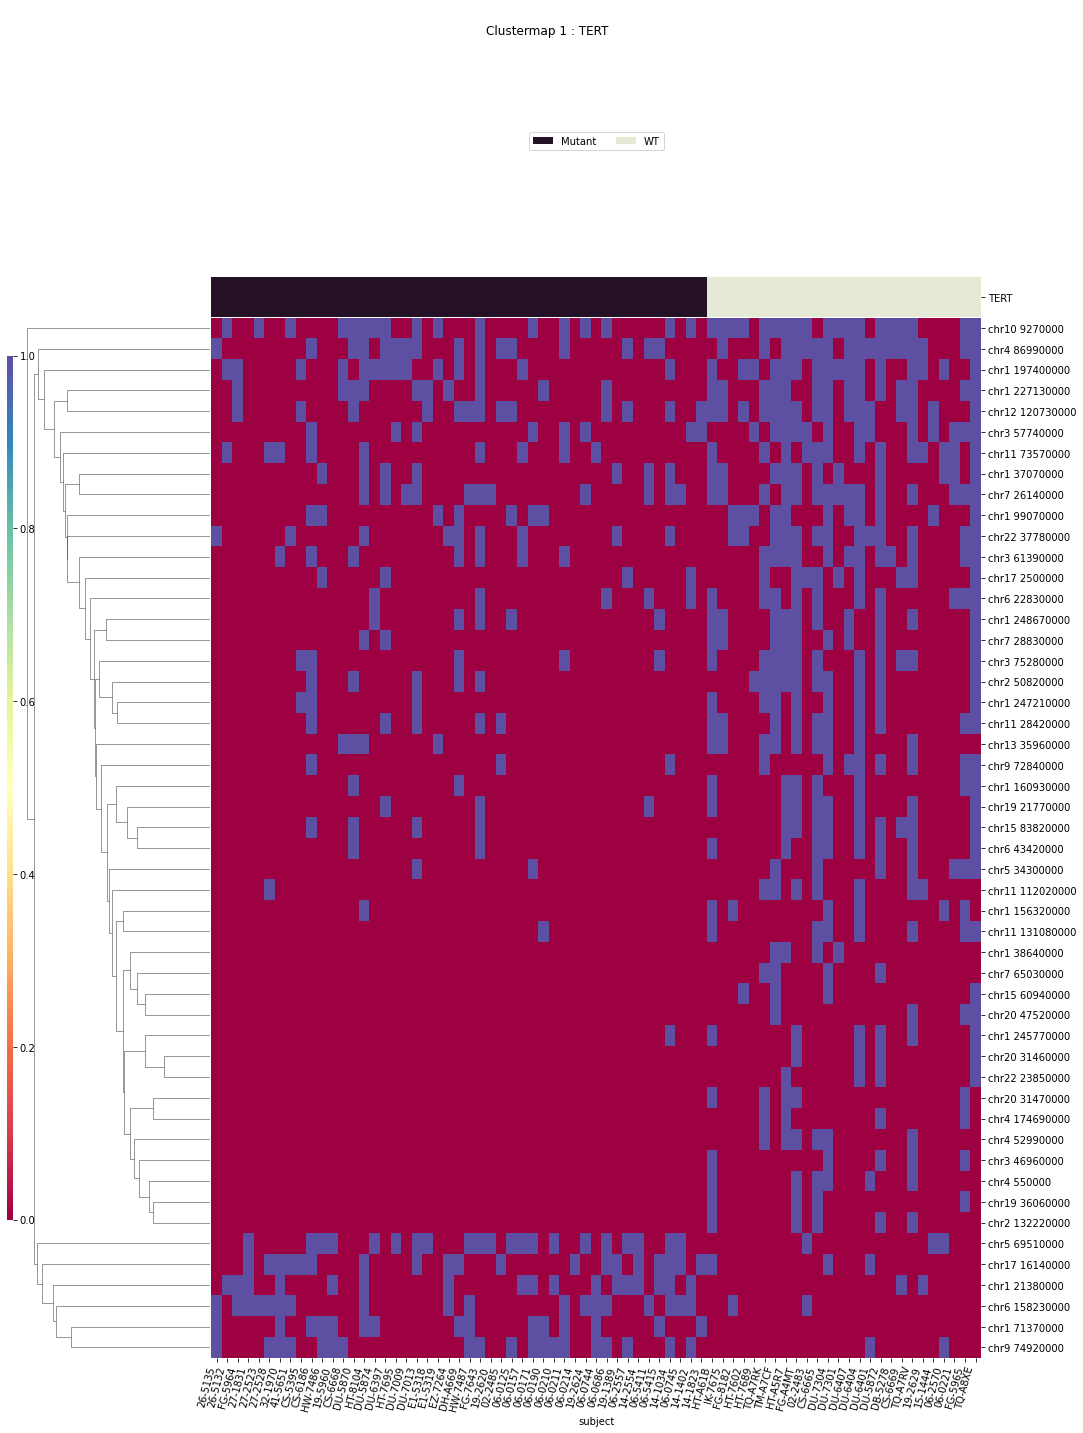

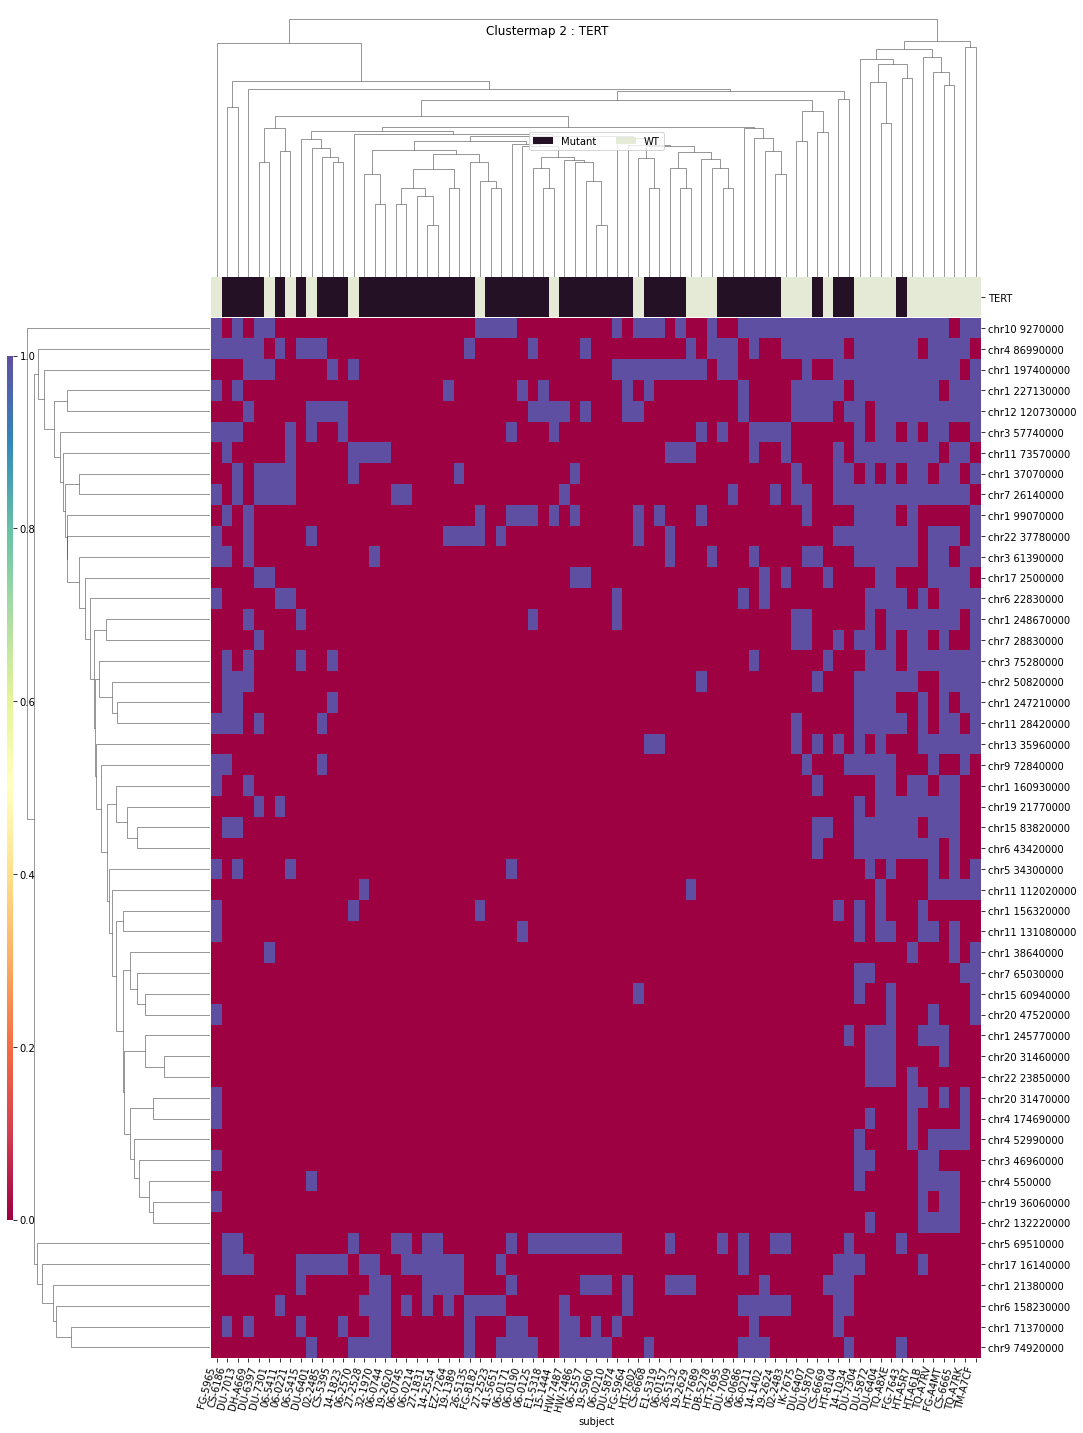

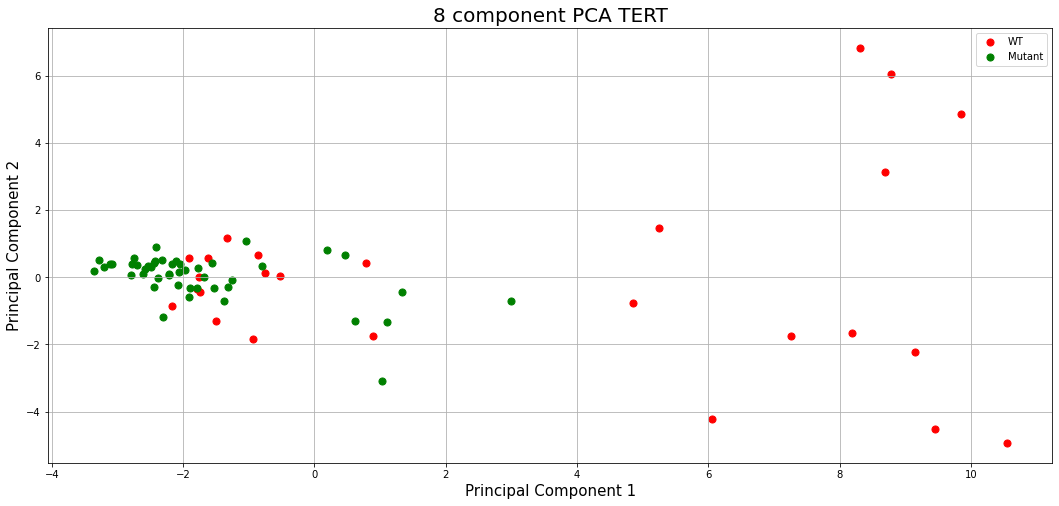

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 111800000' 'chr1 114790000' 'chr1 12000000' 'chr1 145760000'
 'chr1 152140000' 'chr1 160930000' 'chr1 162460000' 'chr1 168200000'
 'chr1 182440000' 'chr1 197400000' 'chr1 21380000' 'chr1 22150000'
 'chr1 227130000' 'chr1 231120000' 'chr1 23250000' 'chr1 23500000'
 'chr1 247210000' 'chr1 24800000' 'chr1 248670000' 'chr1 39990000'
 'chr1 44870000' 'chr1 54230000' 'chr1 65630000' 'chr1 6710000'
 'chr1 7950000' 'chr1 96760000' 'chr10 118260000' 'chr10 12520000'
 'chr10 125960000' 'chr10 17620000' 'chr10 24650000' 'chr10 75330000'
 'chr10 78460000' 'chr10 9270000' 'chr11 107910000' 'chr11 123460000'
 'chr11 125860000' 'chr11 17050000' 'chr11 19860000' 'chr11 28420000'
 'chr11 36140000' 'chr11 60450000' 'chr11 65230000' 'chr12 100290000'
 'chr12 119350000' 'chr12 120730000' 'chr12 14350000' 'chr12 3090000'
 'chr12 32560000' 'chr12 48490000' 'chr13 100760000' 'chr13 34530000'
 'chr13 35960000' 'chr13 37280000' 'chr13 51070000' 'chr14 10

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


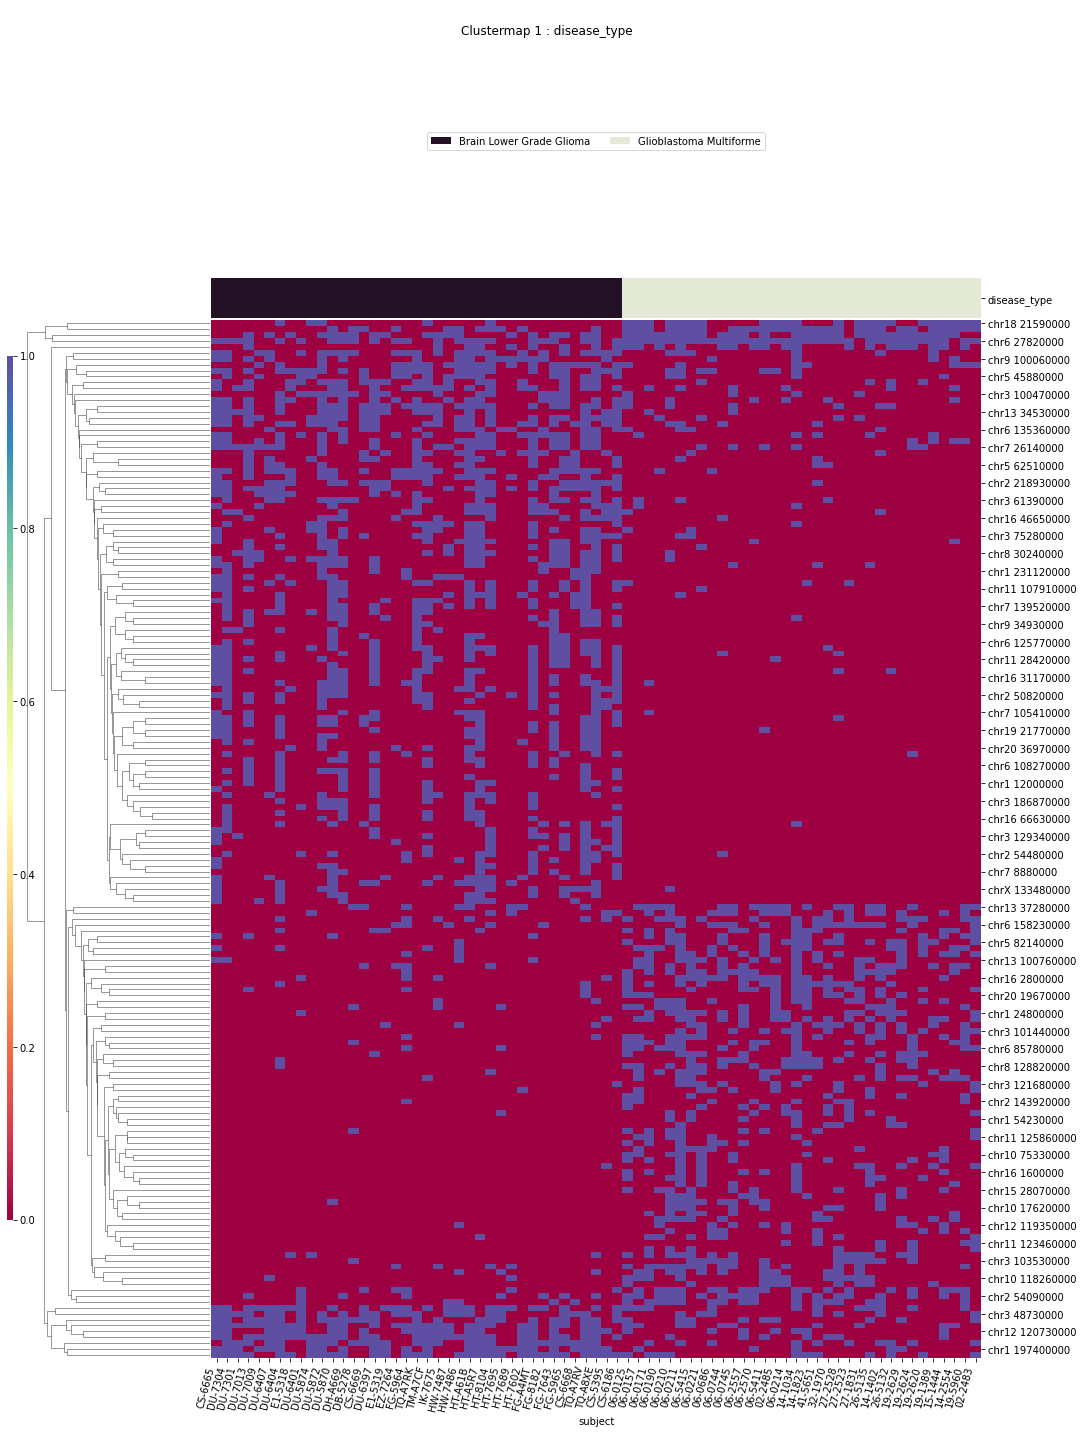

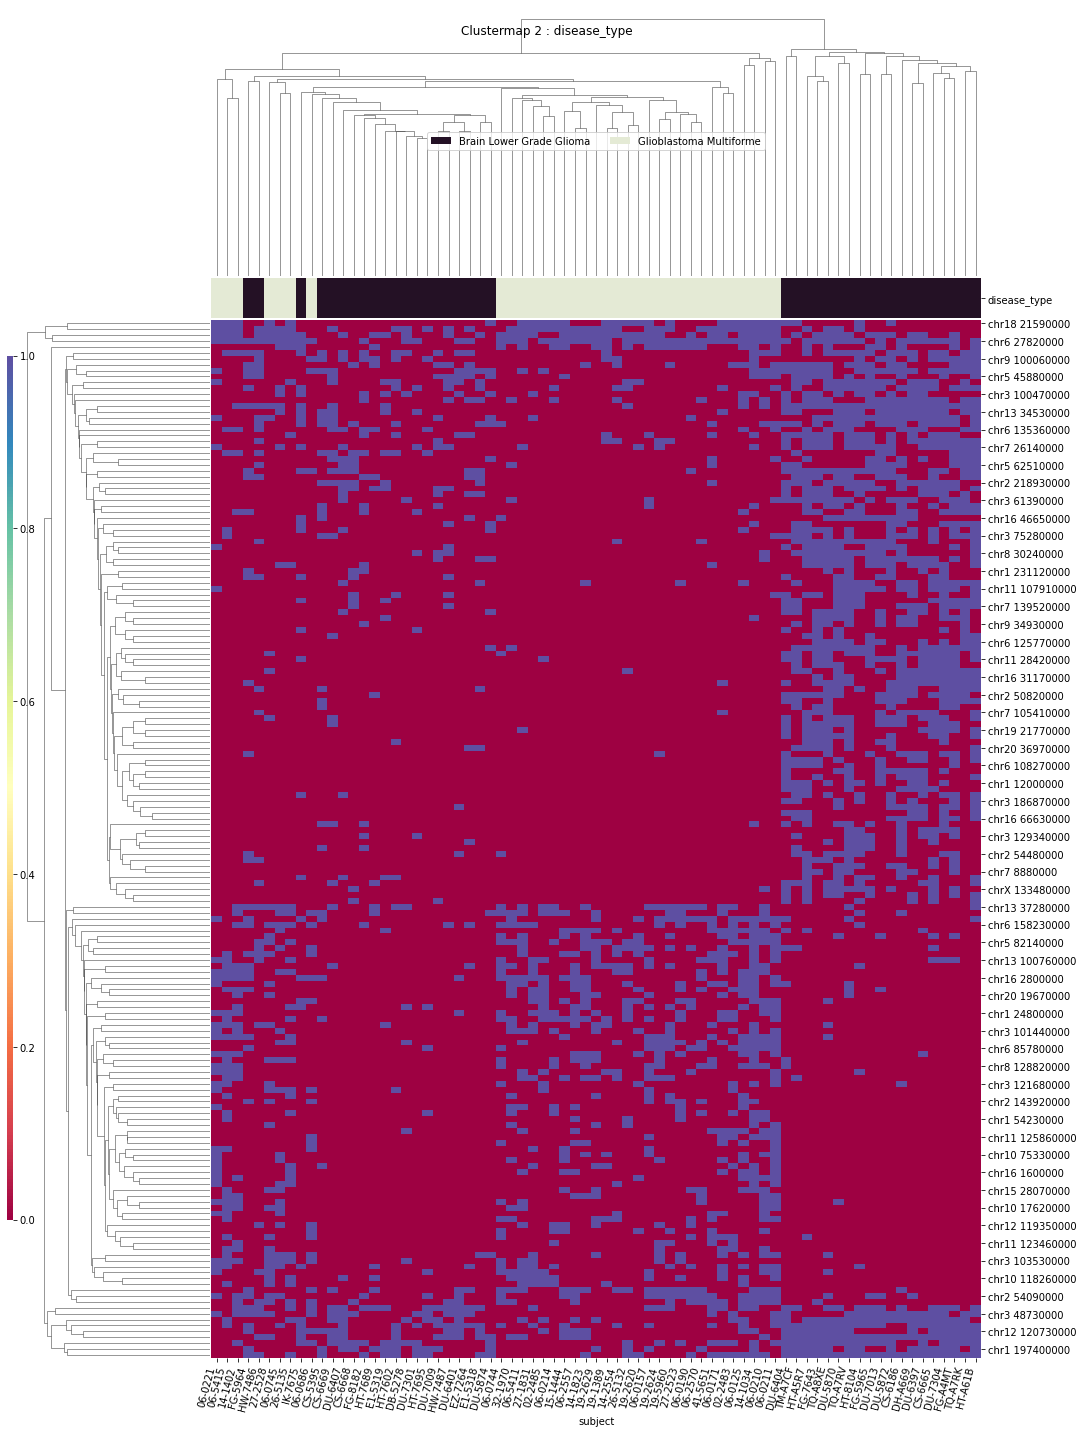

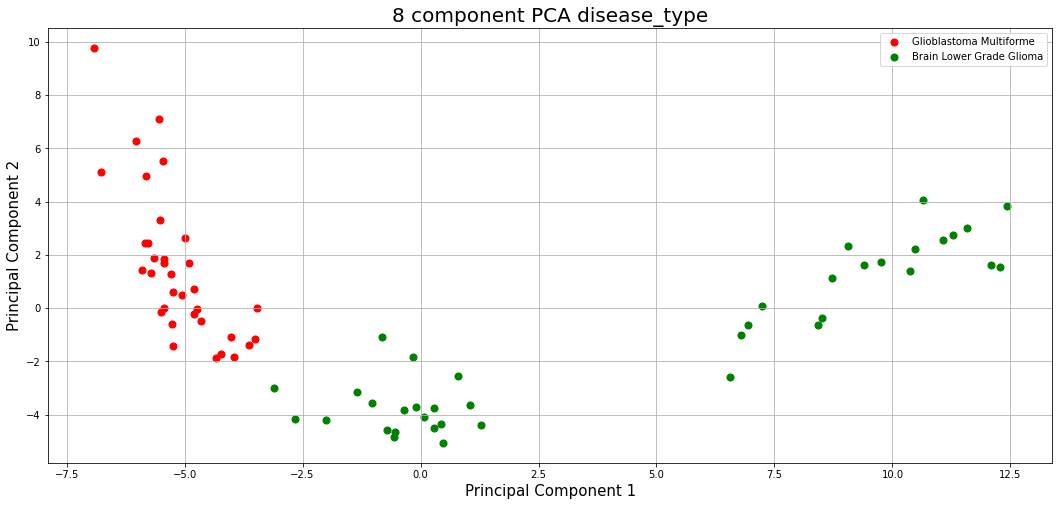

IDH_1p19q_status
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 152140000' 'chr1 160930000' 'chr1 197400000'
 'chr1 213150000' 'chr1 21380000' 'chr1 231120000' 'chr1 23500000'
 'chr1 248670000' 'chr1 37070000' 'chr1 38640000' 'chr1 50380000'
 'chr1 71370000' 'chr1 7950000' 'chr10 42130000' 'chr11 68860000'
 'chr11 73570000' 'chr12 110090000' 'chr13 113860000' 'chr13 19780000'
 'chr13 24970000' 'chr13 35960000' 'chr13 51070000' 'chr13 95690000'
 'chr14 102410000' 'chr14 58580000' 'chr15 60940000' 'chr16 66630000'
 'chr17 1240000' 'chr17 16140000' 'chr18 21590000' 'chr19 36060000'
 'chr19 43890000' 'chr2 132220000' 'chr2 203200000' 'chr2 41990000'
 'chr2 44060000' 'chr2 47430000' 'chr2 64510000' 'chr2 71160000'
 'chr20 31470000' 'chr20 36970000' 'chr20 47520000' 'chr3 149380000'
 'chr3 44820000' 'chr3 46960000' 'chr3 48050000' 'chr3 57740000'
 'chr4 157630000' 'chr4 174690000' 'chr4 52990000' 'chr4 550000'
 'chr4 76910000' 'chr5 135400000' 'chr5 69510000' 'chr5 82140000'
 'chr6 158230000' 'chr6 278

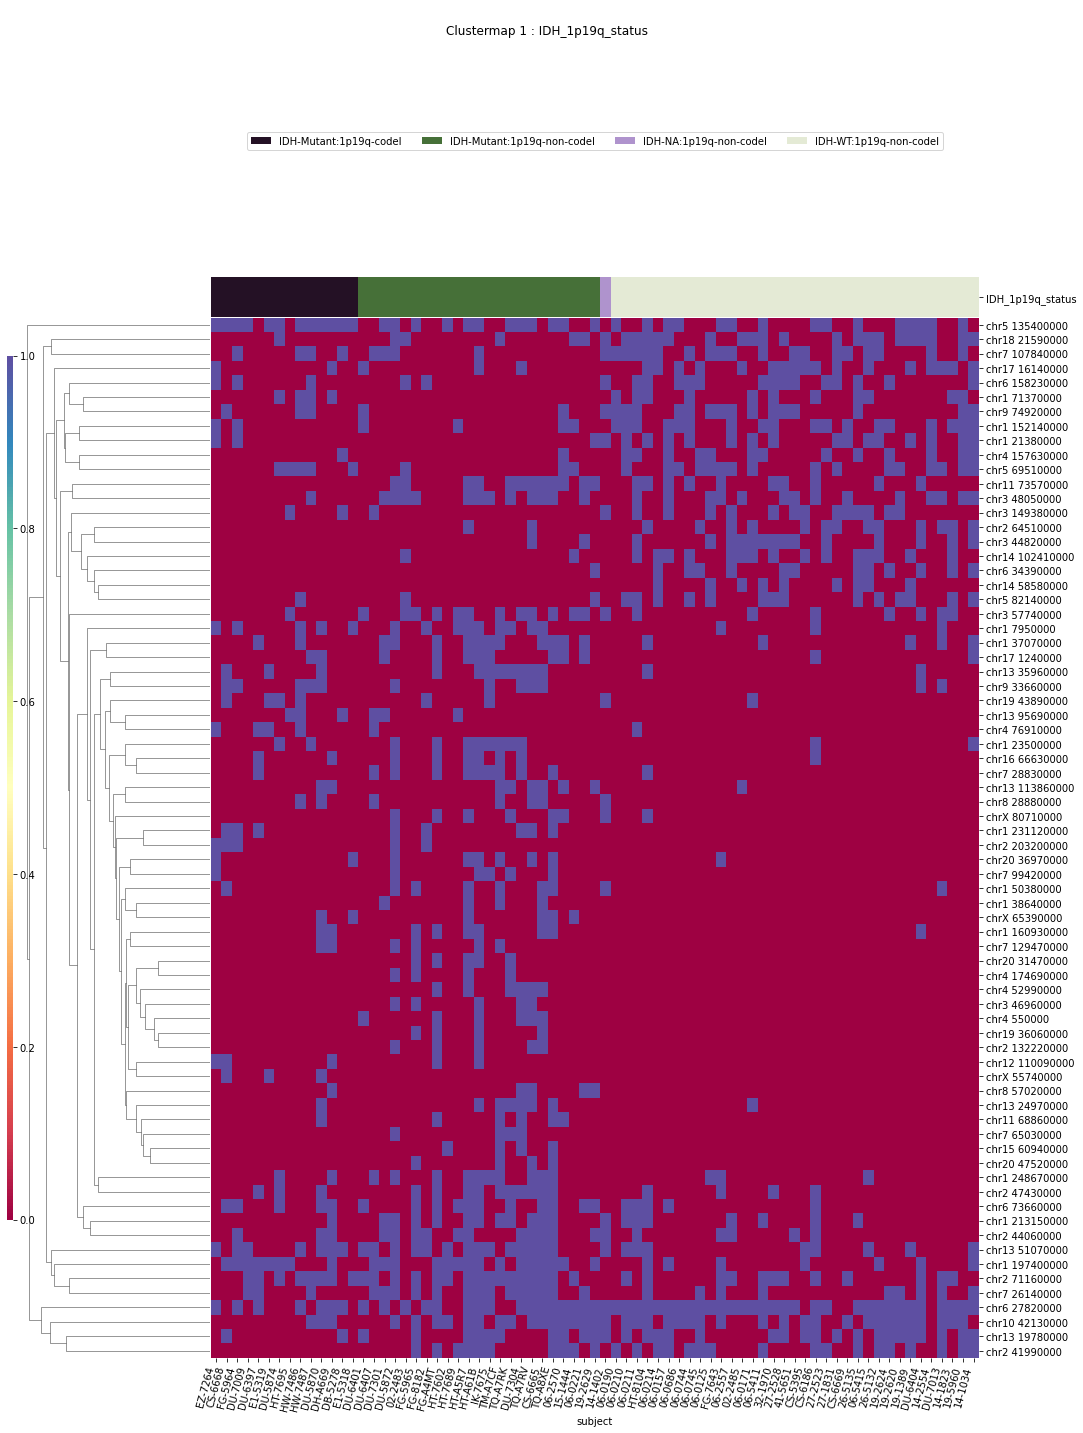

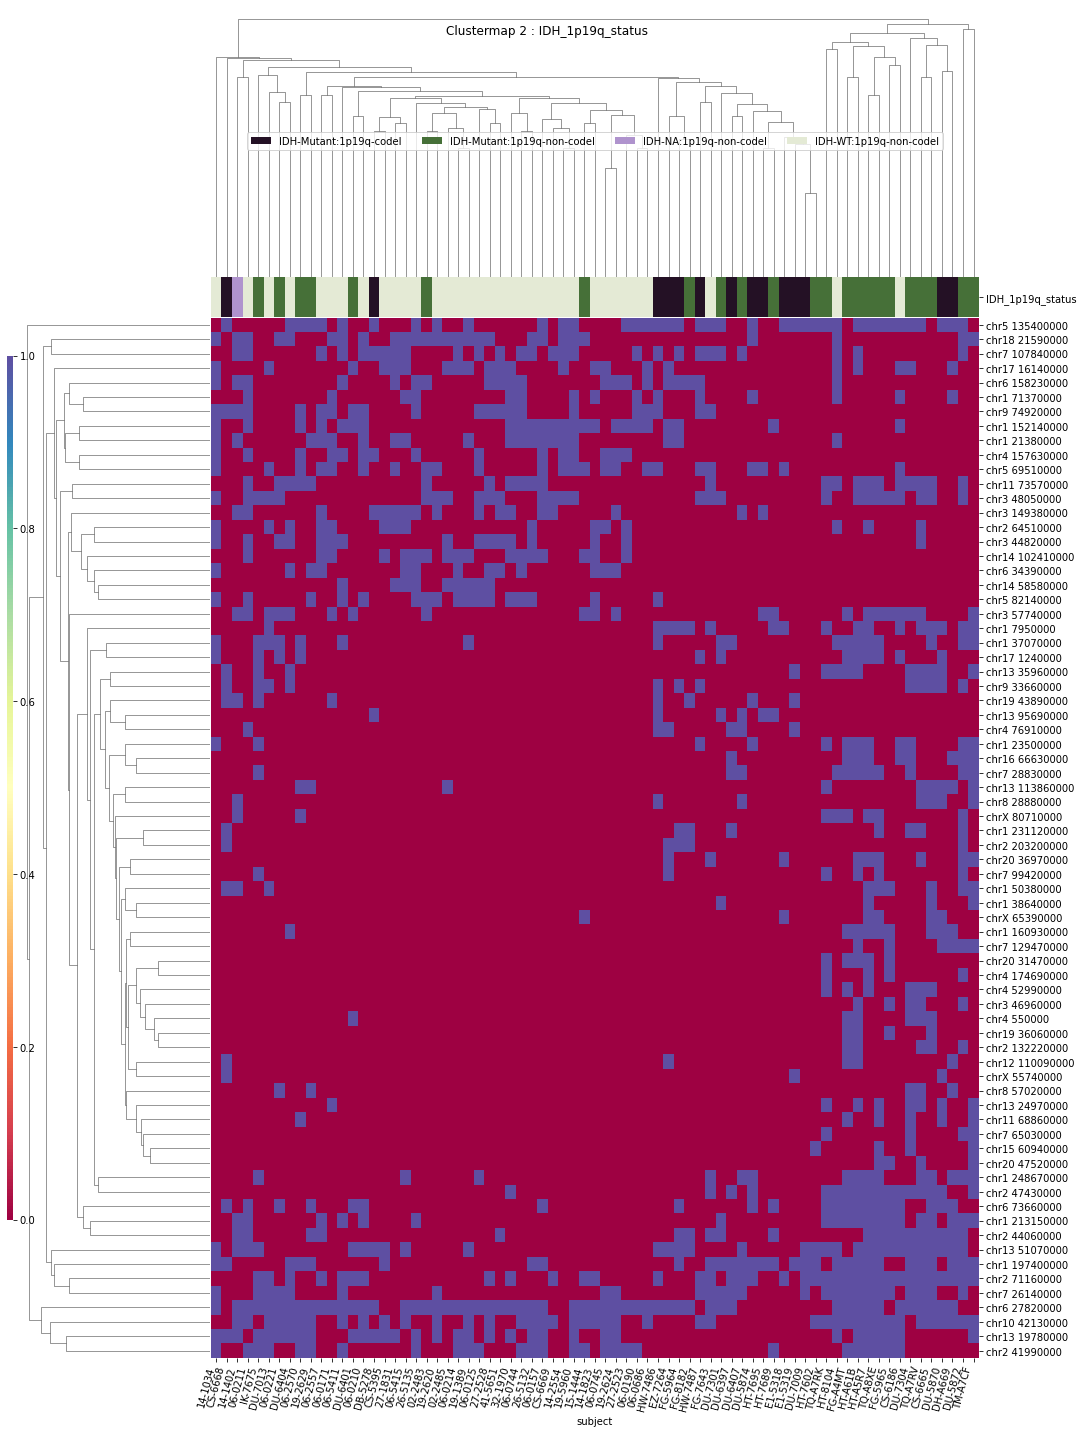

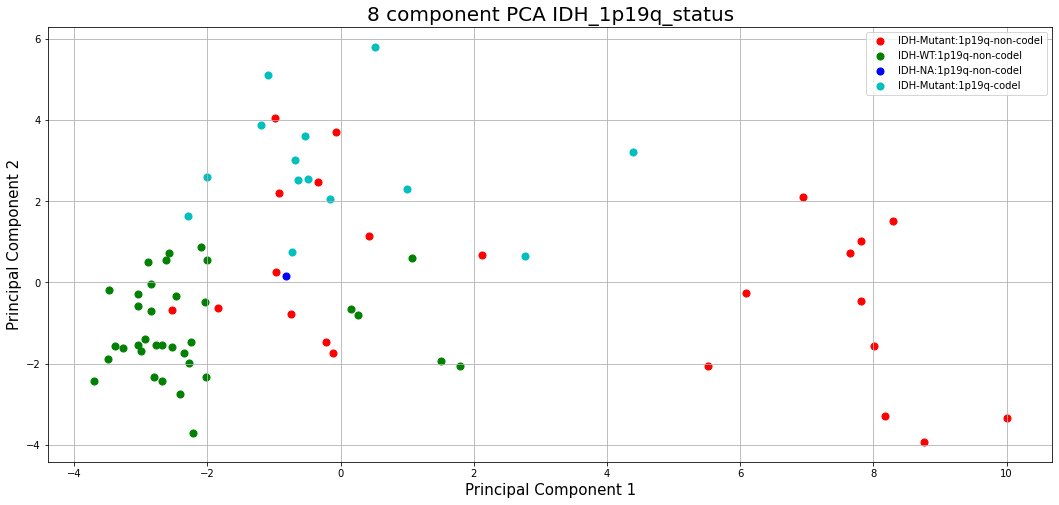

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 108160000' 'chr1 108490000' 'chr1 108530000'
 'chr1 108670000' 'chr1 113060000' 'chr1 114790000' 'chr1 114800000'
 'chr1 12000000' 'chr1 12900000' 'chr1 13390000' 'chr1 143630000'
 'chr1 143700000' 'chr1 145760000' 'chr1 147060000' 'chr1 147230000'
 'chr1 150850000' 'chr1 151770000' 'chr1 152140000' 'chr1 153570000'
 'chr1 156320000' 'chr1 160930000' 'chr1 161280000' 'chr1 161610000'
 'chr1 162460000' 'chr1 167030000' 'chr1 168830000' 'chr1 179030000'
 'chr1 179040000' 'chr1 182510000' 'chr1 192850000' 'chr1 197400000'
 'chr1 208650000' 'chr1 209120000' 'chr1 21020000' 'chr1 213150000'
 'chr1 227130000' 'chr1 231120000' 'chr1 23250000' 'chr1 234260000'
 'chr1 23500000' 'chr1 236380000' 'chr1 23680000' 'chr1 237660000'
 'chr1 237670000' 'chr1 23930000' 'chr1 246360000' 'chr1 247210000'
 'chr1 24800000' 'chr1 248670000' 'chr1 248820000' 'chr1 26590000'
 'chr1 27290000' 'chr1 31170000' 'chr1 33510000' 'chr1 34960000'
 'ch

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


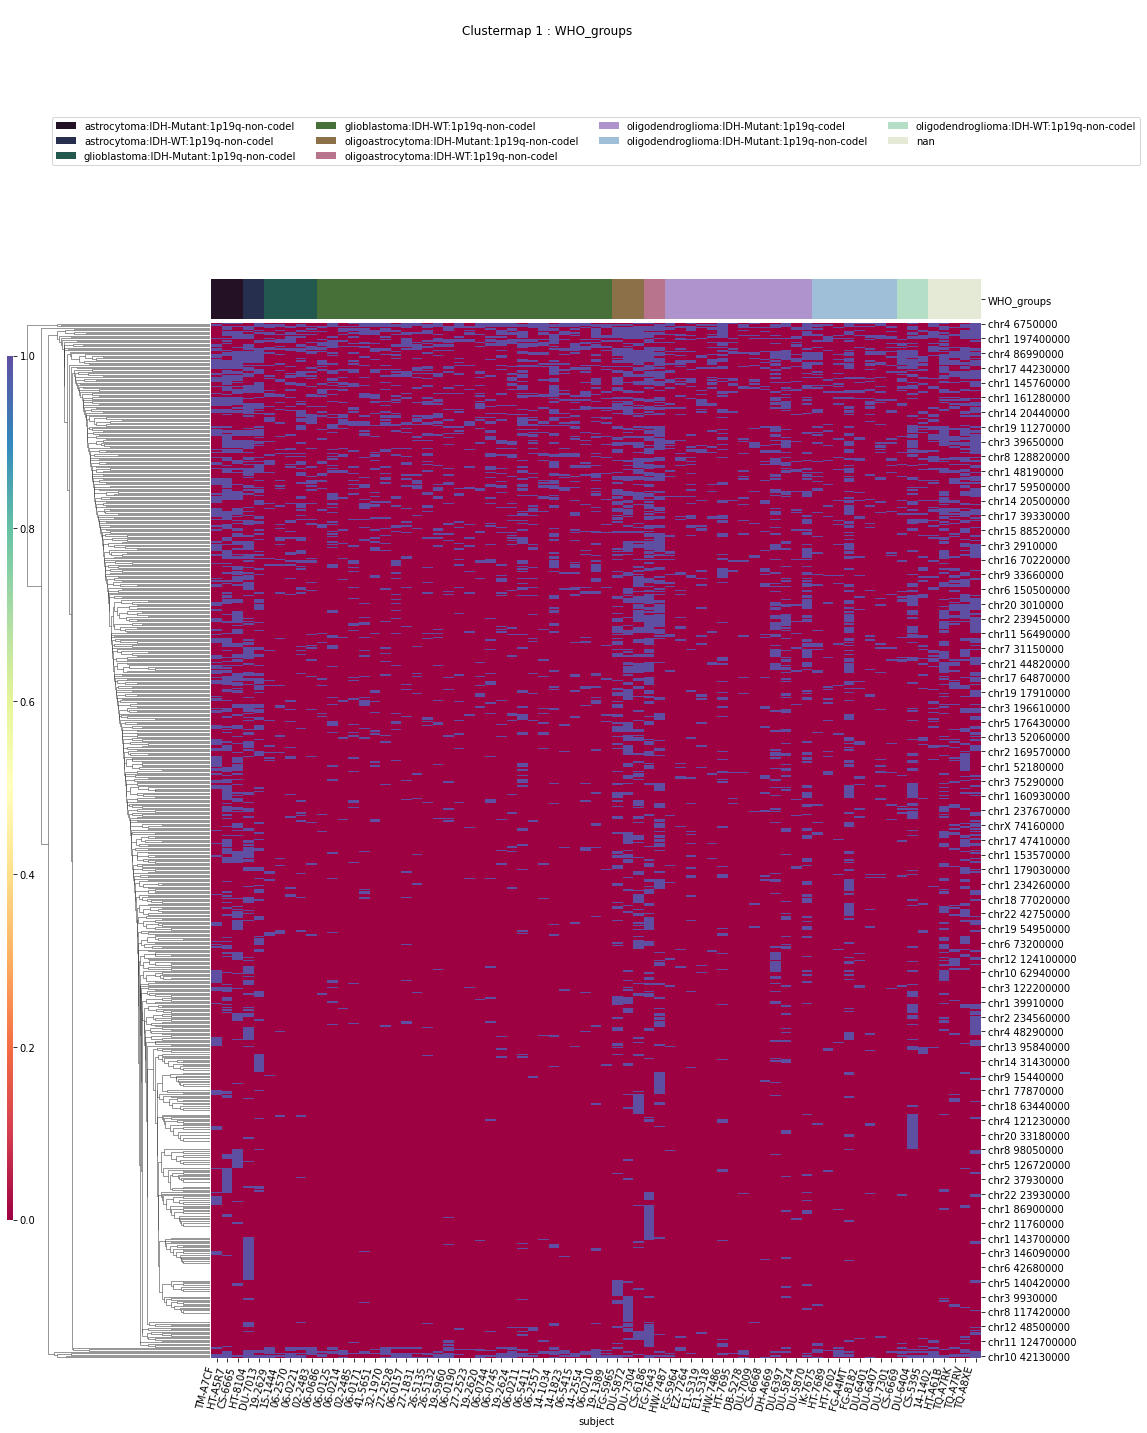

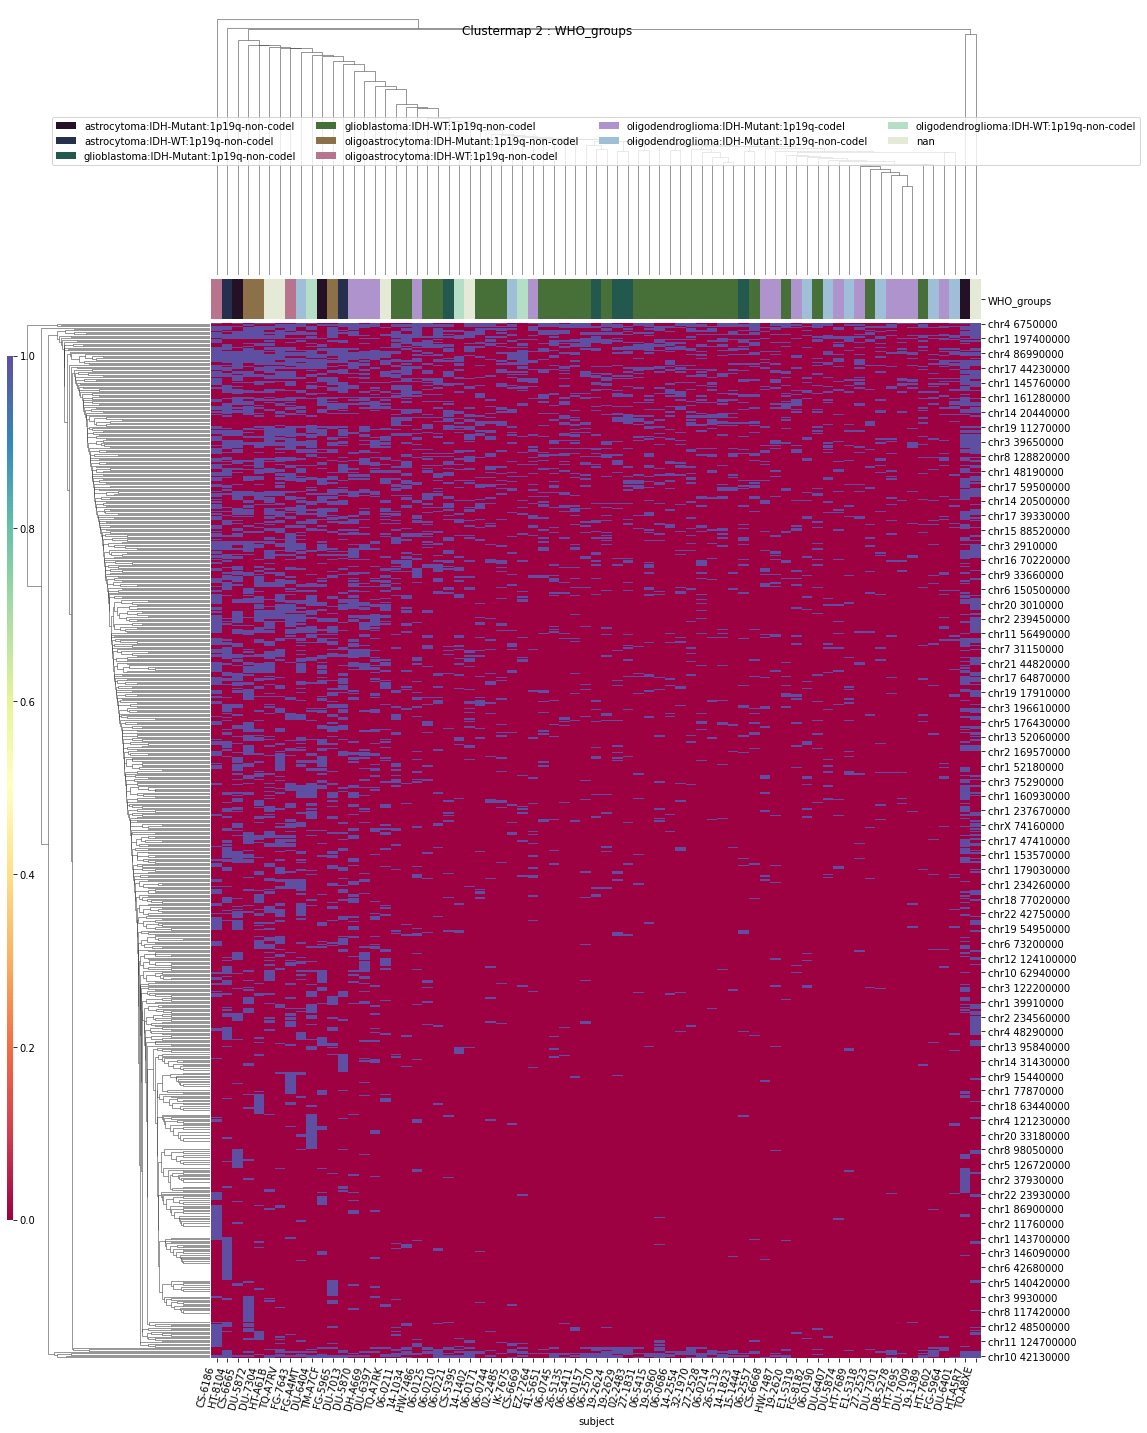

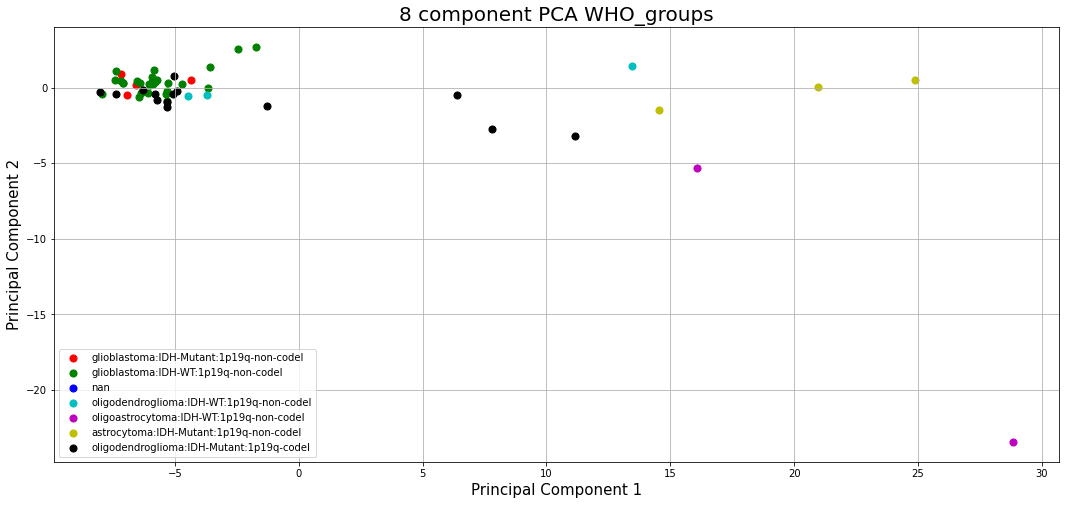

Triple_group
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['Triple_group' 'chr1 108490000' 'chr1 114800000' 'chr1 117300000'
 'chr1 152140000' 'chr1 156320000' 'chr1 160930000' 'chr1 162460000'
 'chr1 182510000' 'chr1 197400000' 'chr1 209120000' 'chr1 21380000'
 'chr1 227130000' 'chr1 231120000' 'chr1 23500000' 'chr1 245770000'
 'chr1 247210000' 'chr1 248670000' 'chr1 27290000' 'chr1 37070000'
 'chr1 39990000' 'chr1 43500000' 'chr1 50380000' 'chr1 6710000'
 'chr1 71370000' 'chr1 7950000' 'chr1 90890000' 'chr1 99070000'
 'chr10 31970000' 'chr10 45250000' 'chr10 6990000' 'chr10 9270000'
 'chr10 96940000' 'chr10 98150000' 'chr11 112020000' 'chr11 131080000'
 'chr11 133060000' 'chr11 17050000' 'chr11 19860000' 'chr11 44660000'
 'chr11 47090000' 'chr11 60490000' 'chr11 62270000' 'chr11 65450000'
 'chr11 68860000' 'chr11 73570000' 'chr11 73930000' 'chr12 110090000'
 'chr12 120730000' 'chr12 121070000' 'chr12 14350000' 'chr12 38330000'
 'chr12 7200000' 'chr12 74580000' 'chr13 107780000' 'chr13 113860000'
 'chr13 19780000' 

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


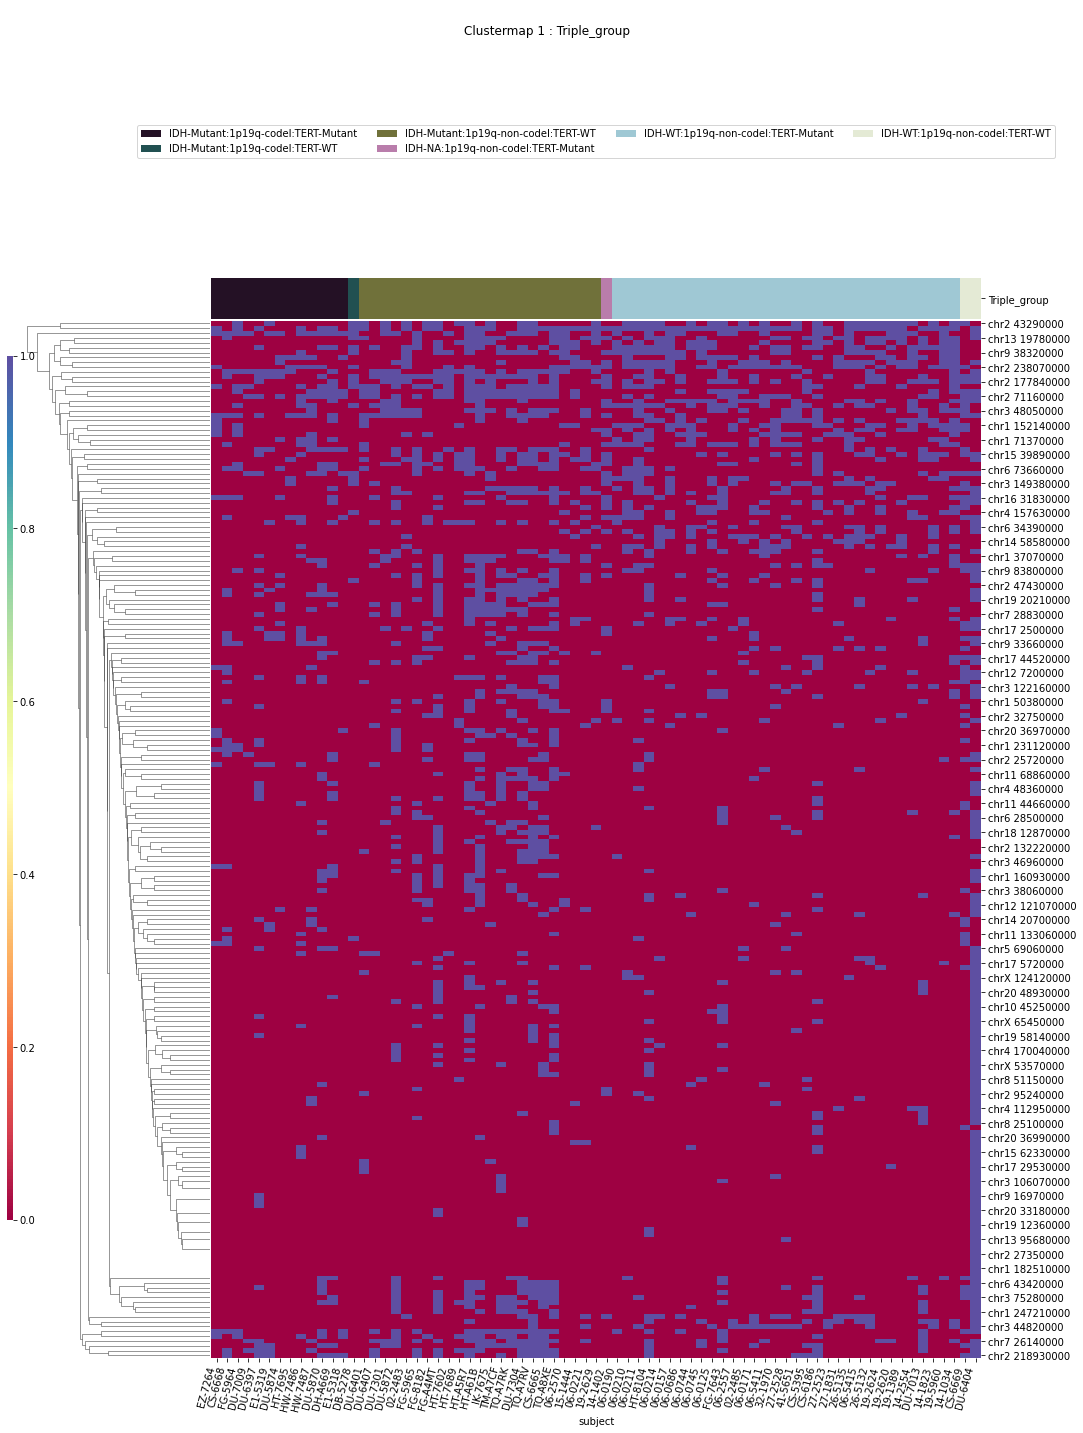

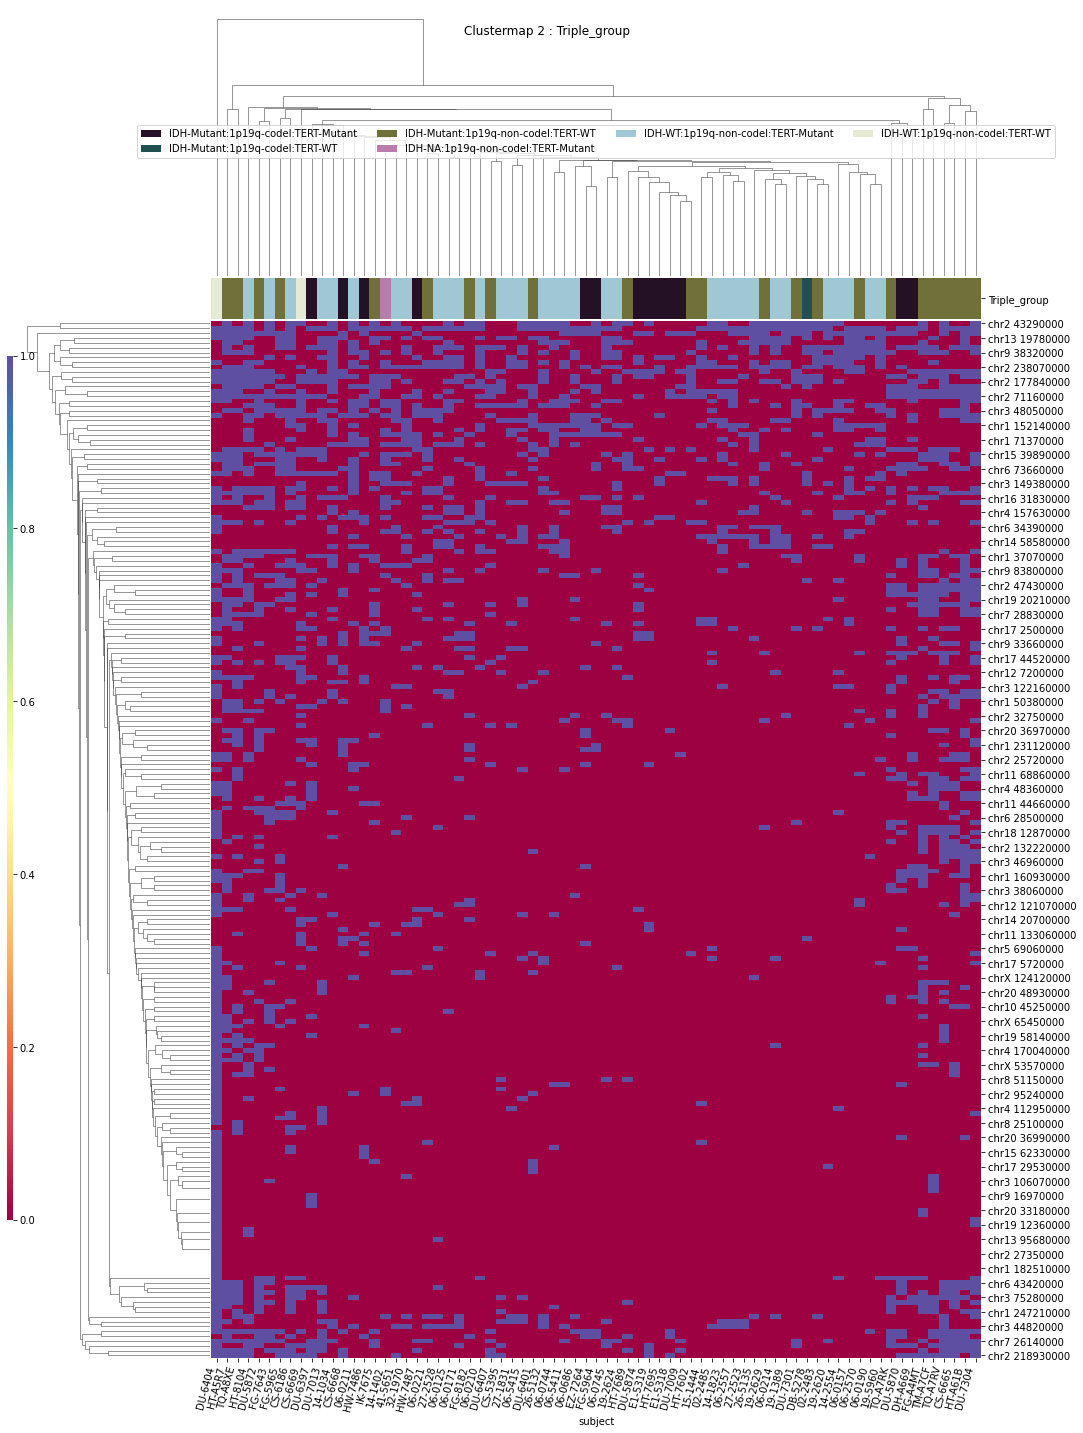

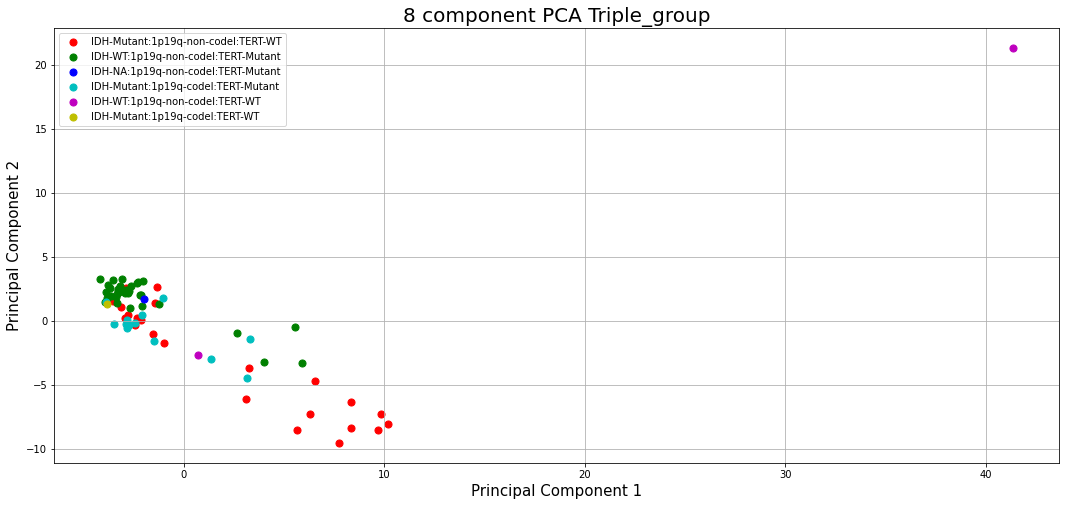

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr1 21380000' 'chr11 56140000' 'chr12 73850000' 'chr17 16140000'
 'chr17 18290000' 'chr17 46070000' 'chr18 50600000' 'chr20 53860000'
 'chr3 128810000' 'chr4 112950000' 'chr5 112950000' 'chr5 168640000'
 'chr6 122840000' 'chr6 154680000' 'chr7 50450000' 'chr7 77510000'
 'chr8 124430000' 'chr8 41620000' 'subject']


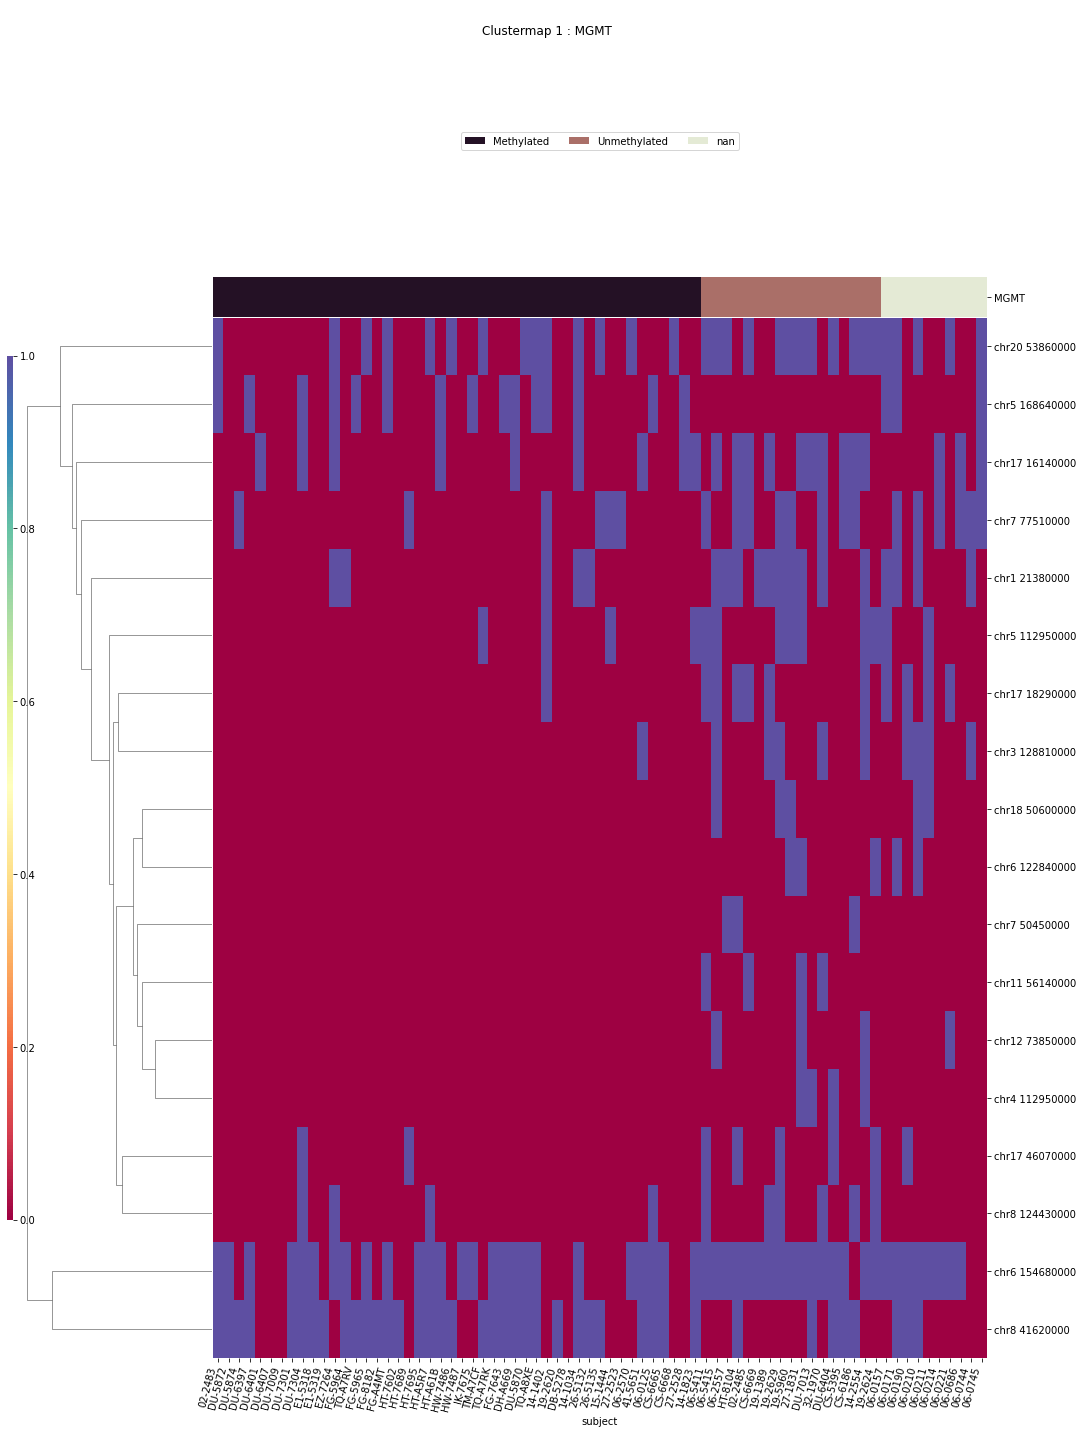

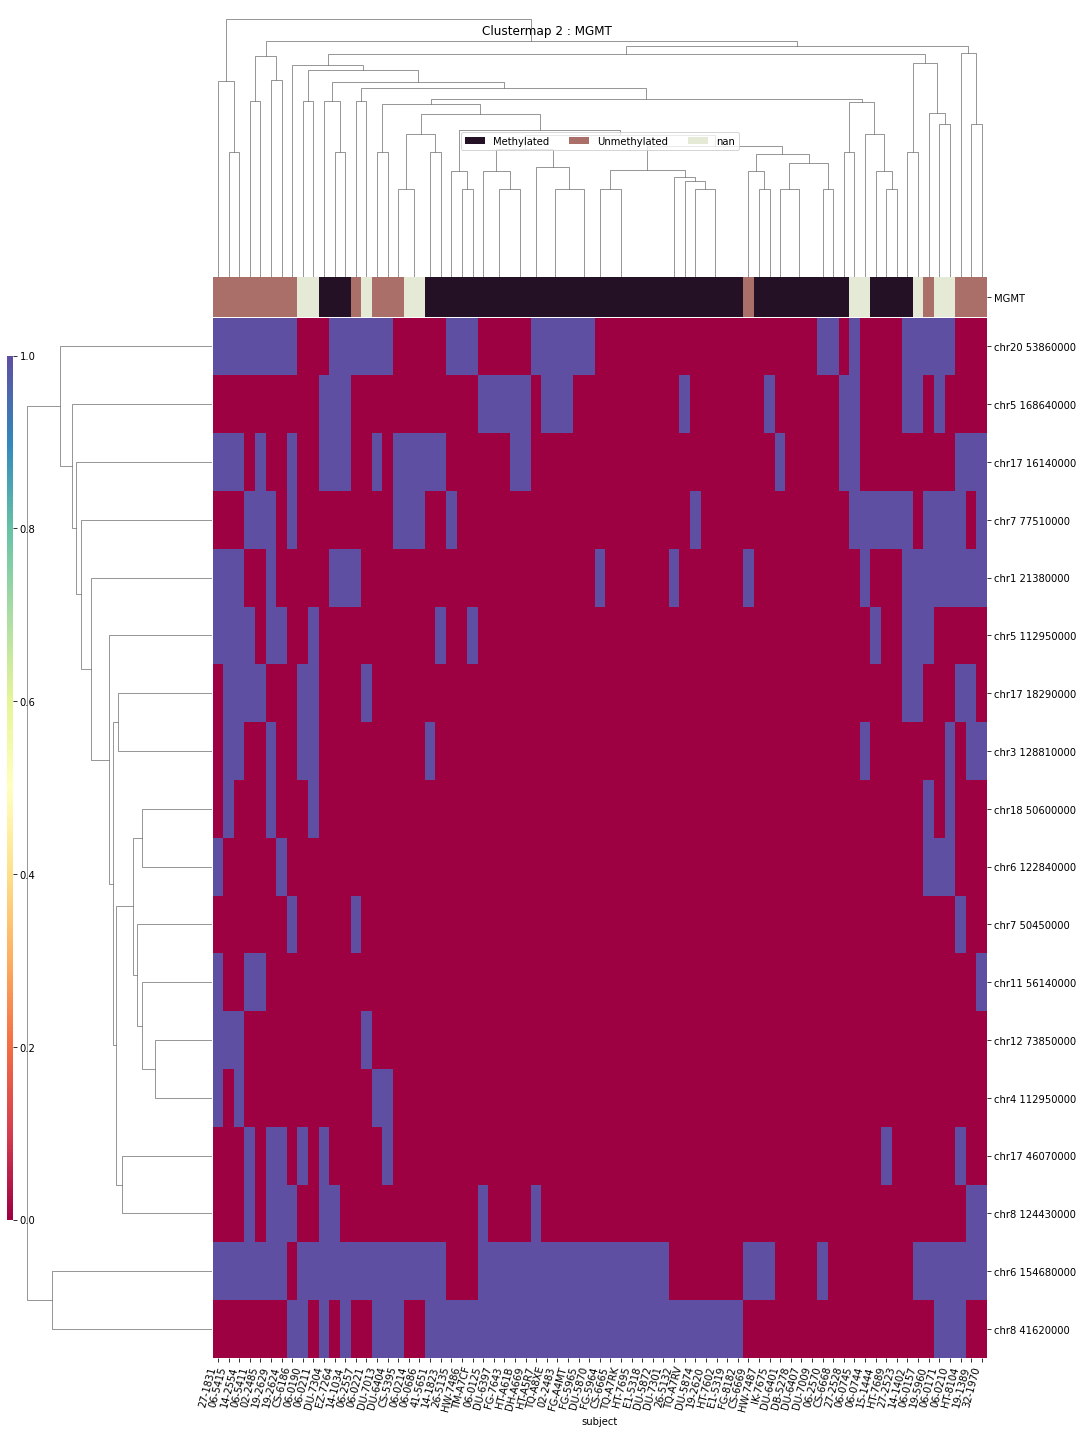

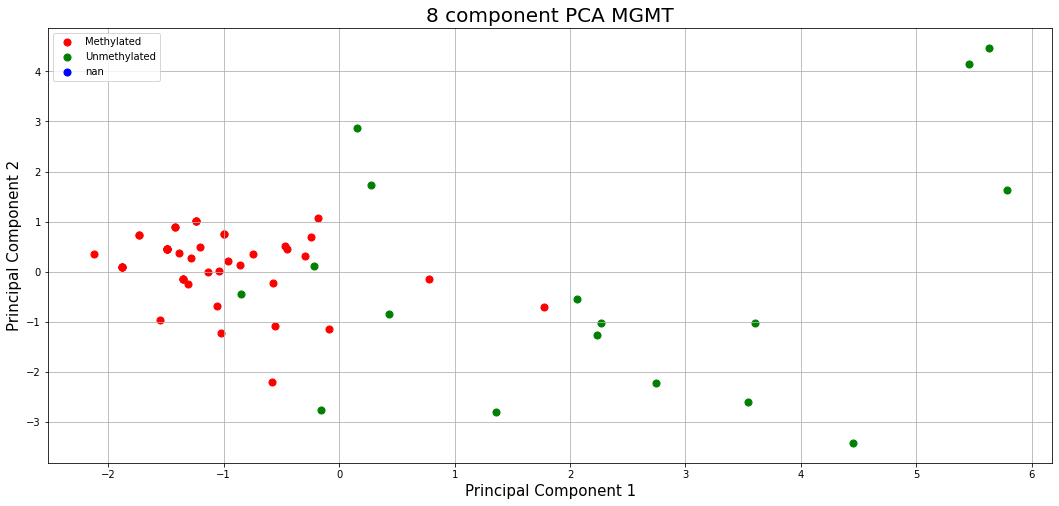

In [112]:
for column in ['primary_diagnosis','IDH','x1p19q','TERT','disease_type',
               'IDH_1p19q_status','WHO_groups','Triple_group','MGMT']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)

In [113]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210601 18:33:53'

primary_diagnosis
T-Testing
Boxplotting
Clustermapping
['chr1 108160000' 'chr1 114790000' 'chr1 114800000' 'chr1 117300000'
 'chr1 12000000' 'chr1 12900000' 'chr1 143700000' 'chr1 145760000'
 'chr1 147060000' 'chr1 147230000' 'chr1 150850000' 'chr1 153570000'
 'chr1 160930000' 'chr1 161610000' 'chr1 162460000' 'chr1 167030000'
 'chr1 168830000' 'chr1 179040000' 'chr1 182440000' 'chr1 182510000'
 'chr1 182740000' 'chr1 197400000' 'chr1 209120000' 'chr1 211460000'
 'chr1 219540000' 'chr1 222480000' 'chr1 227130000' 'chr1 231120000'
 'chr1 23250000' 'chr1 23500000' 'chr1 237670000' 'chr1 23930000'
 'chr1 247210000' 'chr1 24800000' 'chr1 248670000' 'chr1 248820000'
 'chr1 26590000' 'chr1 27290000' 'chr1 31170000' 'chr1 33310000'
 'chr1 33510000' 'chr1 34960000' 'chr1 37070000' 'chr1 38640000'
 'chr1 39990000' 'chr1 43500000' 'chr1 44870000' 'chr1 48190000'
 'chr1 50380000' 'chr1 52180000' 'chr1 6710000' 'chr1 7600000'
 'chr1 77870000' 'chr1 7950000' 'chr1 86210000' 'chr1 96760000'
 'chr10 

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


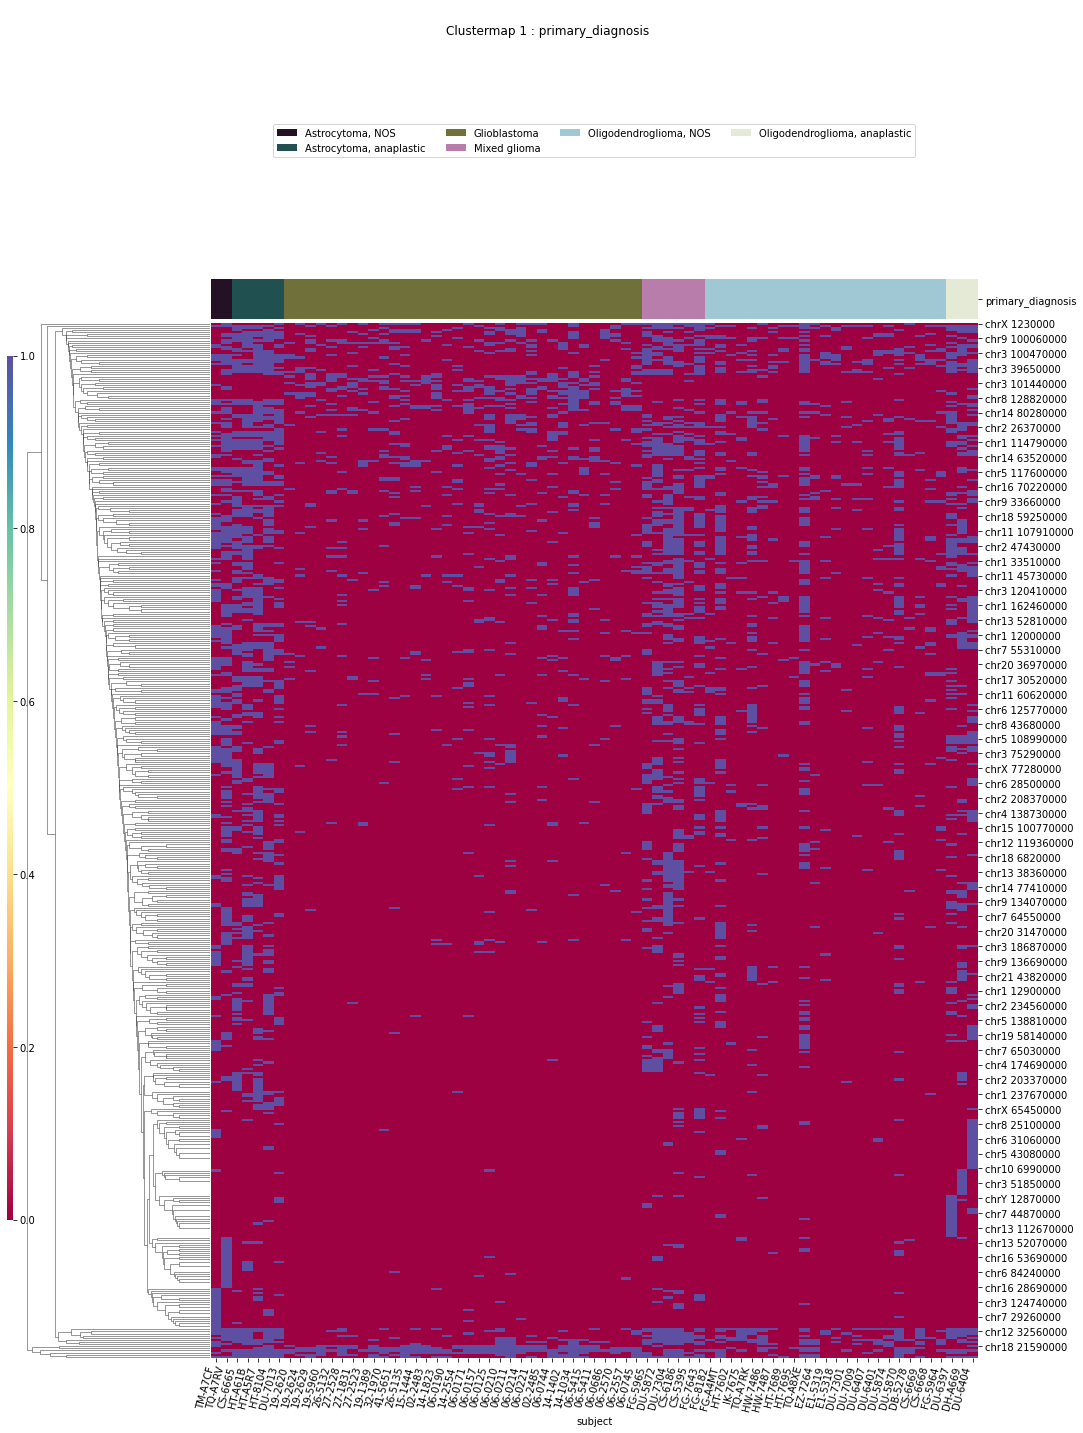

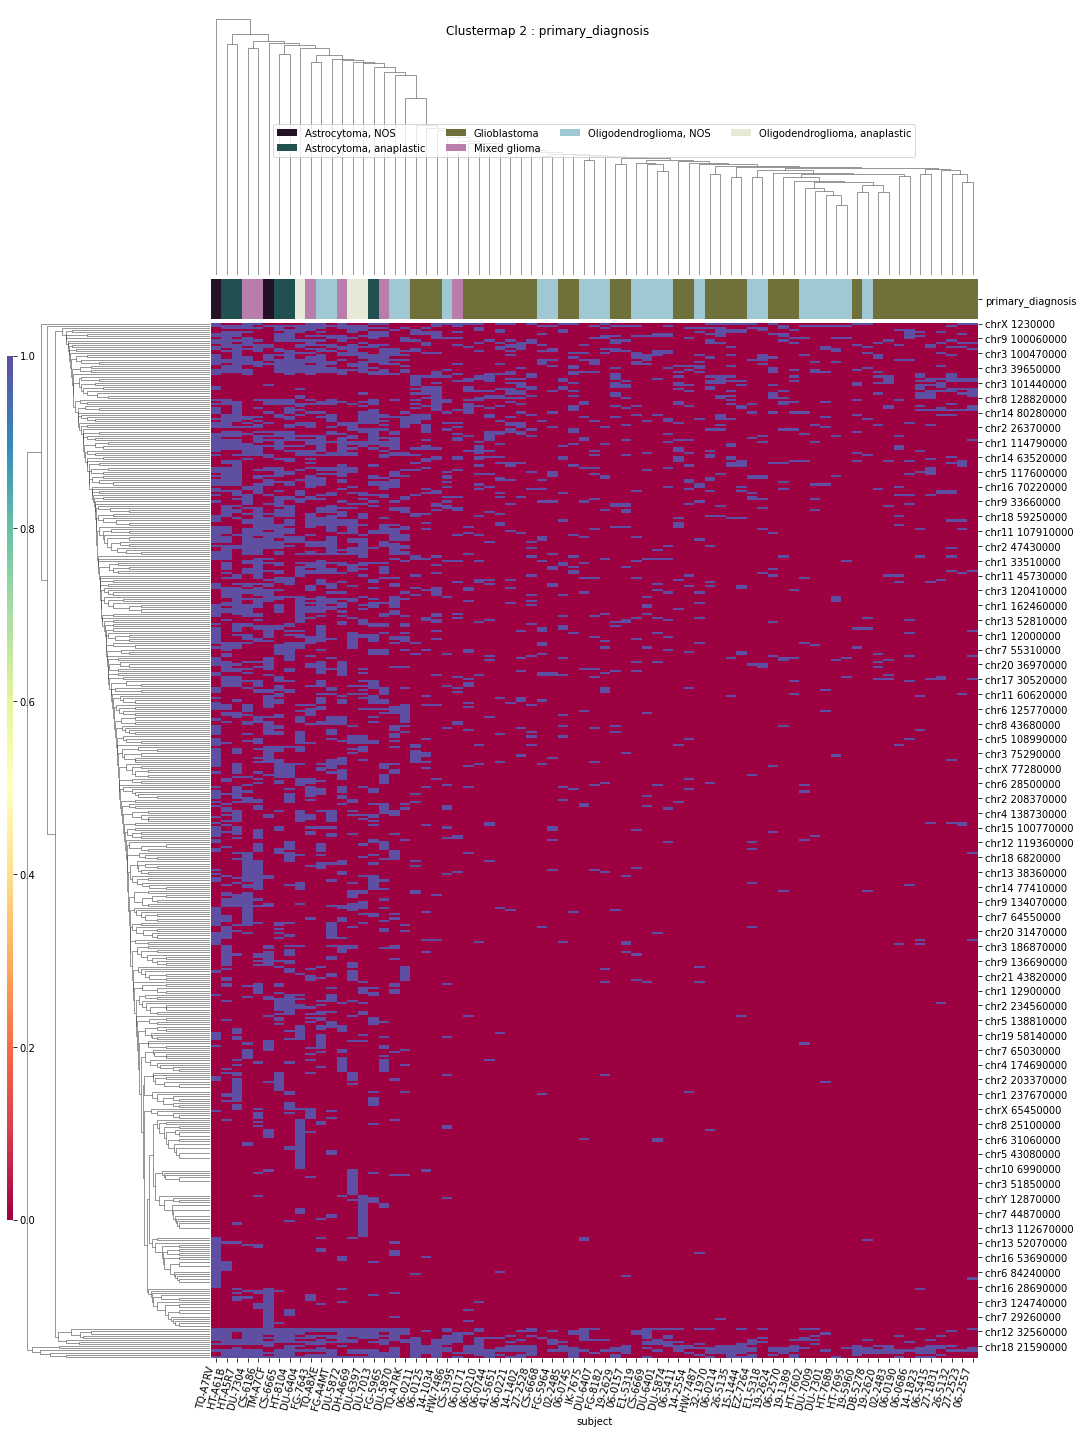

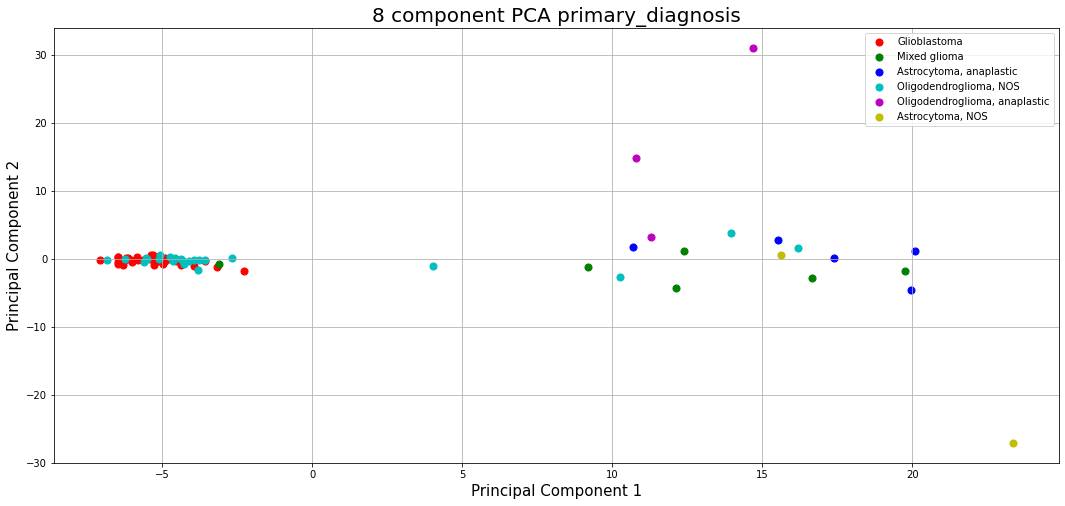

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 197400000' 'chr1 21380000' 'chr14 102410000' 'chr14 58580000'
 'chr17 16140000' 'chr18 21590000' 'chr2 64510000' 'chr3 44820000'
 'chr4 157630000' 'chr6 34390000' 'subject']


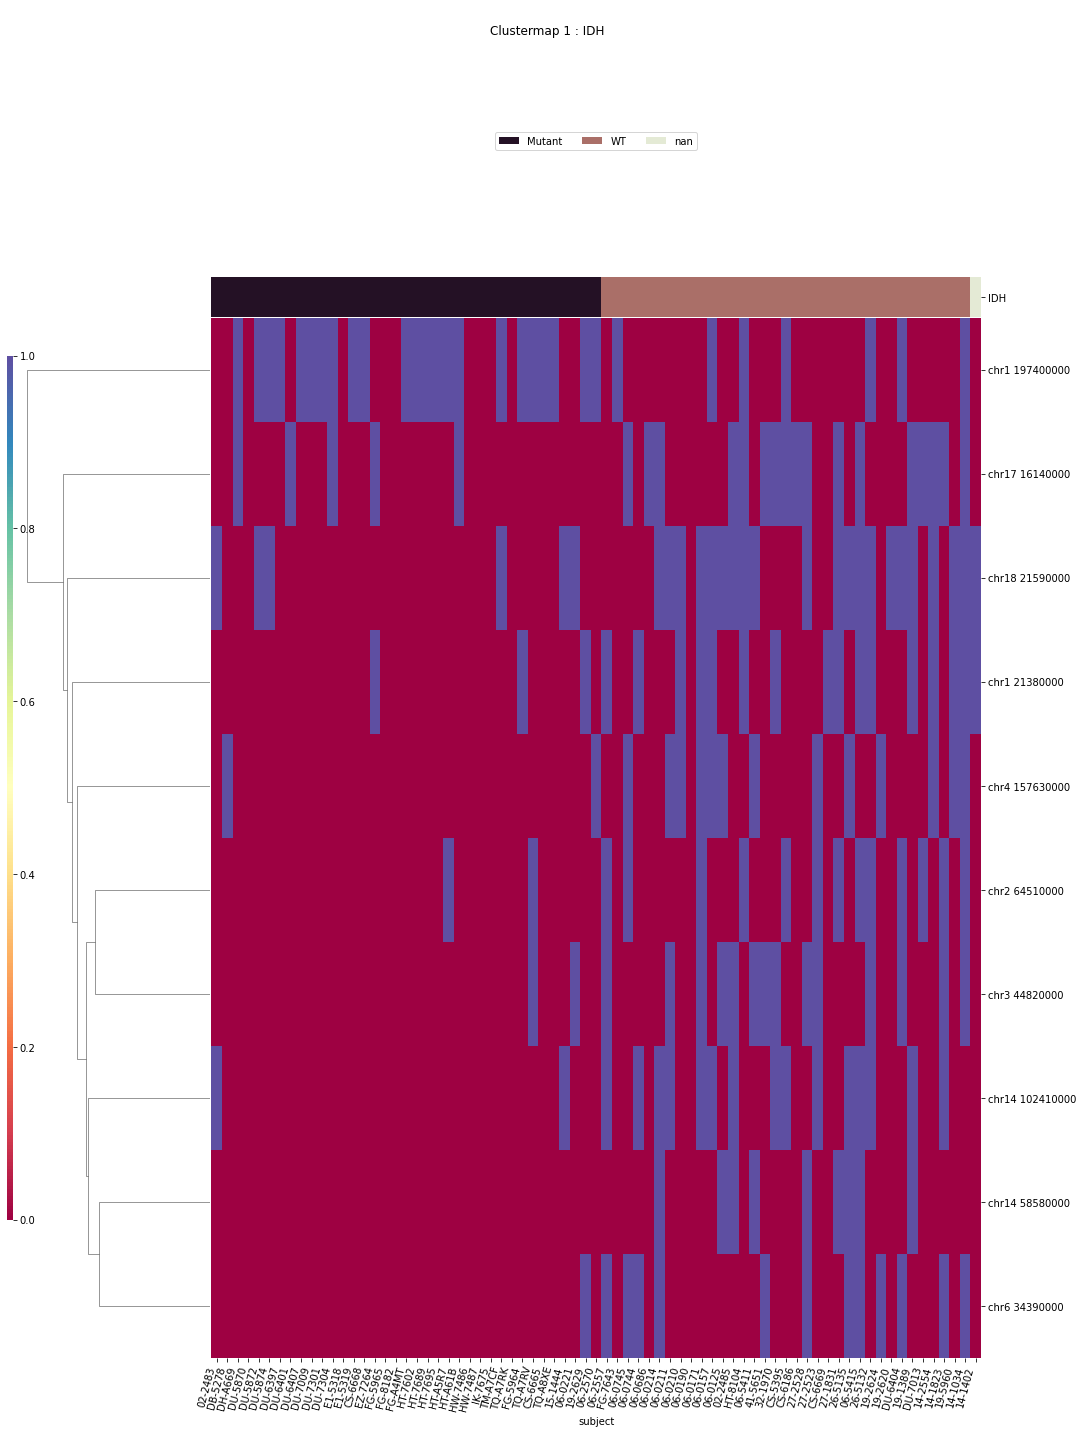

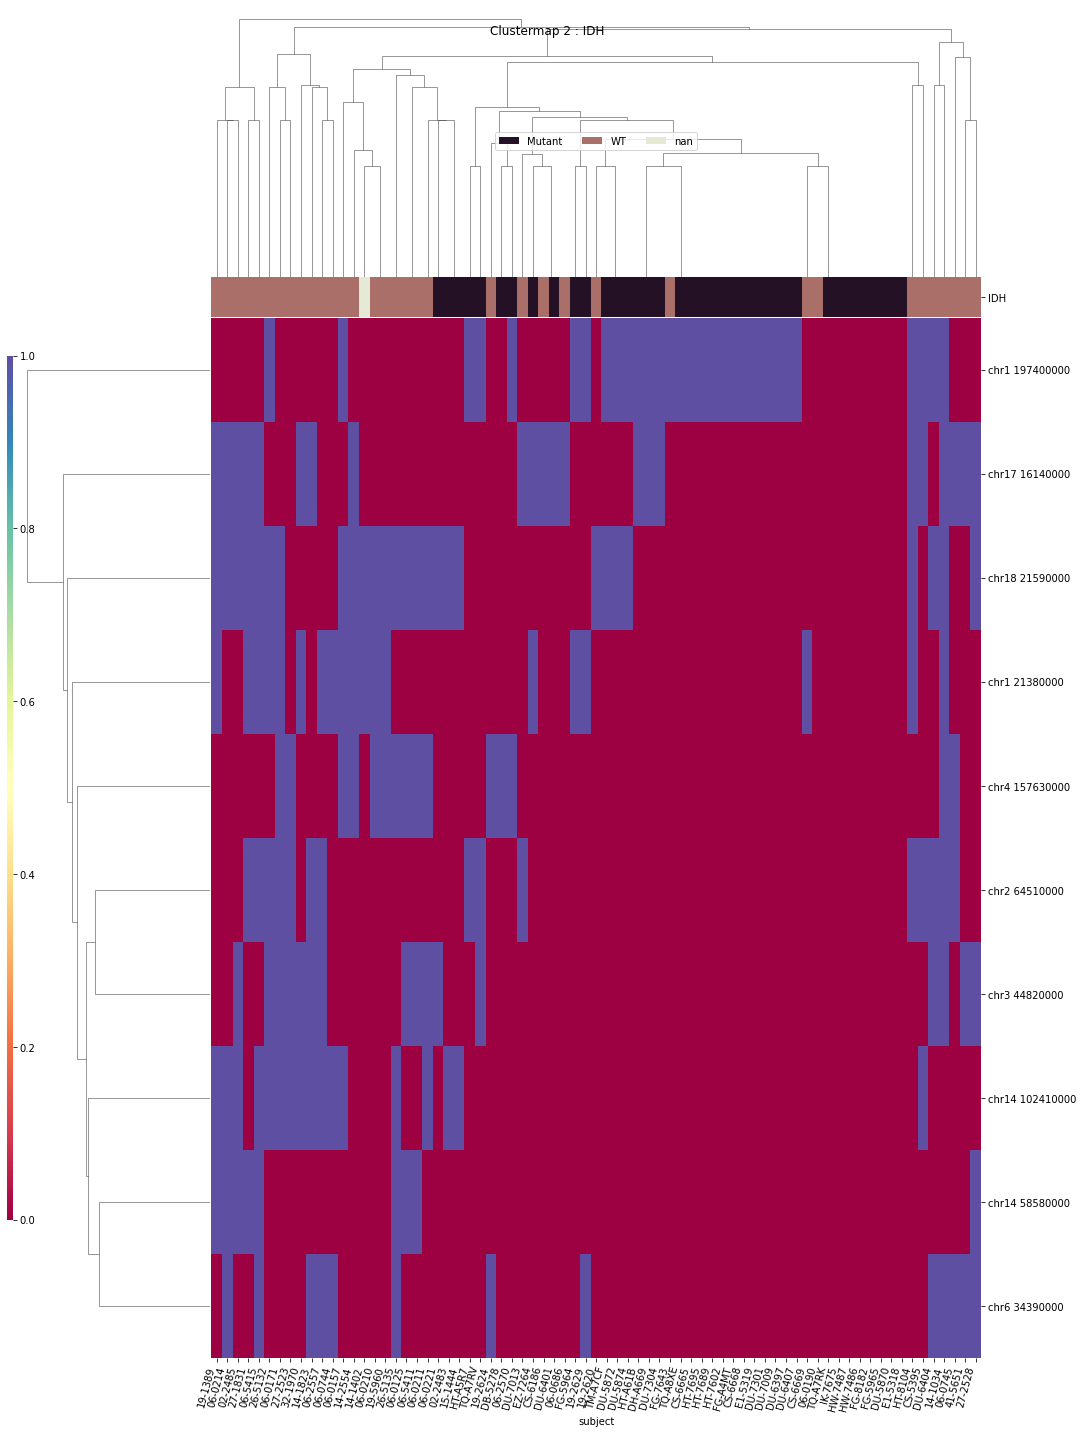

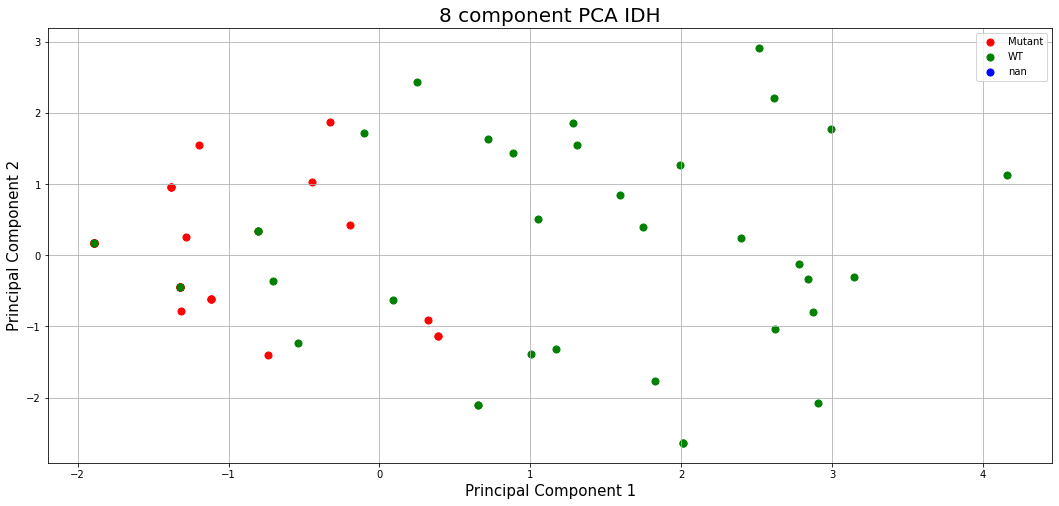

x1p19q
T-Testing
Boxplotting
Clustermapping
['chrX 55740000' 'subject' 'x1p19q']
Not enough data to produce cluster maps
TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr1 71370000' 'chr11 112020000' 'chr11 131080000'
 'chr4 52990000' 'chr4 550000' 'chr7 28830000' 'subject']


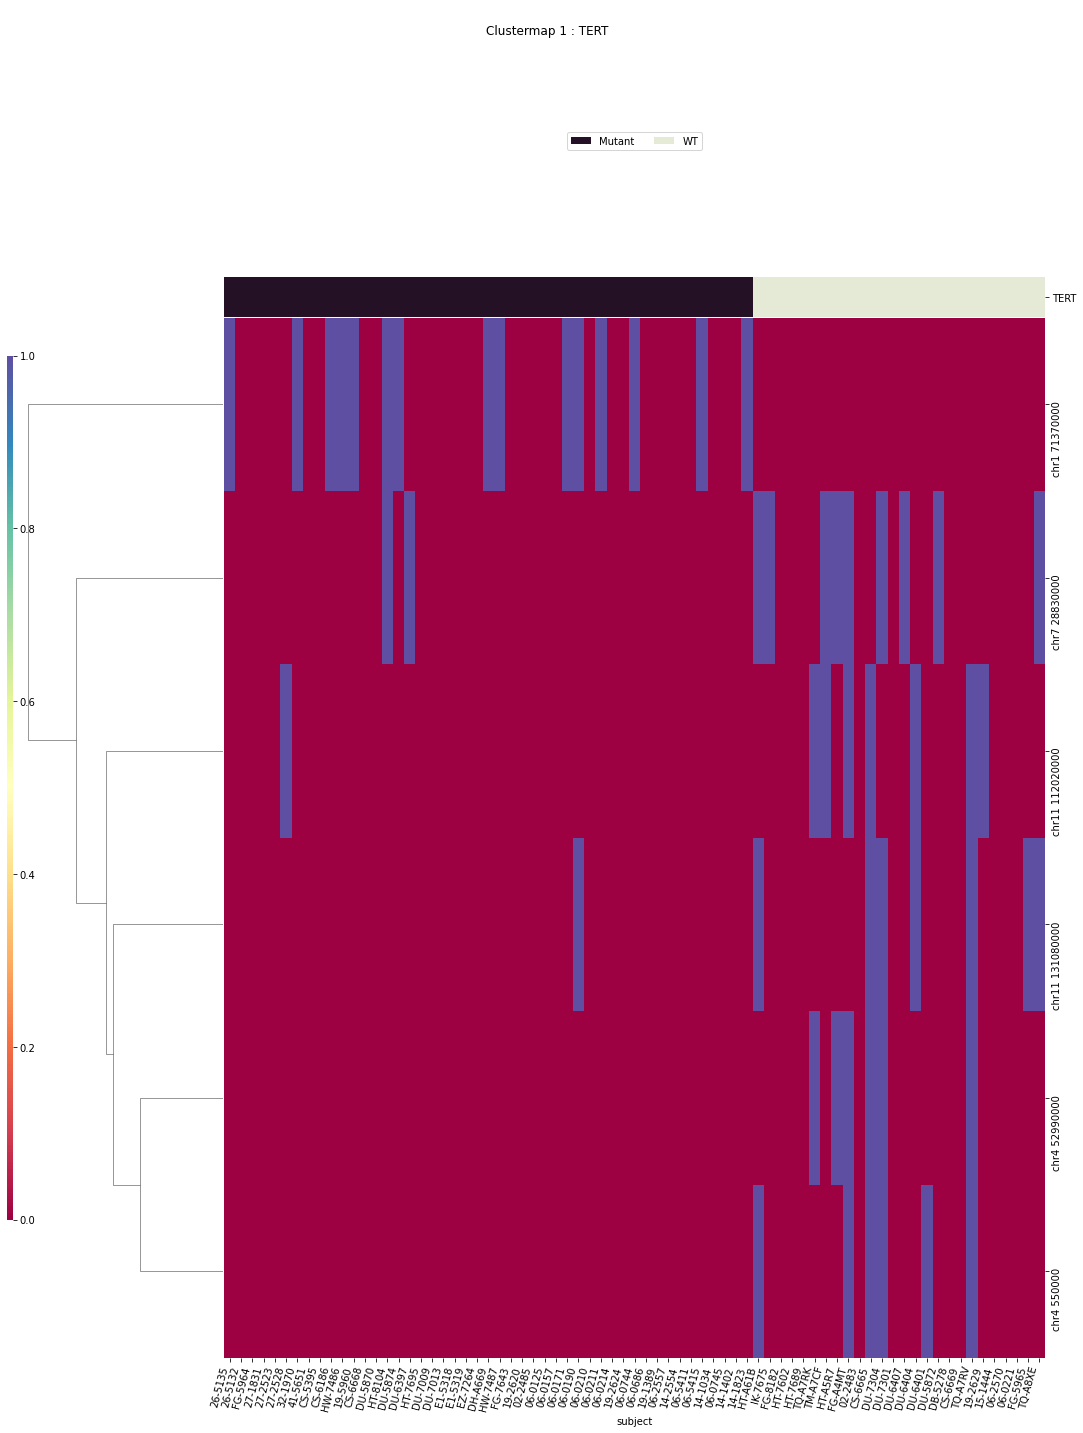

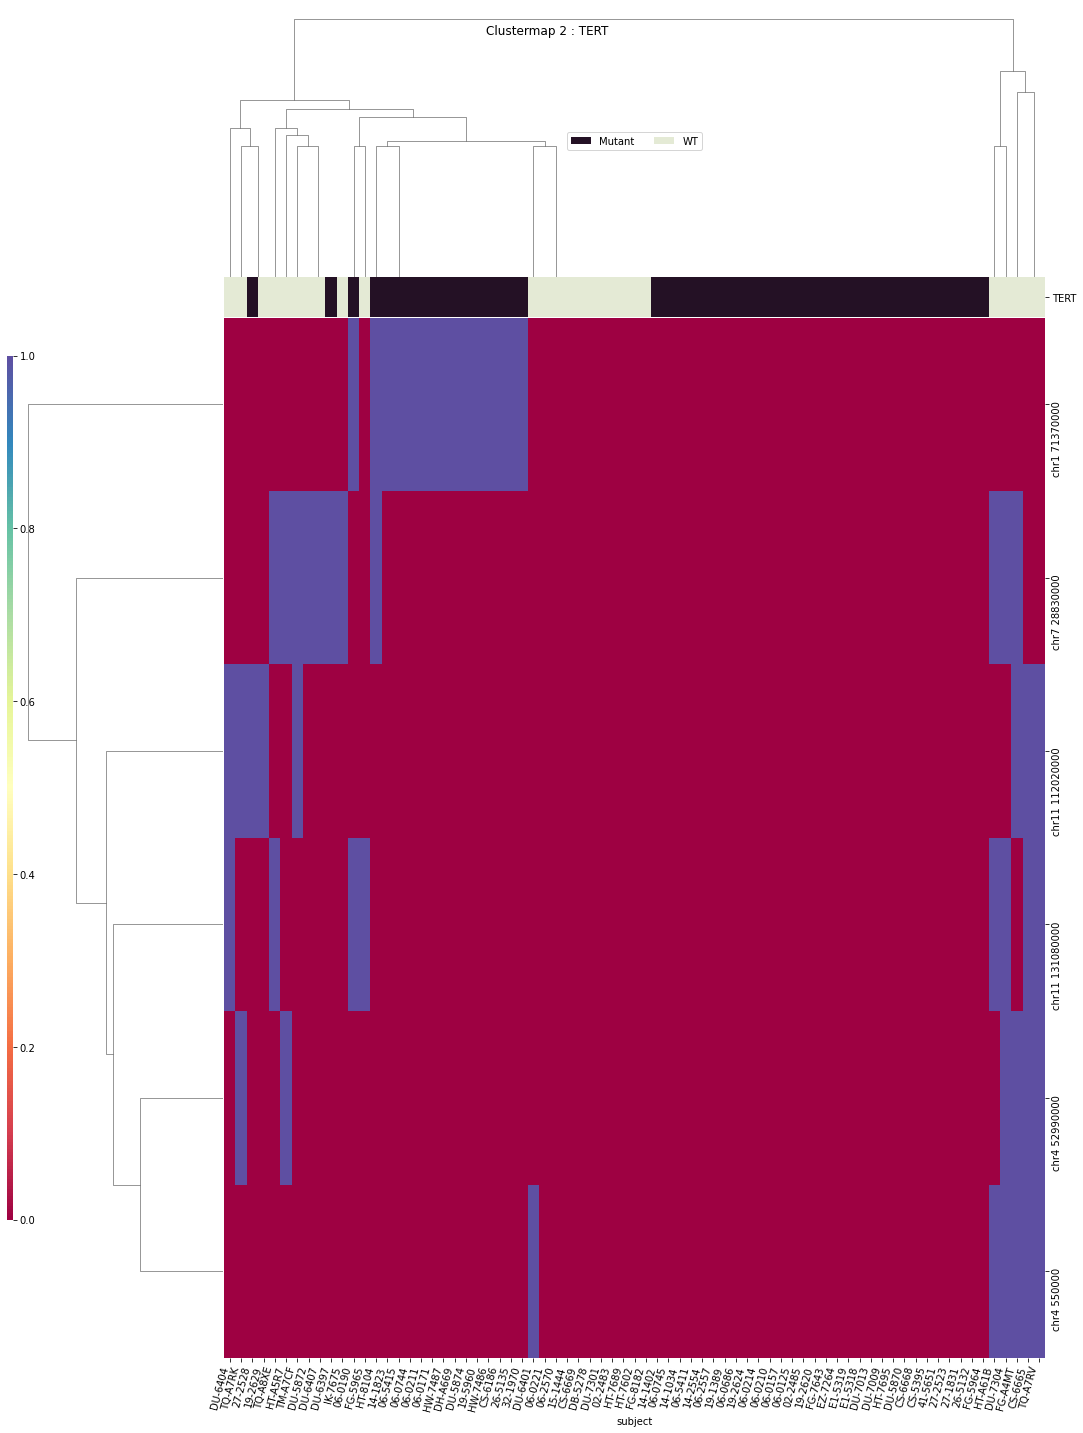

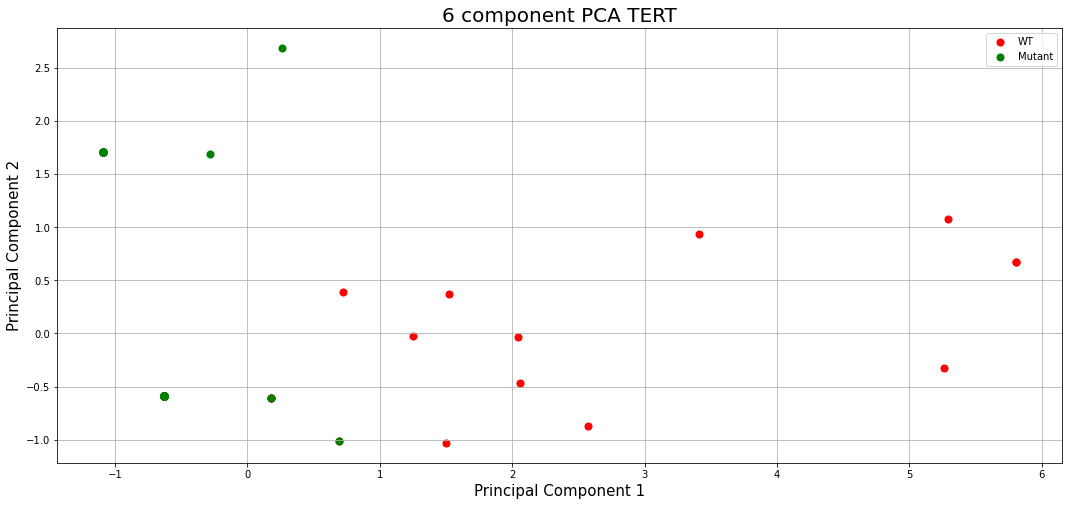

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 114790000' 'chr1 152140000' 'chr1 162460000' 'chr1 197400000'
 'chr1 21380000' 'chr1 227130000' 'chr1 23250000' 'chr1 247210000'
 'chr1 24800000' 'chr1 39990000' 'chr1 7950000' 'chr10 118260000'
 'chr10 24650000' 'chr10 75330000' 'chr11 17050000' 'chr11 28420000'
 'chr12 14350000' 'chr12 32560000' 'chr13 34530000' 'chr13 35960000'
 'chr13 51070000' 'chr14 102410000' 'chr14 58580000' 'chr14 89500000'
 'chr15 28070000' 'chr15 72800000' 'chr15 83820000' 'chr16 1600000'
 'chr16 2800000' 'chr16 31170000' 'chr18 21590000' 'chr2 218930000'
 'chr2 238070000' 'chr2 47430000' 'chr2 50820000' 'chr2 71160000'
 'chr20 19670000' 'chr20 38370000' 'chr3 101440000' 'chr3 103530000'
 'chr3 128810000' 'chr3 128950000' 'chr3 44820000' 'chr3 48730000'
 'chr4 157630000' 'chr4 158880000' 'chr5 112950000' 'chr5 75810000'
 'chr5 82140000' 'chr6 27820000' 'chr6 34390000' 'chr7 139520000'
 'chr7 28830000' 'chr8 128820000' 'chr8 21710000' 'chr8 30240000'
 '

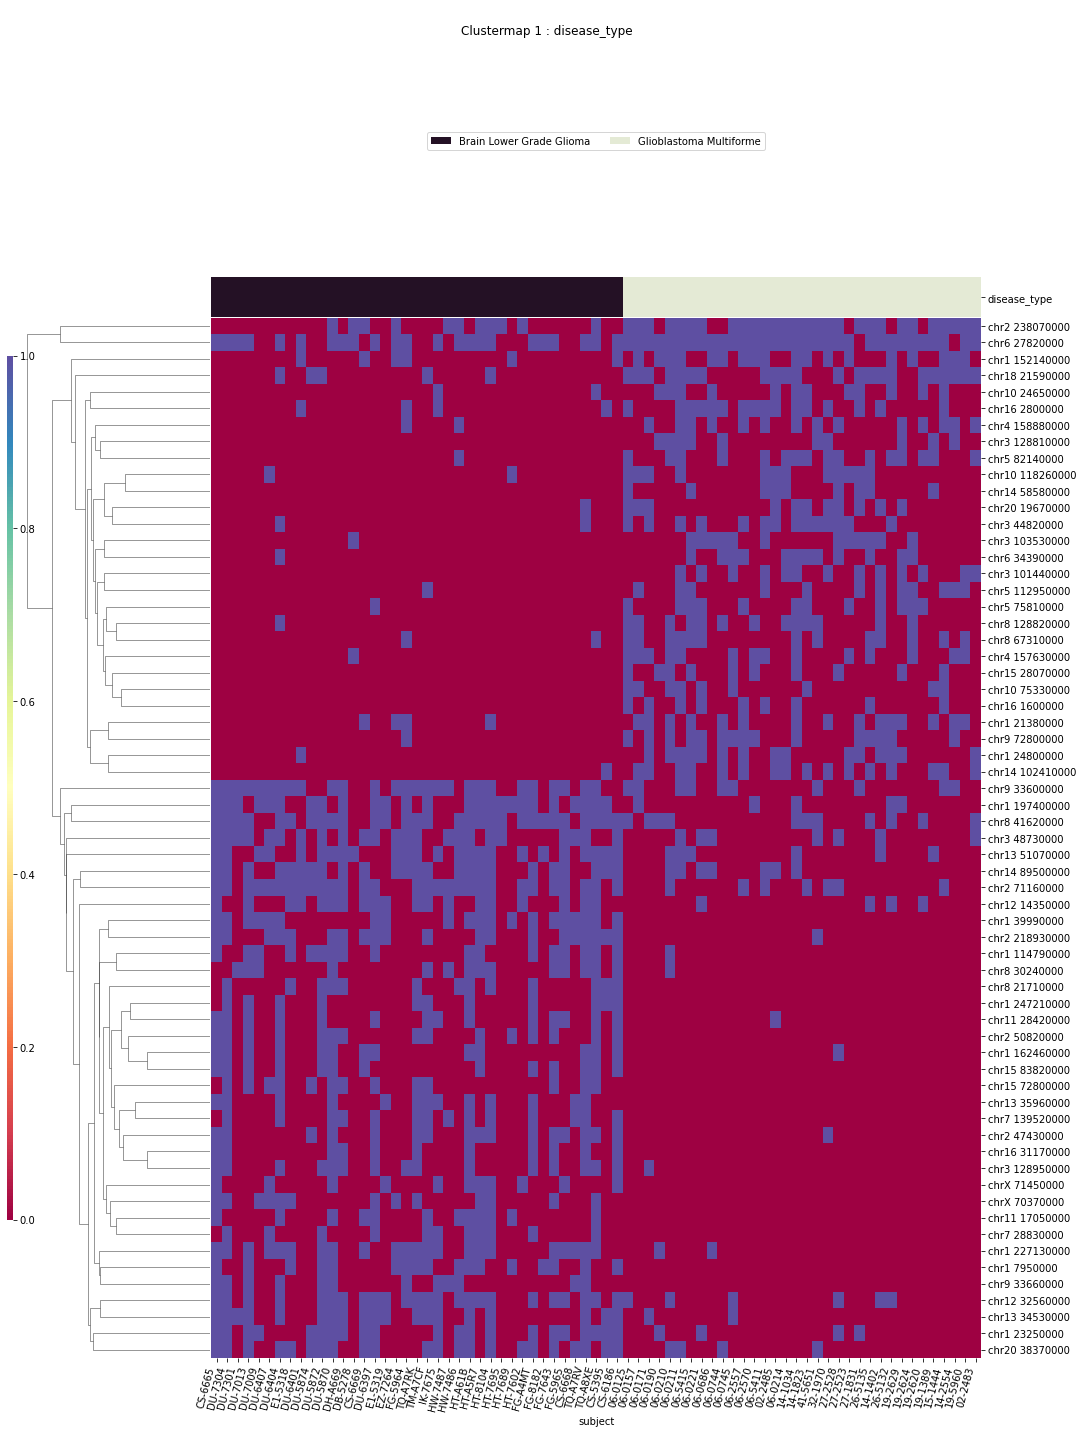

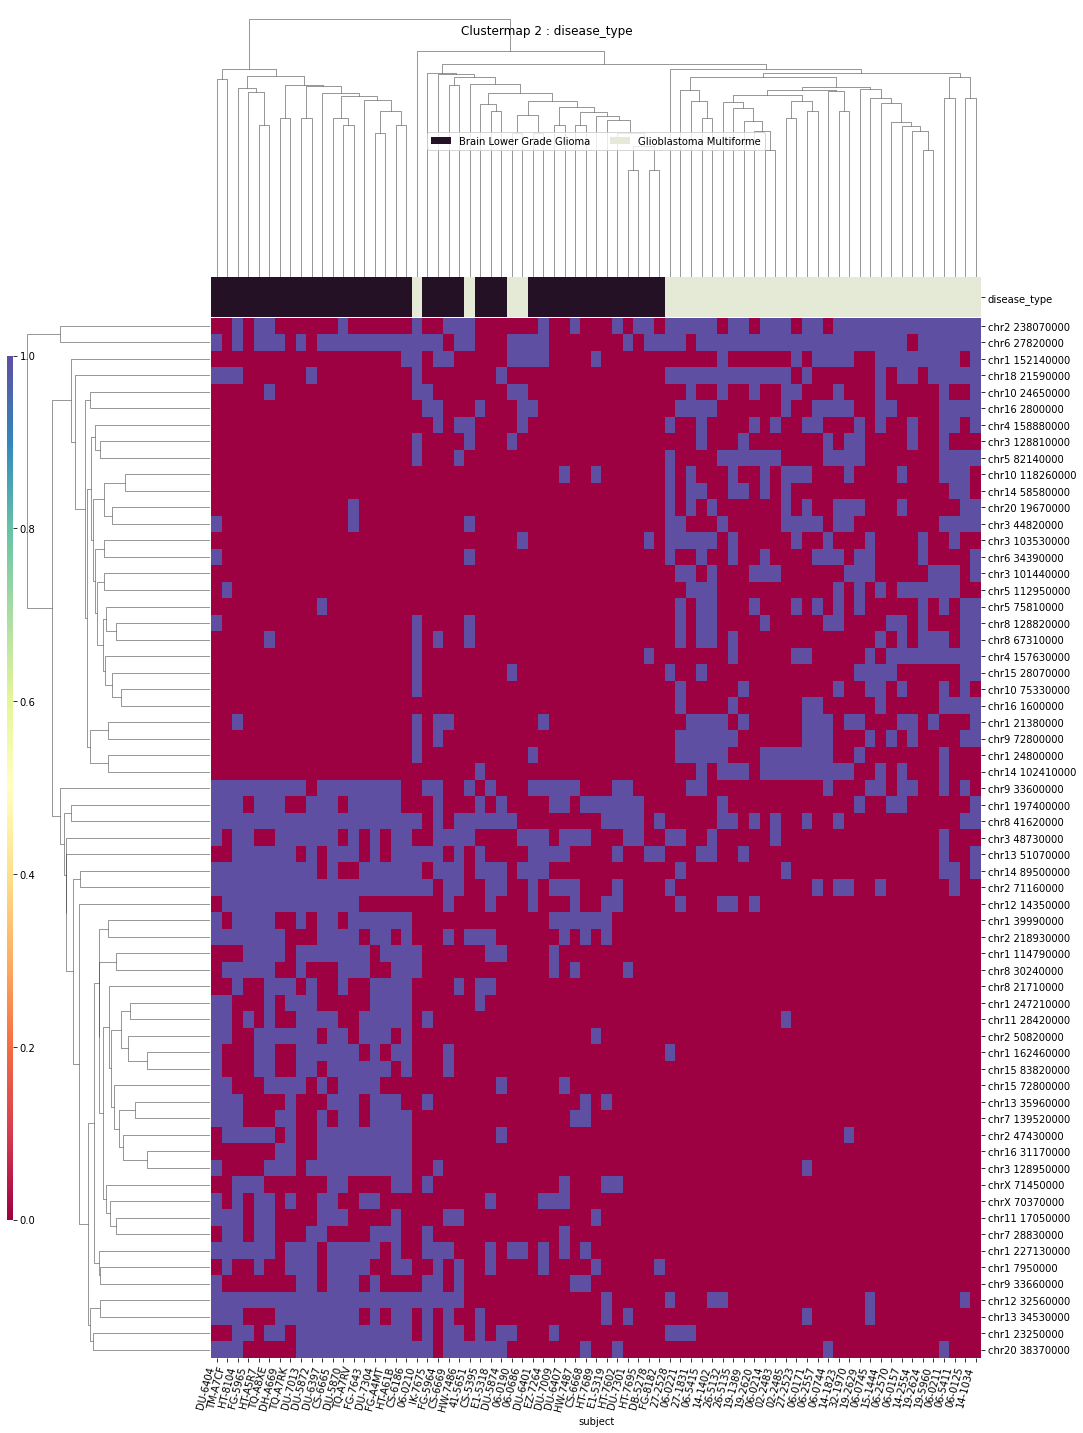

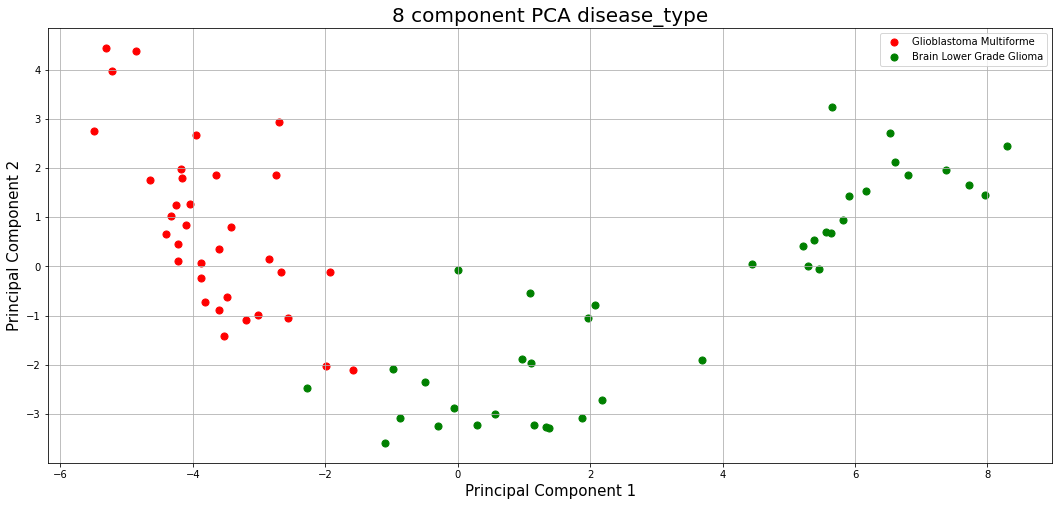

IDH_1p19q_status
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 197400000' 'chr1 21380000' 'chr11 73570000'
 'chr18 21590000' 'chr2 41990000' 'chr7 28830000' 'subject']


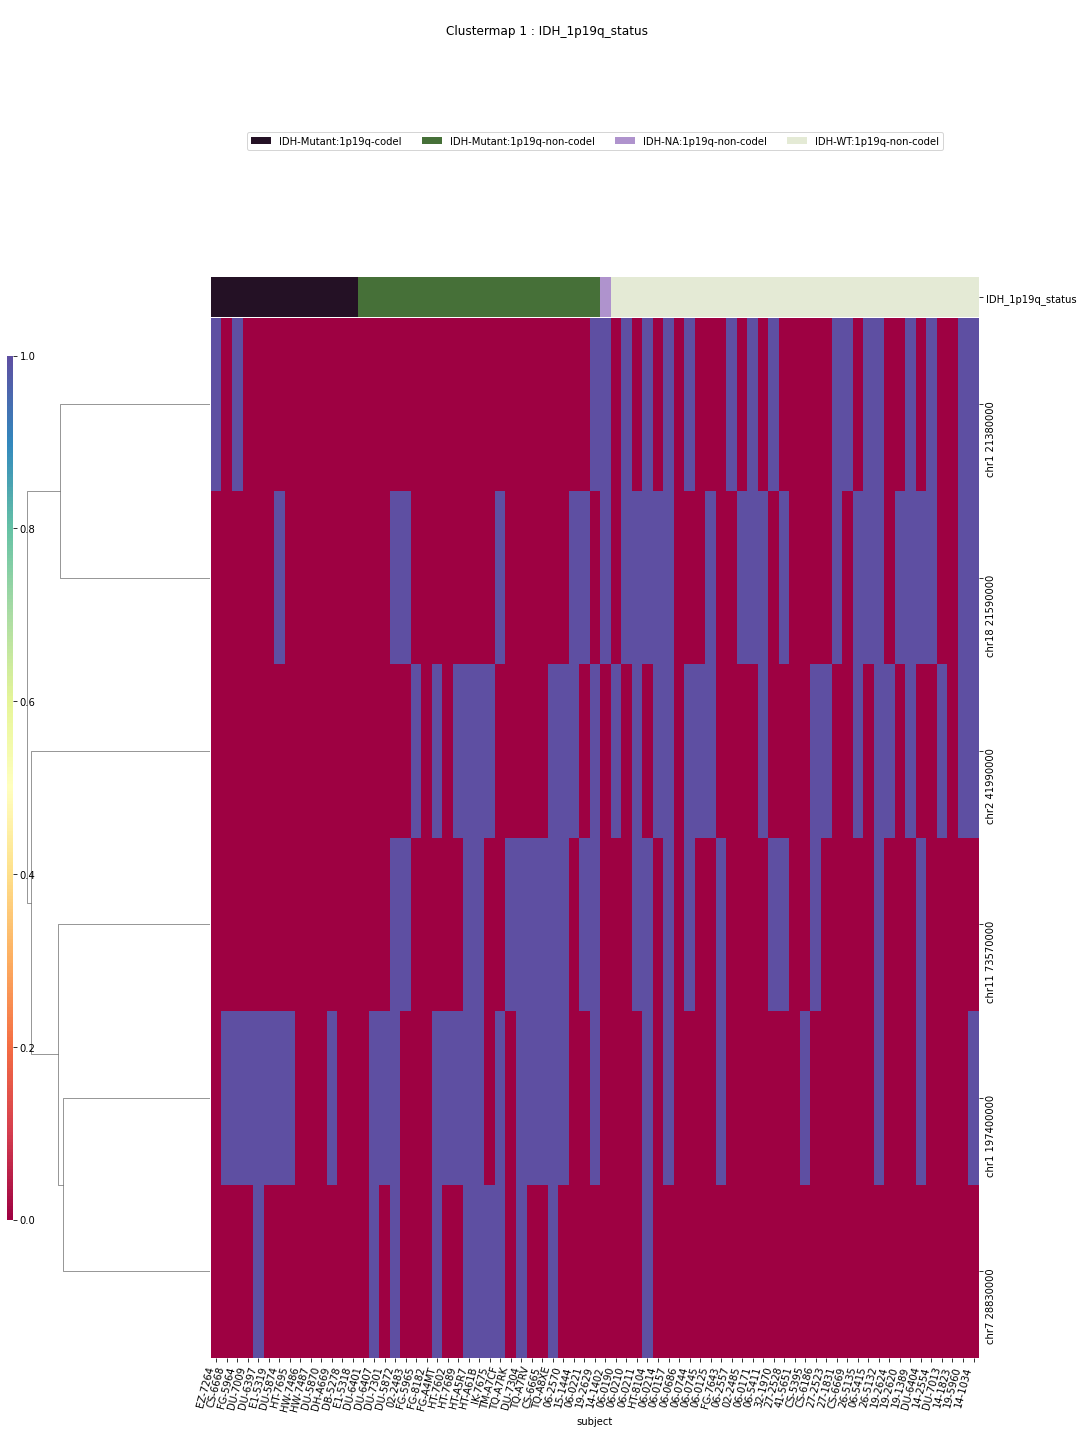

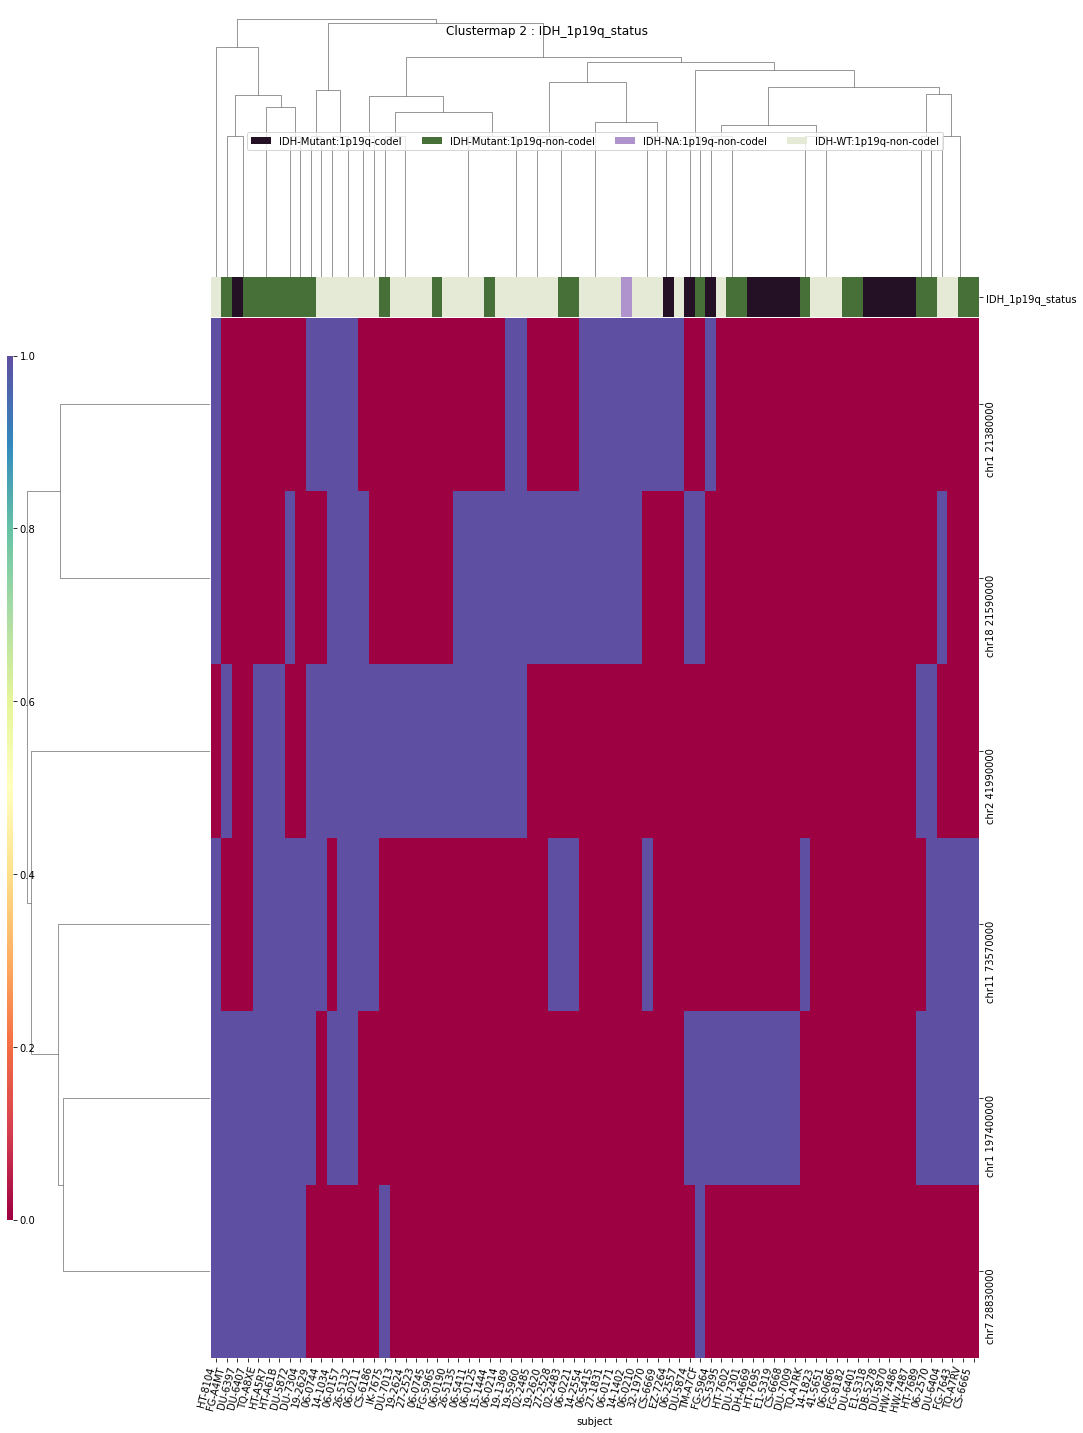

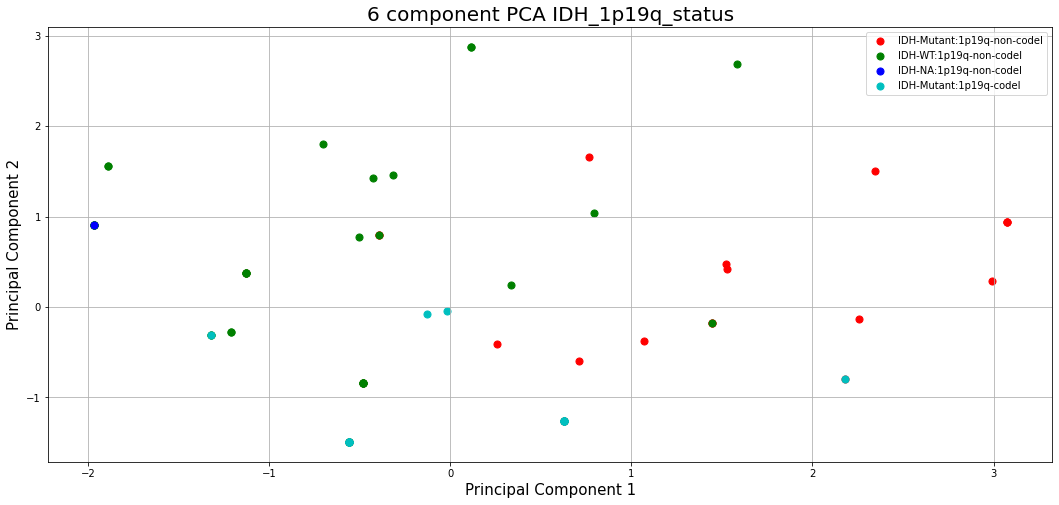

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 108490000' 'chr1 113060000' 'chr1 114790000'
 'chr1 12000000' 'chr1 12900000' 'chr1 13390000' 'chr1 143700000'
 'chr1 150850000' 'chr1 151770000' 'chr1 156320000' 'chr1 160930000'
 'chr1 161610000' 'chr1 162460000' 'chr1 168830000' 'chr1 179030000'
 'chr1 179040000' 'chr1 197400000' 'chr1 208650000' 'chr1 209120000'
 'chr1 21020000' 'chr1 213150000' 'chr1 227130000' 'chr1 231120000'
 'chr1 23250000' 'chr1 23500000' 'chr1 237660000' 'chr1 237670000'
 'chr1 23930000' 'chr1 247210000' 'chr1 24800000' 'chr1 248670000'
 'chr1 248820000' 'chr1 26590000' 'chr1 27290000' 'chr1 34960000'
 'chr1 37070000' 'chr1 39910000' 'chr1 39990000' 'chr1 48470000'
 'chr1 50380000' 'chr1 52180000' 'chr1 64200000' 'chr1 6710000'
 'chr1 7600000' 'chr1 77870000' 'chr1 7950000' 'chr1 86900000'
 'chr1 90890000' 'chr1 96760000' 'chr10 100090000' 'chr10 122200000'
 'chr10 12520000' 'chr10 133410000' 'chr10 29690000' 'chr10 31970000'
 'chr10 3497000

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


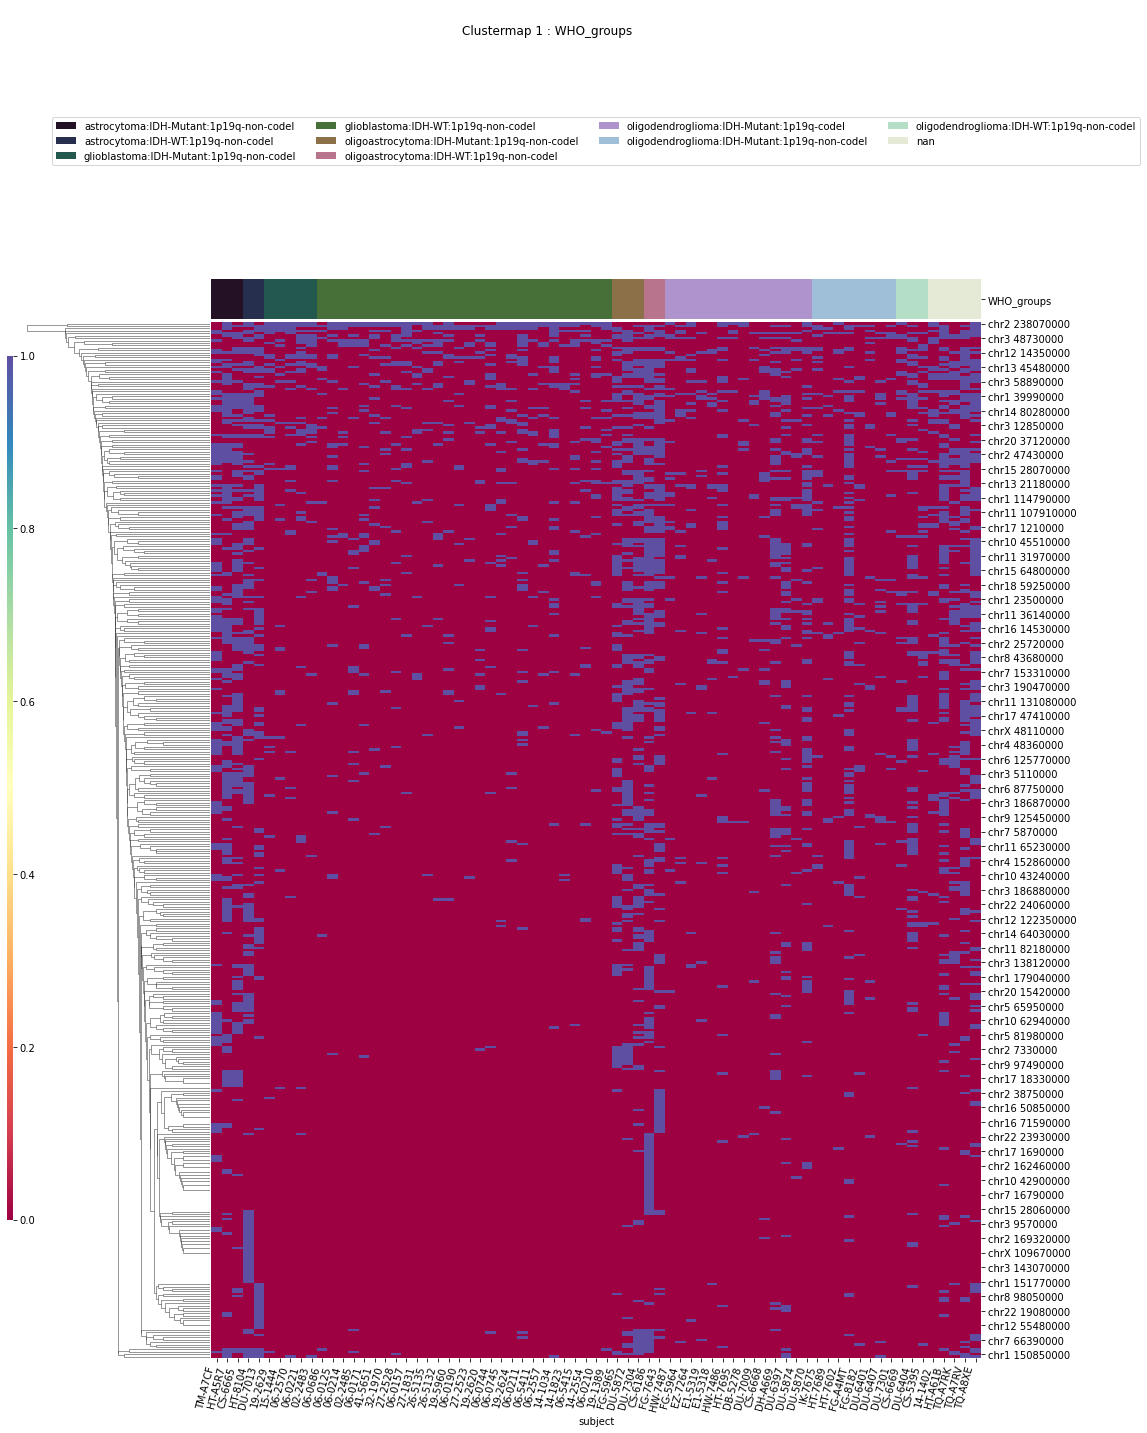

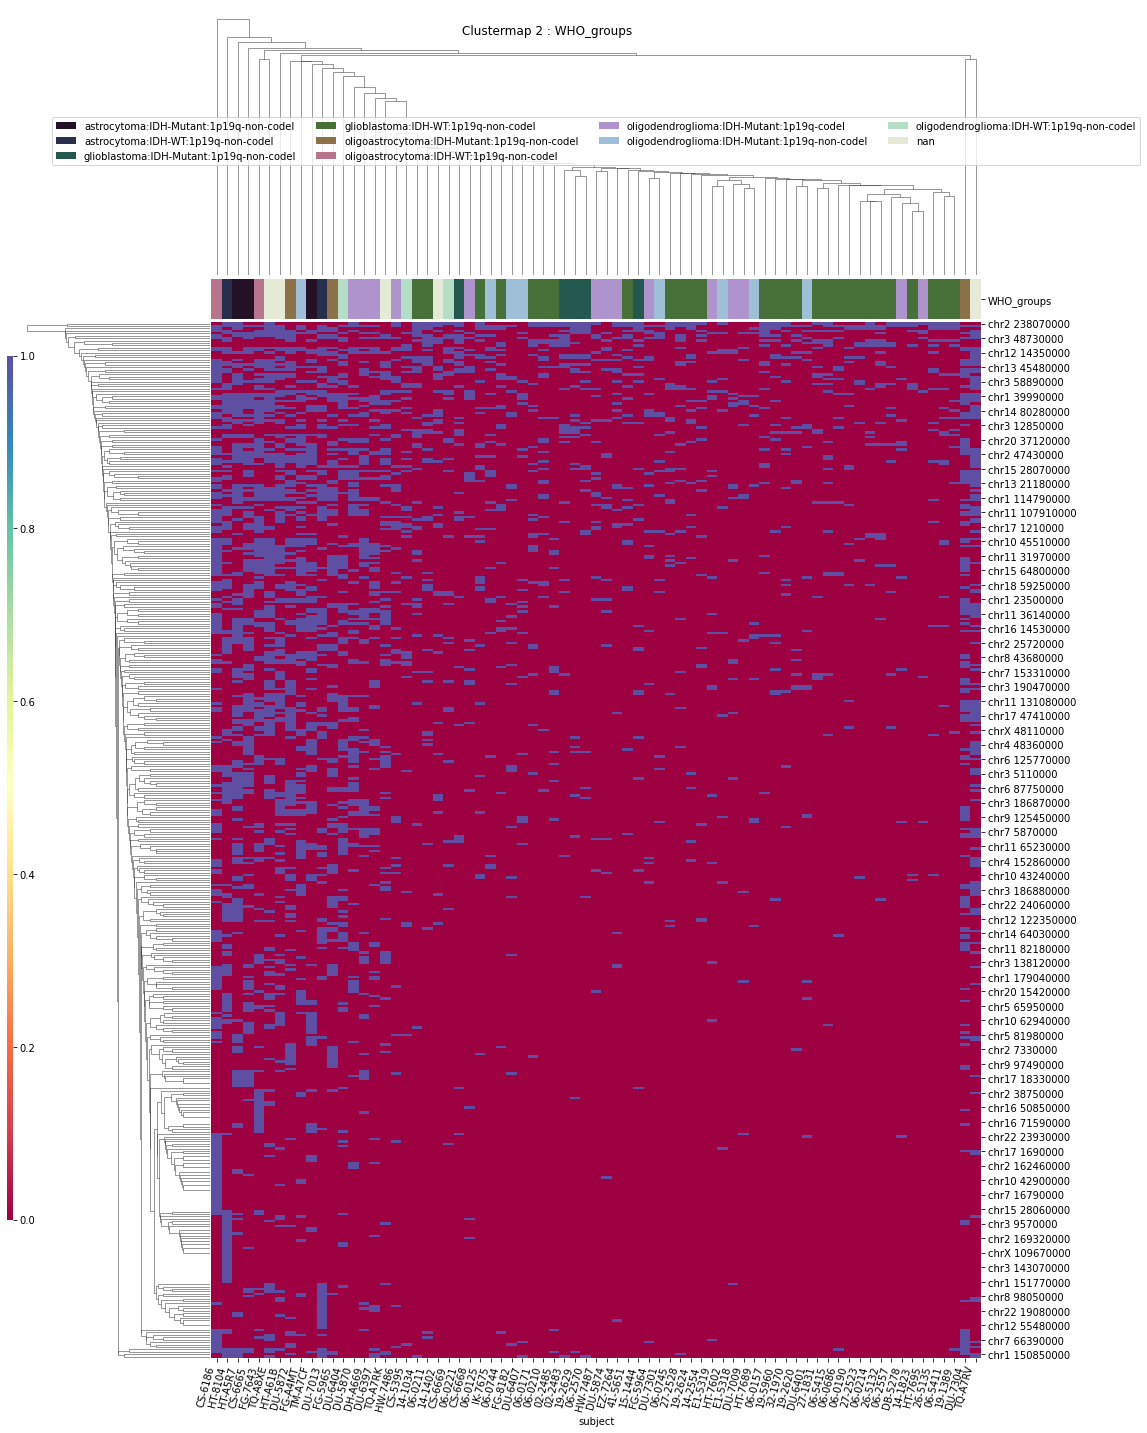

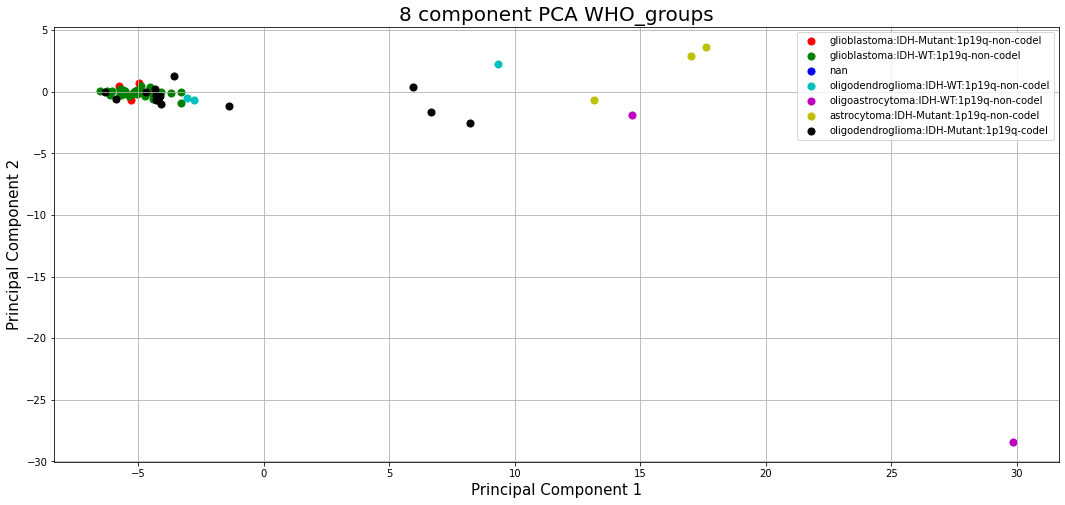

Triple_group
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['Triple_group' 'chr1 160930000' 'chr1 162460000' 'chr1 182510000'
 'chr1 197400000' 'chr1 43500000' 'chr1 90890000' 'chr10 6990000'
 'chr11 17050000' 'chr11 19860000' 'chr11 47090000' 'chr11 62270000'
 'chr11 65450000' 'chr11 73570000' 'chr12 7200000' 'chr12 74580000'
 'chr13 107780000' 'chr13 95680000' 'chr13 95840000' 'chr14 20080000'
 'chr14 20700000' 'chr14 22630000' 'chr14 90440000'
 'chr14_GL000009v2_random 200000' 'chr15 52280000' 'chr15 62330000'
 'chr15 70870000' 'chr15 83820000' 'chr17 2500000' 'chr17 44520000'
 'chr17 82370000' 'chr18 31950000' 'chr18 47820000' 'chr18 63440000'
 'chr19 12360000' 'chr19 58140000' 'chr2 207600000' 'chr2 218930000'
 'chr2 25720000' 'chr2 27350000' 'chr2 41990000' 'chr2 64040000'
 'chr20 31460000' 'chr20 33180000' 'chr20 36990000' 'chr20 4030000'
 'chr22 23850000' 'chr3 75280000' 'chr4 112950000' 'chr4 121230000'
 'chr4 138730000' 'chr5 43080000' 'chr5 69060000' 'chr6 27820000'
 'chr6 31060000' 'chr6 58250000' 'chr6 7

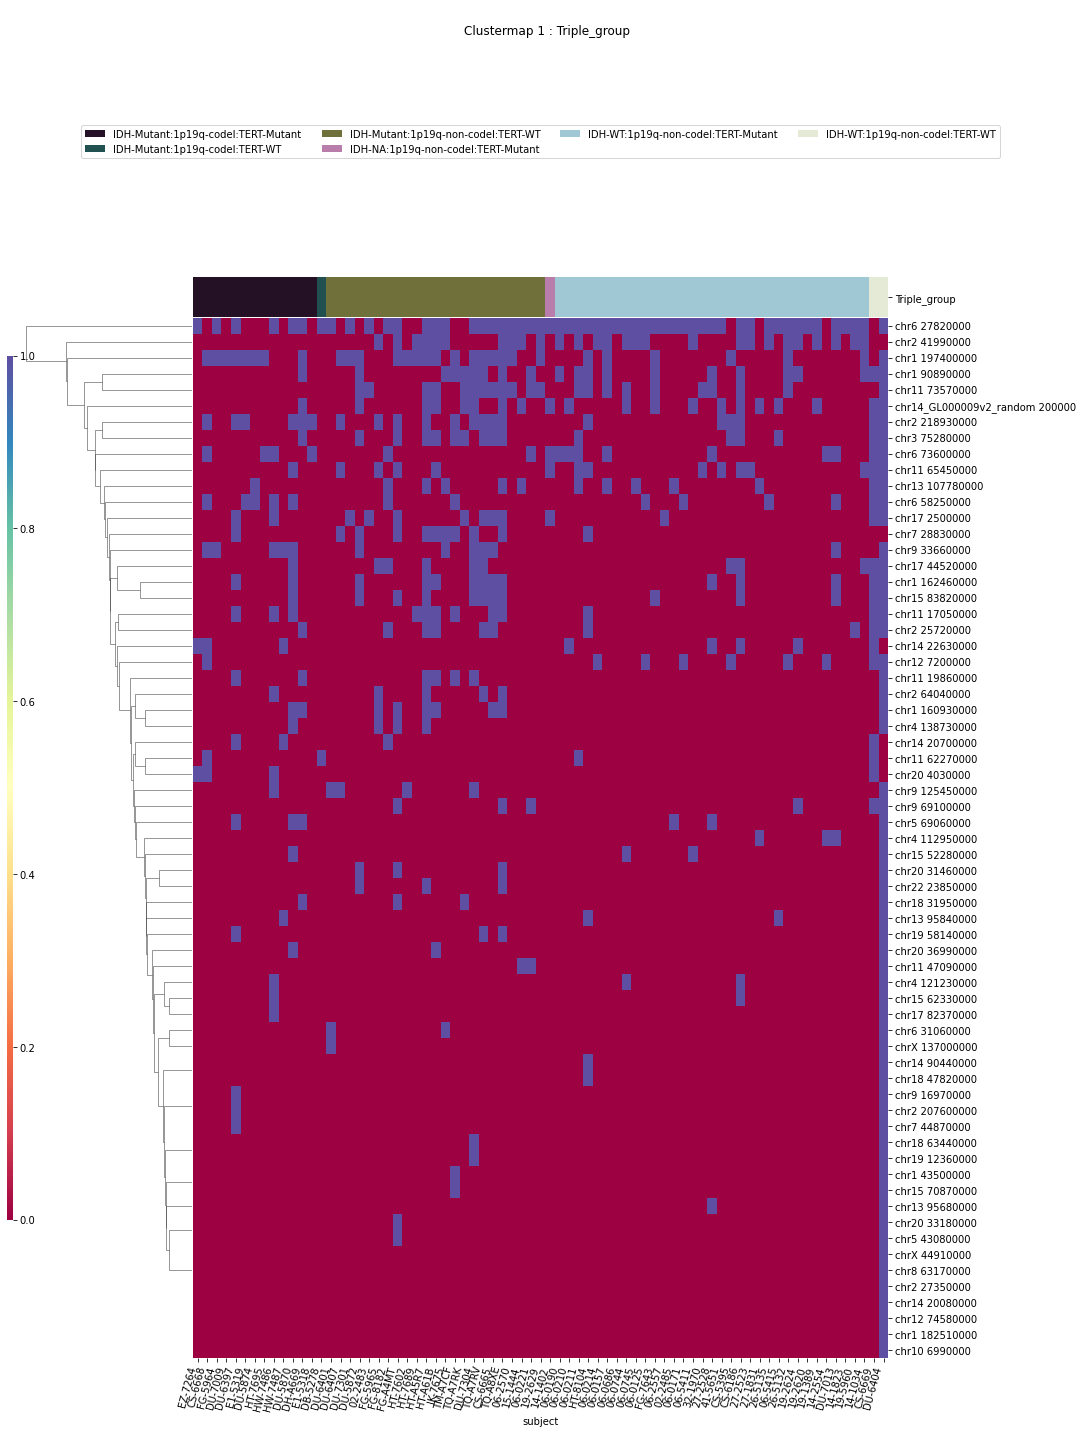

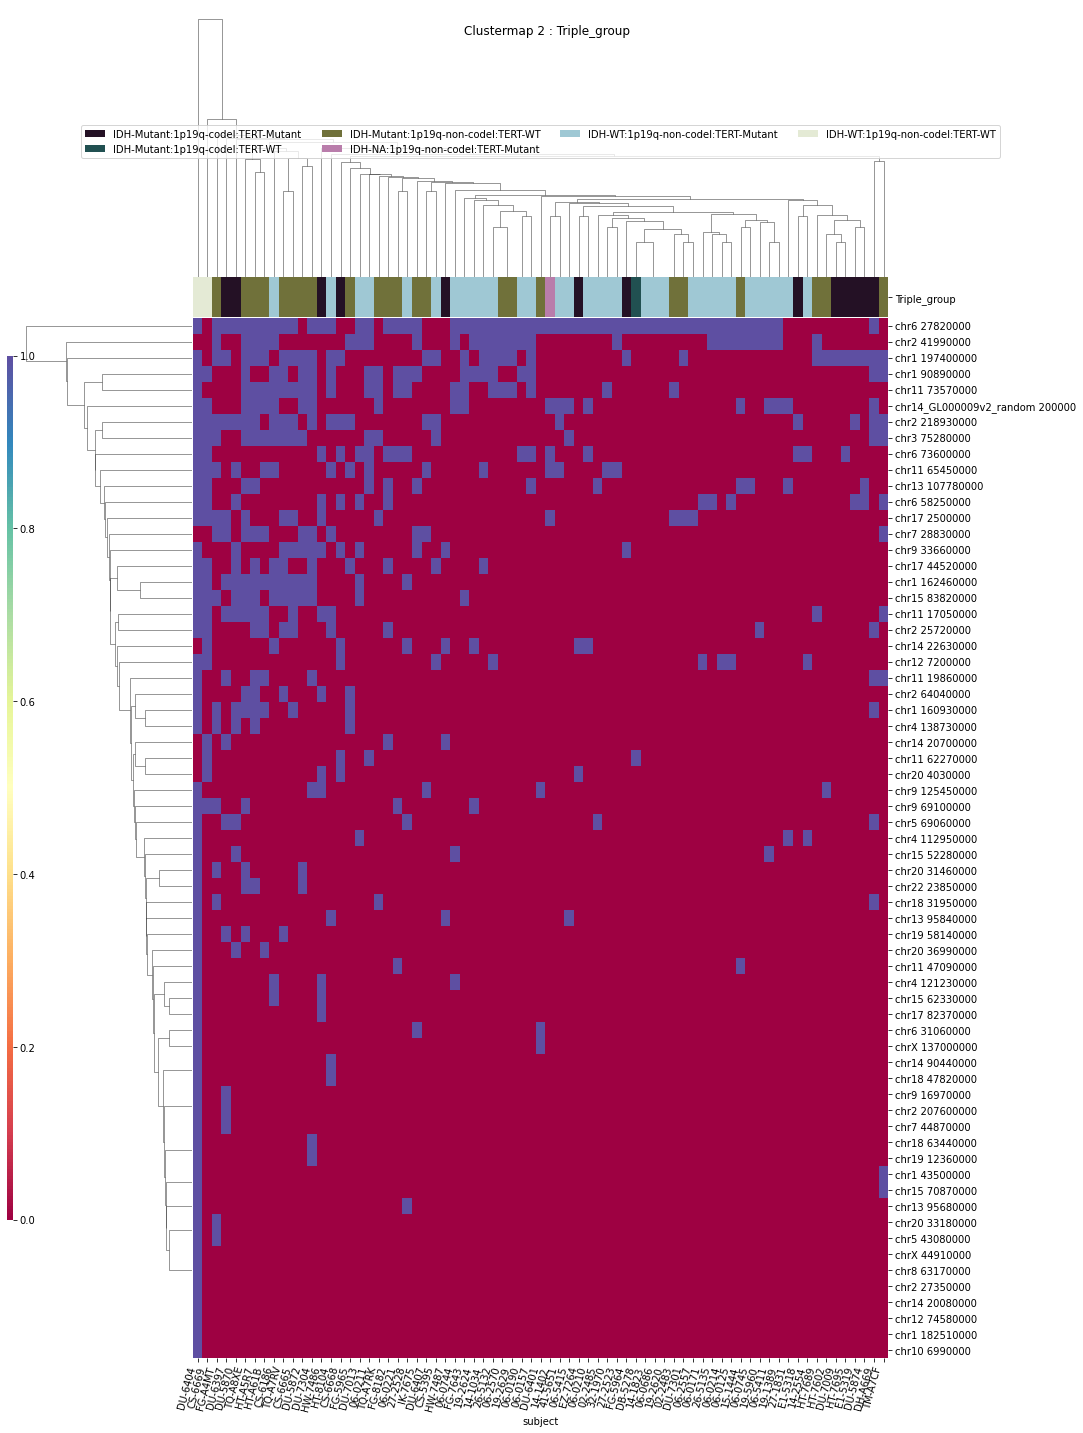

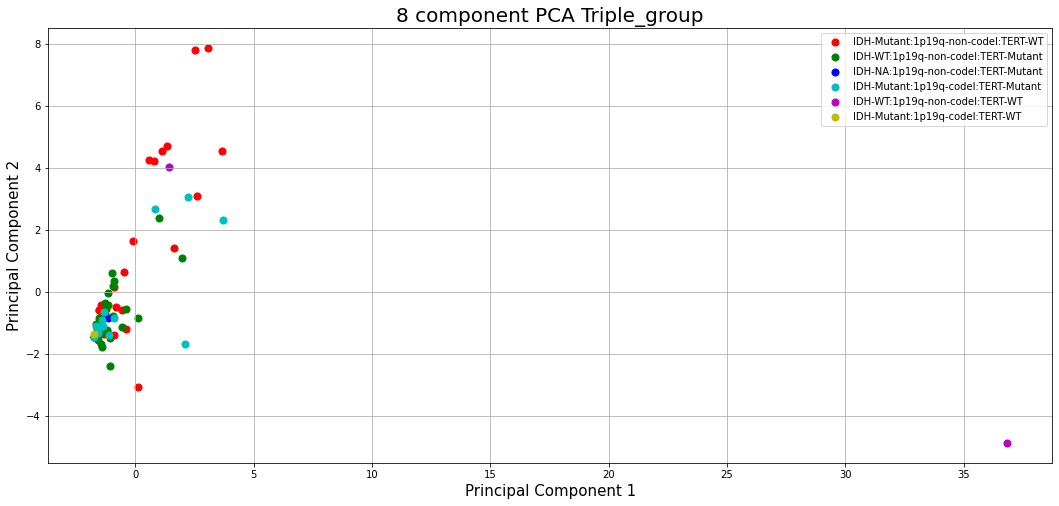

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr1 21380000' 'chr11 56140000' 'chr17 18290000' 'chr3 128810000'
 'chr4 112950000' 'subject']


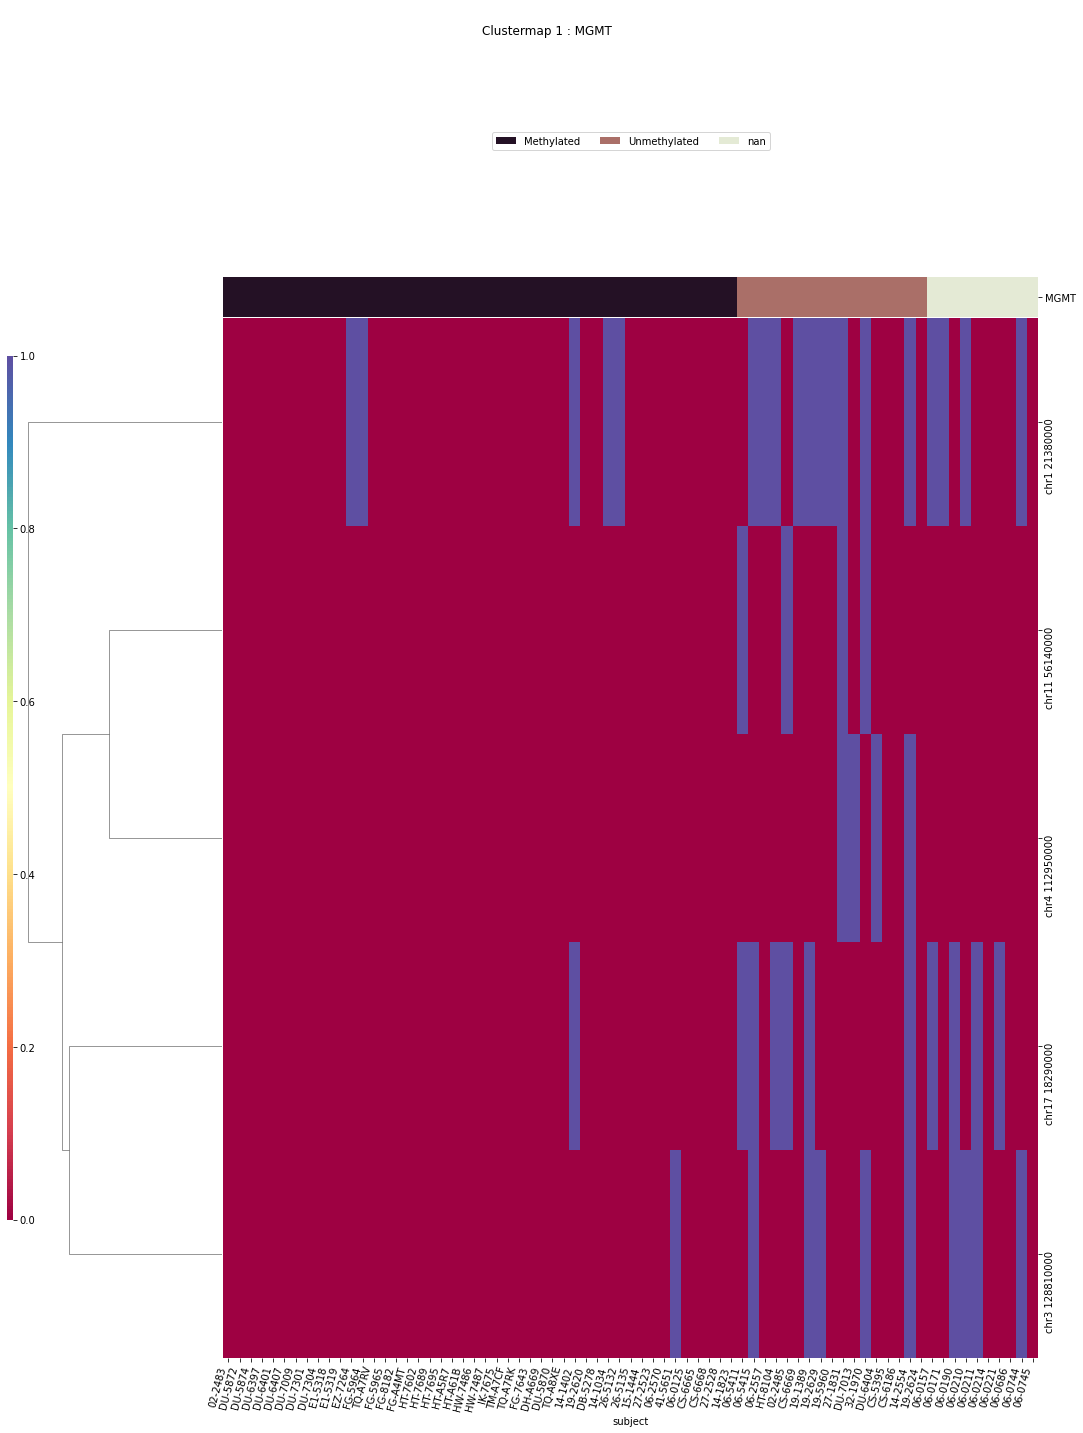

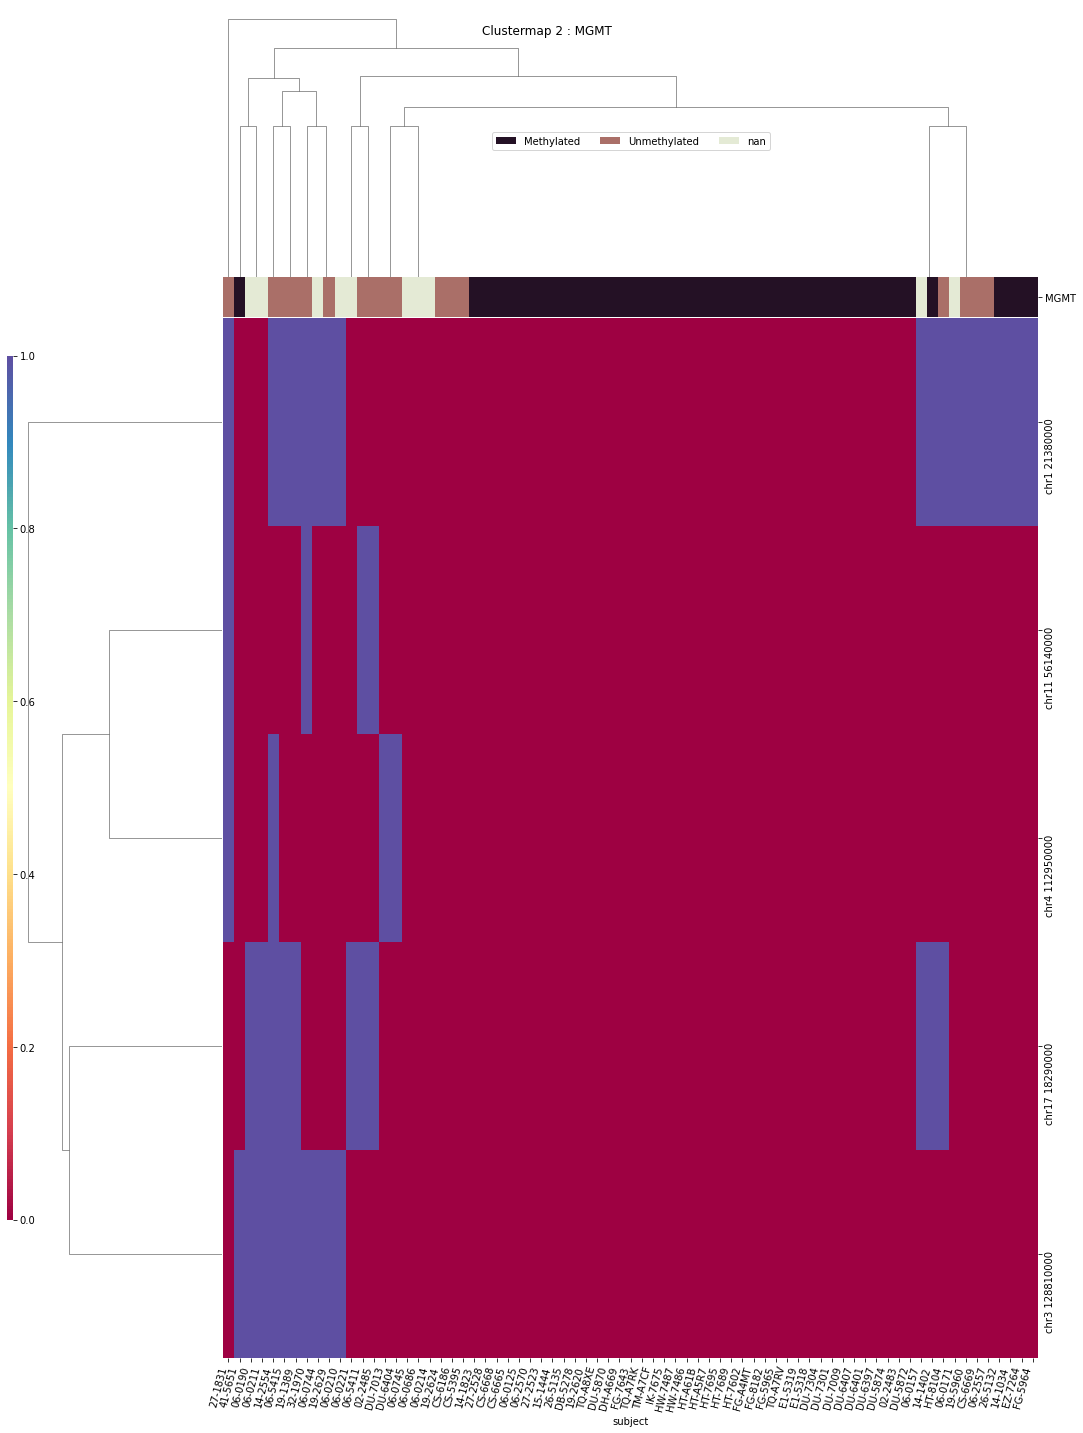

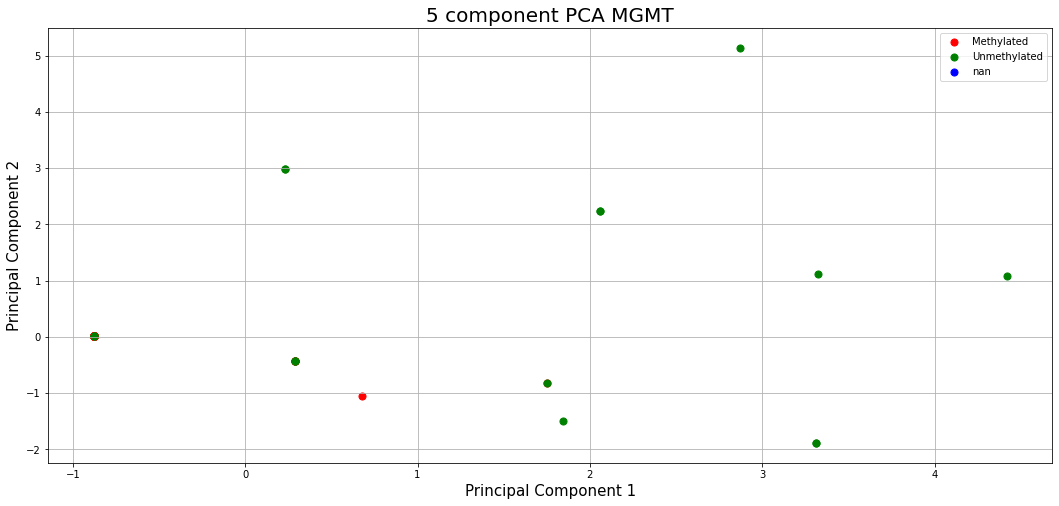

In [114]:
for column in ['primary_diagnosis','IDH','x1p19q','TERT','disease_type',
               'IDH_1p19q_status','WHO_groups','Triple_group','MGMT']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)

In [115]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210601 19:07:37'

---

In [116]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [117]:
pd.set_option('display.max_columns', default_max_columns)

In [118]:
pd.set_option('display.max_rows',default_max_rows)

In [119]:
pd.set_option('display.precision', default_precision)